In [1]:
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1ph9qcAk_hZsUnVWmDIBgs5NF-9iX4uP3/export?format=csv")

In [3]:
df.isnull().sum().sum() / df.size

0.37307312208169

In [4]:
df.isnull().sum()/100

Unnamed: 0             0.00
QKEY                   0.00
INTERVIEW_START_W99    0.00
INTERVIEW_END_W99      0.00
DEVICE_TYPE_W99        0.00
                       ... 
F_IDEO                 0.00
F_INTFREQ              1.73
F_VOLSUM               0.00
F_INC_TIER2            0.00
WEIGHT_W99             0.00
Length: 215, dtype: float64

In [5]:
EXCITEOE = ["EXCITEOE_W99_OE1","EXCITEOE_W99_OE2","EXCITEOE_W99_OE3","EXCITEOE_REFUSED_W99"]
CONCERNOE = ["CONCERNOE_W99_OE1", "CONCERNOE_W99_OE2","CONCERNOE_W99_OE3", "CONCERNOE_REFUSED_W99"]
DISCRIM = ["DISCRIM1_a_W99","DISCRIM1_b_W99", "DISCRIM1_c_W99","DISCRIM1_d_W99", "DISCRIM1_e_W99","DISCRIM1_f_W99"]
POSNEGAI = ["POSNEGAI_a_W99","POSNEGAI_b_W99","POSNEGAI_c_W99","POSNEGAI_d_W99","POSNEGAI_e_W99","POSNEGAI_f_W99"]
POSNEGHE = ["POSNEGHE_a_W99","POSNEGHE_b_W99","POSNEGHE_c_W99","POSNEGHE_d_W99","POSNEGHE_e_W99","POSNEGHE_f_W99"]
SMAL_W99 = ["SMALG1_W99","SMALG2_W99","SMALG3_W99","SMALG4_a_W99","SMALG4_b_W99","SMALG4_c_W99","SMALG4_d_W99","SMALG5_W99","SMALG6_W99","SMALG7_W99","SMALG8_W99","SMALG9_a_W99","SMALG9_b_W99","SMALG9_c_W99","SMALG10_a_W99","SMALG10_b_W99","SMALG10_c_W99","SMALG11_W99","SMALG12_W99","SMALG13_a_W99","SMALG13_b_W99","SMALG13_c_W99","SMALG13_d_W99"]
FACERE =["FACEREC1_W99","FACEREC2_W99","FACEREC3_a_W99","FACEREC3_b_W99","FACEREC3_c_W99","FACEREC3_d_W99","FACEREC3_e_W99","FACEREC3_f_W99","FACEREC4_W99","FACEREC5_W99","FACEREC6_a_W99","FACEREC6_b_W99","FACEREC6_c_W99","FACEREC6_d_W99","FACEREC7_W99","FACEREC8_a_W99","FACEREC8_b_W99","FACEREC8_c_W99","FACEREC9_W99","FACEREC10_W99","FACEREC11_a_W99","FACEREC11_b_W99","FACEREC11_c_W99","FACEREC12_a_W99","FACEREC12_b_W99","FACEREC12_c_W99","FACEREC12_d_W99"]
DCARS = ['DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99', 'DCARS4_a_W99', 'DCARS4_b_W99','DCARS4_c_W99', 'DCARS4_d_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99','DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99','DCARS10_W99', 'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99','DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99']
BCHIP = ["BCHIP1_W99","BCHIP2_W99","BCHIP3_W99","BCHIP4_a_W99","BCHIP4_b_W99","BCHIP4_c_W99","BCHIP4_d_W99","BCHIP5_W99","BCHIP6_W99","BCHIP7_W99","BCHIP8_W99","BCHIP9_a_W99","BCHIP9_b_W99","BCHIP9_c_W99","BCHIP10_a_W99","BCHIP10_b_W99","BCHIP10_c_W99","BCHIP10_d_W99","BCHIP11_W99","BCHIP12_W99","BCHIP13_a_W99","BCHIP13_b_W99","BCHIP14_a_W99","BCHIP14_b_W99","BCHIP14_c_W99","BCHIP14_d_W99"]
GENEV = ["GENEV1_W99","GENEV2_W99","GENEV3_W99","GENEV4_a_W99","GENEV4_b_W99","GENEV4_c_W99","GENEV4_d_W99","GENEV5_W99","GENEV6_W99","GENEV7_W99","GENEV8_W99","GENEV9_a_W99","GENEV9_b_W99","GENEV9_c_W99","GENEV9_d_W99","GENEV10_W99","GENEV11_W99","GENEV12_a_W99","GENEV12_b_W99","GENEV12_c_W99","GENEV13_a_W99","GENEV13_b_W99"]
EXO =["EXOV1_W99","EXOV2_W99","EXOV3_W99","EXOV4_a_W99","EXOV4_b_W99","EXOV4_c_W99","EXOV4_d_W99","EXOV5_W99","EXOV6_W99","EXOV6_W99","EXOV7_W99","EXOV8_a_W99","EXOV8_b_W99","EXOV8_c_W99","EXOV8_d_W99","EXOV9_W99","EXOV10_W99","EXOV11_a_W99","EXOV11_b_W99","EXOV12_a_W99","EXOV12_b_W99","EXOV12_c_W99"]
INTERVIEW_TIME = ["INTERVIEW_START_W99","INTERVIEW_END_W99"]


In [6]:
# Combine all column lists
columns_to_drop = POSNEGAI + POSNEGHE + SMAL_W99 + FACERE + BCHIP + GENEV + EXO+ INTERVIEW_TIME
# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10260 non-null  int64  
 1   QKEY                   10260 non-null  int64  
 2   DEVICE_TYPE_W99        10260 non-null  object 
 3   LANG_W99               10260 non-null  object 
 4   FORM_W99               10260 non-null  object 
 5   XTABLET_W99            10260 non-null  object 
 6   TECH1_W99              5153 non-null   object 
 7   SC1_W99                5107 non-null   object 
 8   CNCEXC_W99             10260 non-null  object 
 9   EXCITEOE_W99_OE1       1853 non-null   object 
 10  EXCITEOE_W99_OE2       337 non-null    object 
 11  EXCITEOE_W99_OE3       59 non-null     object 
 12  EXCITEOE_REFUSED_W99   10260 non-null  object 
 13  CONCERNOE_W99_OE1      3773 non-null   object 
 14  CONCERNOE_W99_OE2      687 non-null    object 
 15  CO

In [8]:
df.head()

Unnamed: 0    QKEY DEVICE_TYPE_W99 LANG_W99 FORM_W99    XTABLET_W99  \
0           0  100260       Laptop/PC  English   Form 2  Non-tablet HH   
1           1  100314      Smartphone  English   Form 1  Non-tablet HH   
2           2  100363      Smartphone  English   Form 1  Non-tablet HH   
3           3  100598       Laptop/PC  English   Form 2  Non-tablet HH   
4           4  100637       Laptop/PC  English   Form 2  Non-tablet HH   

         TECH1_W99                              SC1_W99  \
0              NaN                      Mostly positive   
1  Mostly positive                                  NaN   
2  Mostly positive                                  NaN   
3              NaN                      Mostly positive   
4              NaN  Equal positive and negative effects   

                      CNCEXC_W99      EXCITEOE_W99_OE1  ...  \
0  Equally concerned and excited                   NaN  ...   
1    More excited than concerned  Don't know/No answer  ...   
2  Equally concerned and excited                   NaN  ...   
3  Equally concerned and excited                   NaN  ...   
4  Equally concerned and excited                   NaN  ...   

        F_PARTYLN_FINAL F_PARTYSUM_FINAL            F_PARTYSUMIDEO_FINAL  \
0                   NaN     Rep/Lean Rep           Conservative Rep/Lean   
1                   NaN     Rep/Lean Rep       Moderate/Liberal Rep/Lean   
2                   NaN     Dem/Lean Dem  Moderate/Conservative Dem/Lean   
3                   NaN     Rep/Lean Rep           Conservative Rep/Lean   
4  The Republican Party     Rep/Lean Rep           Conservative Rep/Lean   

                     F_INC_SDT1  \
0  $50,000 to less than $60,000   
1  $40,000 to less than $50,000   
2              $100,000 or more   
3              $100,000 or more   
4  $30,000 to less than $40,000   

                                               F_REG             F_IDEO  \
0  You are ABSOLUTELY CERTAIN that you are regist...  Very conservative   
1  You are ABSOLUTELY CERTAIN that you are regist...            Liberal   
2  You are ABSOLUTELY CERTAIN that you are regist...           Moderate   
3  You are ABSOLUTELY CERTAIN that you are regist...       Conservative   
4  You are ABSOLUTELY CERTAIN that you are regist...  Very conservative   

             F_INTFREQ F_VOLSUM    F_INC_TIER2 WEIGHT_W99  
0  Several times a day       No  Middle income   0.206396  
1  Several times a day      Yes  Middle income   0.315090  
2  Several times a day       No   Upper income   0.829579  
3  Several times a day      Yes   Upper income   0.337527  
4           Less often       No   Lower income   1.210606  

[5 rows x 82 columns]

In [9]:
df = df.drop(columns=["Unnamed: 0","DEVICE_TYPE_W99","FORM_W99","XTABLET_W99","F_PARTYLN_FINAL","F_PARTYSUM_FINAL","F_PARTYSUMIDEO_FINAL","F_BORN","F_ATTEND","F_RELIMP","F_PRAY","F_INC_SDT1","F_IDEO","F_INTFREQ","F_VOLSUM","F_RACECMB","F_HISP","F_HISP_ORIGIN","F_EDUCCAT","F_YEARSINUS","LANG_W99","F_BIRTHPLACE","F_RELCOM3CAT","F_CREGION"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   QKEY                   10260 non-null  int64  
 1   TECH1_W99              5153 non-null   object 
 2   SC1_W99                5107 non-null   object 
 3   CNCEXC_W99             10260 non-null  object 
 4   EXCITEOE_W99_OE1       1853 non-null   object 
 5   EXCITEOE_W99_OE2       337 non-null    object 
 6   EXCITEOE_W99_OE3       59 non-null     object 
 7   EXCITEOE_REFUSED_W99   10260 non-null  object 
 8   CONCERNOE_W99_OE1      3773 non-null   object 
 9   CONCERNOE_W99_OE2      687 non-null    object 
 10  CONCERNOE_W99_OE3      98 non-null     object 
 11  CONCERNOE_REFUSED_W99  10260 non-null  object 
 12  ALGFAIR_W99            10260 non-null  object 
 13  DISCRIM1_a_W99         10260 non-null  object 
 14  DISCRIM1_b_W99         10260 non-null  object 
 15  DI

In [11]:
#Check to see if there are any missing values
df.isnull().sum()/100

QKEY                       0.00
TECH1_W99                 51.07
SC1_W99                   51.53
CNCEXC_W99                 0.00
EXCITEOE_W99_OE1          84.07
EXCITEOE_W99_OE2          99.23
EXCITEOE_W99_OE3         102.01
EXCITEOE_REFUSED_W99       0.00
CONCERNOE_W99_OE1         64.87
CONCERNOE_W99_OE2         95.73
CONCERNOE_W99_OE3        101.62
CONCERNOE_REFUSED_W99      0.00
ALGFAIR_W99                0.00
DISCRIM1_a_W99             0.00
DISCRIM1_b_W99             0.00
DISCRIM1_c_W99             0.00
DISCRIM1_d_W99             0.00
DISCRIM1_e_W99             0.00
DISCRIM1_f_W99             0.00
DCARS1_W99                51.07
DCARS2_W99                51.07
DCARS3_W99                51.07
DCARS4_a_W99              51.07
DCARS4_b_W99              51.07
DCARS4_c_W99              51.07
DCARS4_d_W99              51.07
DCARS5_W99                51.07
DCARS6_W99                51.07
DCARS7_W99                51.07
DCARS8_a_W99              51.07
DCARS8_b_W99              51.07
DCARS8_c

In [12]:
threshold = len(df) * 0.05
threshold

513.0

In [13]:
cols_to_drop = df.columns[df.isna().sum() <= threshold]
cols_to_drop

Index(['QKEY', 'CNCEXC_W99', 'EXCITEOE_REFUSED_W99', 'CONCERNOE_REFUSED_W99',
       'ALGFAIR_W99', 'DISCRIM1_a_W99', 'DISCRIM1_b_W99', 'DISCRIM1_c_W99',
       'DISCRIM1_d_W99', 'DISCRIM1_e_W99', 'DISCRIM1_f_W99', 'F_METRO',
       'F_CDIVISION', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT2', 'F_RACETHNMOD',
       'F_CITIZEN', 'F_MARITAL', 'F_RELIG', 'F_RELIGCAT1', 'F_PARTY_FINAL',
       'F_REG', 'F_INC_TIER2', 'WEIGHT_W99'],
      dtype='object')

In [14]:
df.dropna(subset=cols_to_drop, inplace=True)

In [15]:
cols_with_missing_values = df.columns[df.isna().sum() > 0]
cols_with_missing_values

Index(['TECH1_W99', 'SC1_W99', 'EXCITEOE_W99_OE1', 'EXCITEOE_W99_OE2',
       'EXCITEOE_W99_OE3', 'CONCERNOE_W99_OE1', 'CONCERNOE_W99_OE2',
       'CONCERNOE_W99_OE3', 'DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99',
       'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99',
       'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS8_a_W99',
       'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99',
       'DCARS10_W99', 'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99',
       'DCARS11_d_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99',
       'DCARS13_c_W99', 'DCARS13_d_W99'],
      dtype='object')

In [16]:
df.isna().sum()/100

QKEY                      0.00
TECH1_W99                48.93
SC1_W99                  49.71
CNCEXC_W99                0.00
EXCITEOE_W99_OE1         81.51
EXCITEOE_W99_OE2         95.39
EXCITEOE_W99_OE3         98.08
EXCITEOE_REFUSED_W99      0.00
CONCERNOE_W99_OE1        61.92
CONCERNOE_W99_OE2        91.91
CONCERNOE_W99_OE3        97.68
CONCERNOE_REFUSED_W99     0.00
ALGFAIR_W99               0.00
DISCRIM1_a_W99            0.00
DISCRIM1_b_W99            0.00
DISCRIM1_c_W99            0.00
DISCRIM1_d_W99            0.00
DISCRIM1_e_W99            0.00
DISCRIM1_f_W99            0.00
DCARS1_W99               48.93
DCARS2_W99               48.93
DCARS3_W99               48.93
DCARS4_a_W99             48.93
DCARS4_b_W99             48.93
DCARS4_c_W99             48.93
DCARS4_d_W99             48.93
DCARS5_W99               48.93
DCARS6_W99               48.93
DCARS7_W99               48.93
DCARS8_a_W99             48.93
DCARS8_b_W99             48.93
DCARS8_c_W99             48.93
DCARS8_d

In [17]:
imputer = SimpleImputer (strategy='most_frequent')
imputer.fit_transform(df)

array([[100260, 'Mostly positive', 'Mostly positive', ...,
        'You are ABSOLUTELY CERTAIN that you are registered to vote at your current address',
        'Middle income', 0.2063963769],
       [100314, 'Mostly positive', 'Mostly positive', ...,
        'You are ABSOLUTELY CERTAIN that you are registered to vote at your current address',
        'Middle income', 0.3150902898],
       [100363, 'Mostly positive', 'Mostly positive', ...,
        'You are ABSOLUTELY CERTAIN that you are registered to vote at your current address',
        'Upper income', 0.8295790779],
       ...,
       [202101013344, 'Mostly positive', 'Mostly positive', ...,
        'You are ABSOLUTELY CERTAIN that you are registered to vote at your current address',
        'Lower income', 0.2820789305],
       [202101013446, 'Mostly positive', 'Mostly positive', ...,
        'You are ABSOLUTELY CERTAIN that you are registered to vote at your current address',
        'Middle income', 0.4415245381],
       [20210

In [18]:
columns_to_impute = [
    'TECH1_W99','SC1_W99','DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99', 'DCARS4_a_W99', 'DCARS4_b_W99',
    'DCARS4_c_W99', 'DCARS4_d_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99',
    'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99',
    'DCARS10_W99', 'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99',
    'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99'
]

# Initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Save the cleaned dataset
df.to_csv('https://docs.google.com/spreadsheets/d/1ph9qcAk_hZsUnVWmDIBgs5NF-9iX4uP3/export?format=csv', index=False)

# Optional: Display the first few rows of the updated dataframe
df.head()

QKEY        TECH1_W99                              SC1_W99  \
0  100260  Mostly positive                      Mostly positive   
1  100314  Mostly positive                      Mostly positive   
2  100363  Mostly positive                      Mostly positive   
3  100598  Mostly positive                      Mostly positive   
4  100637  Mostly positive  Equal positive and negative effects   

                      CNCEXC_W99      EXCITEOE_W99_OE1 EXCITEOE_W99_OE2  \
0  Equally concerned and excited                   NaN              NaN   
1    More excited than concerned  Don't know/No answer              NaN   
2  Equally concerned and excited                   NaN              NaN   
3  Equally concerned and excited                   NaN              NaN   
4  Equally concerned and excited                   NaN              NaN   

  EXCITEOE_W99_OE3 EXCITEOE_REFUSED_W99 CONCERNOE_W99_OE1 CONCERNOE_W99_OE2  \
0              NaN            Not asked               NaN               NaN   
1              NaN       Did not refuse               NaN               NaN   
2              NaN            Not asked               NaN               NaN   
3              NaN            Not asked               NaN               NaN   
4              NaN            Not asked               NaN               NaN   

   ...                       F_EDUCCAT2        F_RACETHNMOD F_CITIZEN  \
0  ...  College graduate/some post grad  White non-Hispanic       Yes   
1  ...          Some college, no degree  White non-Hispanic       Yes   
2  ...                     Postgraduate  White non-Hispanic       Yes   
3  ...                     Postgraduate  White non-Hispanic       Yes   
4  ...               Associate's degree  White non-Hispanic       Yes   

            F_MARITAL                F_RELIG   F_RELIGCAT1 F_PARTY_FINAL  \
0  Never been married  Nothing in particular  Unaffiliated    Republican   
1            Divorced             Protestant    Protestant    Republican   
2             Married         Roman Catholic      Catholic      Democrat   
3             Married             Protestant    Protestant    Republican   
4             Married             Protestant    Protestant   Independent   

                                               F_REG    F_INC_TIER2 WEIGHT_W99  
0  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   0.206396  
1  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   0.315090  
2  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   0.829579  
3  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   0.337527  
4  You are ABSOLUTELY CERTAIN that you are regist...   Lower income   1.210606  

[5 rows x 58 columns]

In [19]:
df.isna().sum()/100

QKEY                      0.00
TECH1_W99                 0.00
SC1_W99                   0.00
CNCEXC_W99                0.00
EXCITEOE_W99_OE1         81.51
EXCITEOE_W99_OE2         95.39
EXCITEOE_W99_OE3         98.08
EXCITEOE_REFUSED_W99      0.00
CONCERNOE_W99_OE1        61.92
CONCERNOE_W99_OE2        91.91
CONCERNOE_W99_OE3        97.68
CONCERNOE_REFUSED_W99     0.00
ALGFAIR_W99               0.00
DISCRIM1_a_W99            0.00
DISCRIM1_b_W99            0.00
DISCRIM1_c_W99            0.00
DISCRIM1_d_W99            0.00
DISCRIM1_e_W99            0.00
DISCRIM1_f_W99            0.00
DCARS1_W99                0.00
DCARS2_W99                0.00
DCARS3_W99                0.00
DCARS4_a_W99              0.00
DCARS4_b_W99              0.00
DCARS4_c_W99              0.00
DCARS4_d_W99              0.00
DCARS5_W99                0.00
DCARS6_W99                0.00
DCARS7_W99                0.00
DCARS8_a_W99              0.00
DCARS8_b_W99              0.00
DCARS8_c_W99              0.00
DCARS8_d

In [20]:
df.isnull().sum().sum() / df.size

0.0920256872780155

In [21]:
df.isna().sum()/100

QKEY                      0.00
TECH1_W99                 0.00
SC1_W99                   0.00
CNCEXC_W99                0.00
EXCITEOE_W99_OE1         81.51
EXCITEOE_W99_OE2         95.39
EXCITEOE_W99_OE3         98.08
EXCITEOE_REFUSED_W99      0.00
CONCERNOE_W99_OE1        61.92
CONCERNOE_W99_OE2        91.91
CONCERNOE_W99_OE3        97.68
CONCERNOE_REFUSED_W99     0.00
ALGFAIR_W99               0.00
DISCRIM1_a_W99            0.00
DISCRIM1_b_W99            0.00
DISCRIM1_c_W99            0.00
DISCRIM1_d_W99            0.00
DISCRIM1_e_W99            0.00
DISCRIM1_f_W99            0.00
DCARS1_W99                0.00
DCARS2_W99                0.00
DCARS3_W99                0.00
DCARS4_a_W99              0.00
DCARS4_b_W99              0.00
DCARS4_c_W99              0.00
DCARS4_d_W99              0.00
DCARS5_W99                0.00
DCARS6_W99                0.00
DCARS7_W99                0.00
DCARS8_a_W99              0.00
DCARS8_b_W99              0.00
DCARS8_c_W99              0.00
DCARS8_d

In [22]:
#SHOW unique values in F_GENDER_W99
print(df['F_GENDER'].unique())

['A man' 'A woman' 'In some other way' 'Refused']


In [23]:
# Define the value to be replaced and the new value
other_value = ['In some other way']

# Replace the values in the 'F_GENDER' column
df['F_GENDER'] = df['F_GENDER'].replace(other_value, 'Other')

<Axes: >

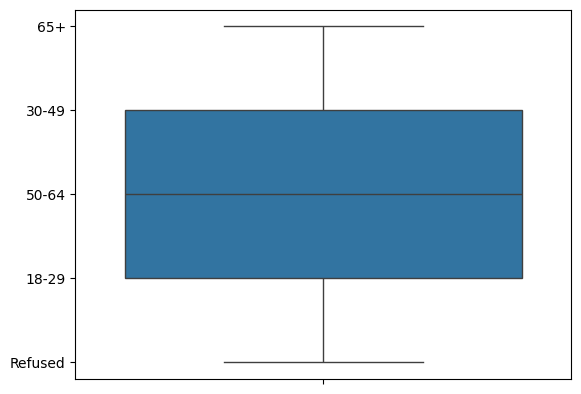

In [24]:
sns.boxplot(df['F_AGECAT'].unique())

In [25]:
# List of categorical variables
categorical_vars = ['TECH1_W99','SC1_W99',	'CNCEXC_W99',	'ALGFAIR_W99',	'DISCRIM1_a_W99',	'DISCRIM1_b_W99',	'DISCRIM1_c_W99',	'DISCRIM1_d_W99',	'DISCRIM1_e_W99',	'DISCRIM1_f_W99',	'F_AGECAT',	'F_GENDER',	'F_EDUCCAT2',	'F_RACETHNMOD',	'F_CITIZEN',	'DCARS1_W99',	'DCARS2_W99',	'DCARS3_W99',	'DCARS4_a_W99',	'DCARS4_b_W99',	'DCARS4_c_W99',	'DCARS4_d_W99',	'DCARS5_W99',	'DCARS6_W99',	'DCARS7_W99',	'DCARS8_a_W99',	'DCARS8_b_W99',	'DCARS8_c_W99',	'DCARS8_d_W99',	'DCARS9_W99',	'DCARS10_W99',	'DCARS11_a_W99',	'DCARS11_b_W99',	'DCARS11_c_W99',	'DCARS11_d_W99',	'DCARS12_W99',	'DCARS13_a_W99',	'DCARS13_b_W99',	'DCARS13_c_W99',	'DCARS13_d_W99',	'F_METRO','F_CDIVISION', 'F_MARITAL',	'F_RELIGCAT1',	'F_PARTY_FINAL',	'F_INC_TIER2']

#display the data types of the categorical variables
print(df[categorical_vars].dtypes)

TECH1_W99         object
SC1_W99           object
CNCEXC_W99        object
ALGFAIR_W99       object
DISCRIM1_a_W99    object
DISCRIM1_b_W99    object
DISCRIM1_c_W99    object
DISCRIM1_d_W99    object
DISCRIM1_e_W99    object
DISCRIM1_f_W99    object
F_AGECAT          object
F_GENDER          object
F_EDUCCAT2        object
F_RACETHNMOD      object
F_CITIZEN         object
DCARS1_W99        object
DCARS2_W99        object
DCARS3_W99        object
DCARS4_a_W99      object
DCARS4_b_W99      object
DCARS4_c_W99      object
DCARS4_d_W99      object
DCARS5_W99        object
DCARS6_W99        object
DCARS7_W99        object
DCARS8_a_W99      object
DCARS8_b_W99      object
DCARS8_c_W99      object
DCARS8_d_W99      object
DCARS9_W99        object
DCARS10_W99       object
DCARS11_a_W99     object
DCARS11_b_W99     object
DCARS11_c_W99     object
DCARS11_d_W99     object
DCARS12_W99       object
DCARS13_a_W99     object
DCARS13_b_W99     object
DCARS13_c_W99     object
DCARS13_d_W99     object


In [26]:
# Define the categorization function with corrections
def categorize_CARS(response):
    response = str(response).strip().lower()
    high_responses = ['a lot', 'definitely want', 'definitely would happen', 'very well', 'very comfortable', 'very positive', 'extremely comfortable', 'more acceptable', 'a major role']
    medium_responses = ['somewhat well', 'probably want', 'probably would happen', 'somewhat comfortable', 'probably not want', 'mostly positive', 'less acceptable', 'a minor role', 'a little', 'not too comfortable']
    low_responses = ['no difference', 'nothing at all', 'definitely not want', 'definitely would not happen', 'not too well', 'probably would not happen', 'not at all well', 'not comfortable at all', 'mostly negative', 'very negative', 'no difference', 'no role at all']
    uncertain_responses = ['not sure', 'don\'t know', 'no answer']

    if response in high_responses:
        return 'High'
    elif response in medium_responses:
        return 'Medium'
    elif response in low_responses:
        return 'Low'
    elif response in uncertain_responses:
        return 'Uncertain'
    else:
        return 'Unknown'

# List of columns to categorize
dcars_columns = ['DCARS1_W99', 'DCARS12_W99', 'DCARS11_a_W99',	'DCARS11_b_W99','DCARS11_c_W99',	'DCARS11_d_W99', 'DCARS8_a_W99',	'DCARS8_b_W99',	'DCARS8_c_W99',	'DCARS8_d_W99', 'DCARS4_a_W99',	'DCARS4_b_W99',	'DCARS4_c_W99',	'DCARS4_d_W99', 'DCARS3_W99']

# Check if the columns exist in the DataFrame before applying the function
existing_columns = [col for col in dcars_columns if col in df.columns]

# Apply the categorization function only to existing columns
df[existing_columns] = df[existing_columns].applymap(categorize_CARS)

# Display the first few rows to verify
print(df.head())

     QKEY        TECH1_W99                              SC1_W99  \
0  100260  Mostly positive                      Mostly positive   
1  100314  Mostly positive                      Mostly positive   
2  100363  Mostly positive                      Mostly positive   
3  100598  Mostly positive                      Mostly positive   
4  100637  Mostly positive  Equal positive and negative effects   

                      CNCEXC_W99      EXCITEOE_W99_OE1 EXCITEOE_W99_OE2  \
0  Equally concerned and excited                   NaN              NaN   
1    More excited than concerned  Don't know/No answer              NaN   
2  Equally concerned and excited                   NaN              NaN   
3  Equally concerned and excited                   NaN              NaN   
4  Equally concerned and excited                   NaN              NaN   

  EXCITEOE_W99_OE3 EXCITEOE_REFUSED_W99 CONCERNOE_W99_OE1 CONCERNOE_W99_OE2  \
0              NaN            Not asked               NaN          

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_2592/2170540859.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[existing_columns] = df[existing_columns].applymap(categorize_CARS)


In [27]:
df.head()

QKEY        TECH1_W99                              SC1_W99  \
0  100260  Mostly positive                      Mostly positive   
1  100314  Mostly positive                      Mostly positive   
2  100363  Mostly positive                      Mostly positive   
3  100598  Mostly positive                      Mostly positive   
4  100637  Mostly positive  Equal positive and negative effects   

                      CNCEXC_W99      EXCITEOE_W99_OE1 EXCITEOE_W99_OE2  \
0  Equally concerned and excited                   NaN              NaN   
1    More excited than concerned  Don't know/No answer              NaN   
2  Equally concerned and excited                   NaN              NaN   
3  Equally concerned and excited                   NaN              NaN   
4  Equally concerned and excited                   NaN              NaN   

  EXCITEOE_W99_OE3 EXCITEOE_REFUSED_W99 CONCERNOE_W99_OE1 CONCERNOE_W99_OE2  \
0              NaN            Not asked               NaN               NaN   
1              NaN       Did not refuse               NaN               NaN   
2              NaN            Not asked               NaN               NaN   
3              NaN            Not asked               NaN               NaN   
4              NaN            Not asked               NaN               NaN   

   ...                       F_EDUCCAT2        F_RACETHNMOD F_CITIZEN  \
0  ...  College graduate/some post grad  White non-Hispanic       Yes   
1  ...          Some college, no degree  White non-Hispanic       Yes   
2  ...                     Postgraduate  White non-Hispanic       Yes   
3  ...                     Postgraduate  White non-Hispanic       Yes   
4  ...               Associate's degree  White non-Hispanic       Yes   

            F_MARITAL                F_RELIG   F_RELIGCAT1 F_PARTY_FINAL  \
0  Never been married  Nothing in particular  Unaffiliated    Republican   
1            Divorced             Protestant    Protestant    Republican   
2             Married         Roman Catholic      Catholic      Democrat   
3             Married             Protestant    Protestant    Republican   
4             Married             Protestant    Protestant   Independent   

                                               F_REG    F_INC_TIER2 WEIGHT_W99  
0  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   0.206396  
1  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   0.315090  
2  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   0.829579  
3  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   0.337527  
4  You are ABSOLUTELY CERTAIN that you are regist...   Lower income   1.210606  

[5 rows x 58 columns]

In [28]:
df['DCARS12_W99'].unique()

array(['Medium', 'High', 'Low', 'Unknown'], dtype=object)

In [29]:
# Convert all values in the categorical columns to strings
#for column in categorical_vars:
#    df_dropped[column] = df_dropped[column].astype(str)

# Create a mapping dictionary dynamically
#mapping_dict = {}
#for column in categorical_vars:
#    unique_values = sorted(df_dropped[column].unique())
#    mapping_dict[column] = {value: idx + 1 for idx, value in enumerate(unique_values)}

# Define a function to map and convert columns
#def map_and_convert(df, column, mapping):
#    df_dropped[column] = df_dropped[column].map(mapping)
#    df_dropped[column] = pd.to_numeric(df[column])

# Loop through the categorical variables and apply the mapping
#for column in categorical_vars:
#    map_and_convert(df_dropped, column, mapping_dict[column])

# Save the new dataset with the encoded columns
#df_dropped.to_csv('https://docs.google.com/spreadsheets/d/1ph9qcAk_hZsUnVWmDIBgs5NF-9iX4uP3/export?format=csv', index=False)

In [30]:
#df_dropped.head()

In [31]:
#display the data types of the categorical variables
print(df[categorical_vars].dtypes)

TECH1_W99         object
SC1_W99           object
CNCEXC_W99        object
ALGFAIR_W99       object
DISCRIM1_a_W99    object
DISCRIM1_b_W99    object
DISCRIM1_c_W99    object
DISCRIM1_d_W99    object
DISCRIM1_e_W99    object
DISCRIM1_f_W99    object
F_AGECAT          object
F_GENDER          object
F_EDUCCAT2        object
F_RACETHNMOD      object
F_CITIZEN         object
DCARS1_W99        object
DCARS2_W99        object
DCARS3_W99        object
DCARS4_a_W99      object
DCARS4_b_W99      object
DCARS4_c_W99      object
DCARS4_d_W99      object
DCARS5_W99        object
DCARS6_W99        object
DCARS7_W99        object
DCARS8_a_W99      object
DCARS8_b_W99      object
DCARS8_c_W99      object
DCARS8_d_W99      object
DCARS9_W99        object
DCARS10_W99       object
DCARS11_a_W99     object
DCARS11_b_W99     object
DCARS11_c_W99     object
DCARS11_d_W99     object
DCARS12_W99       object
DCARS13_a_W99     object
DCARS13_b_W99     object
DCARS13_c_W99     object
DCARS13_d_W99     object


In [32]:
#df_dropped.describe()

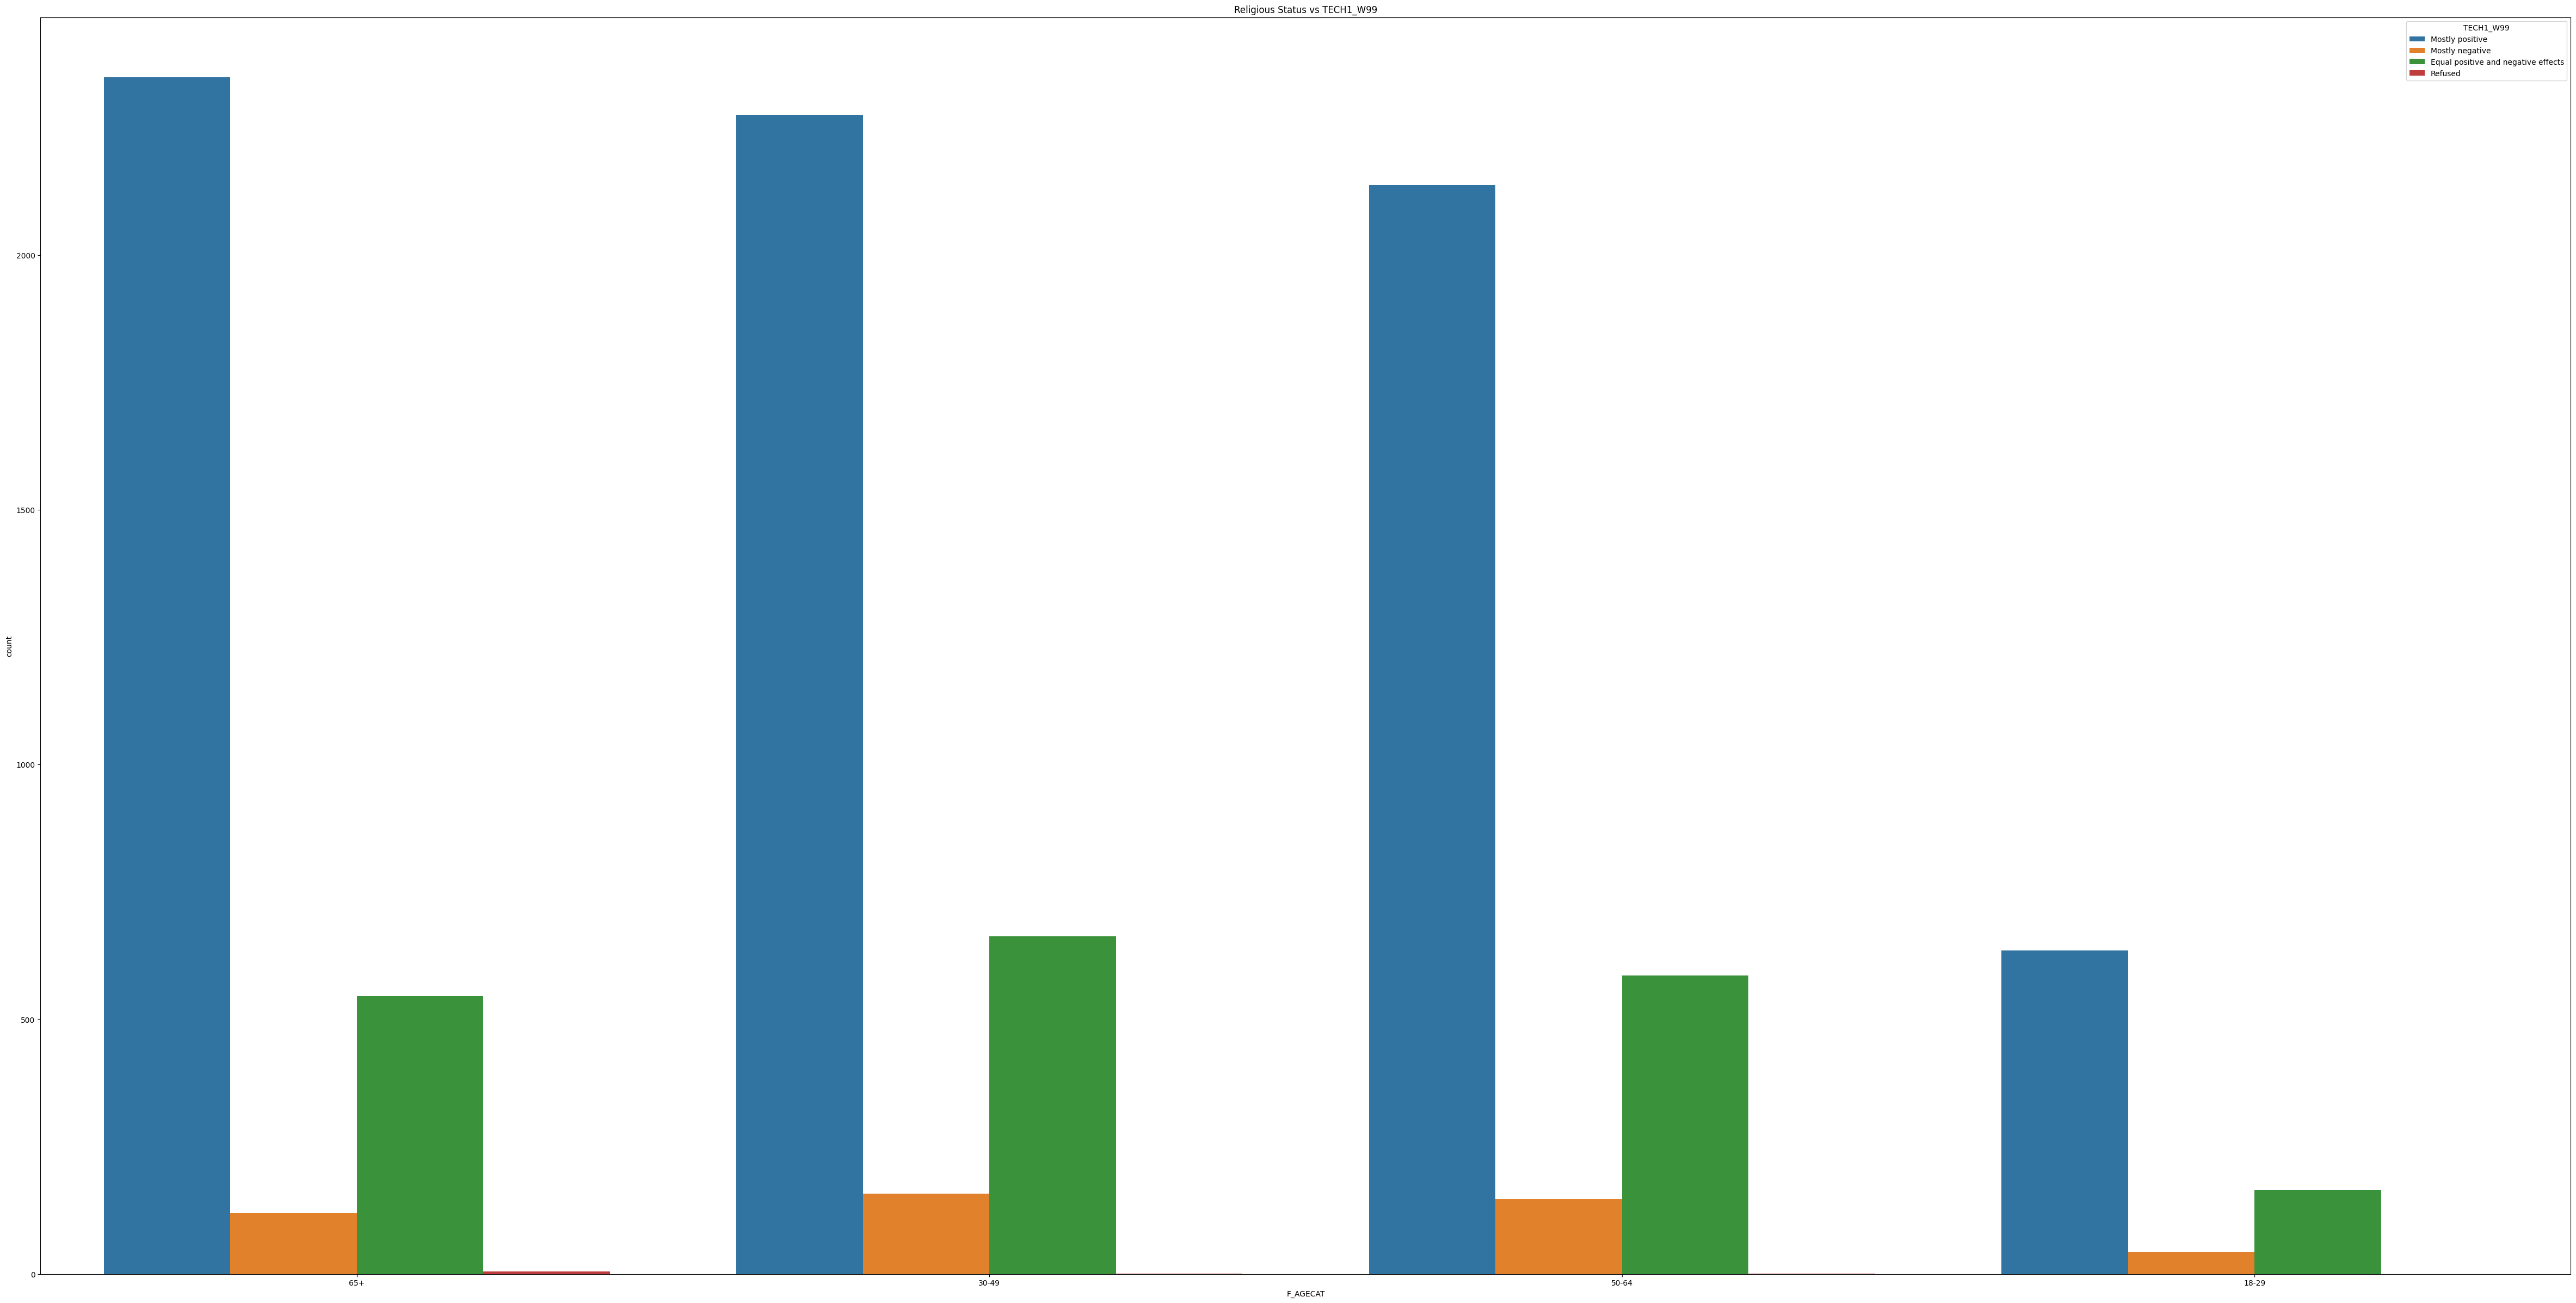

In [33]:
#create a displot of tech1_w99 and the categorical vars
#visualisation of the age and tech1_w99
df_filtered = df[df['F_AGECAT'] != 'Refused']
plt.figure(figsize=(60, 30))
sns.countplot(data=df_filtered, x='F_AGECAT', hue='TECH1_W99')
plt.title("Religious Status vs TECH1_W99")
plt.show()

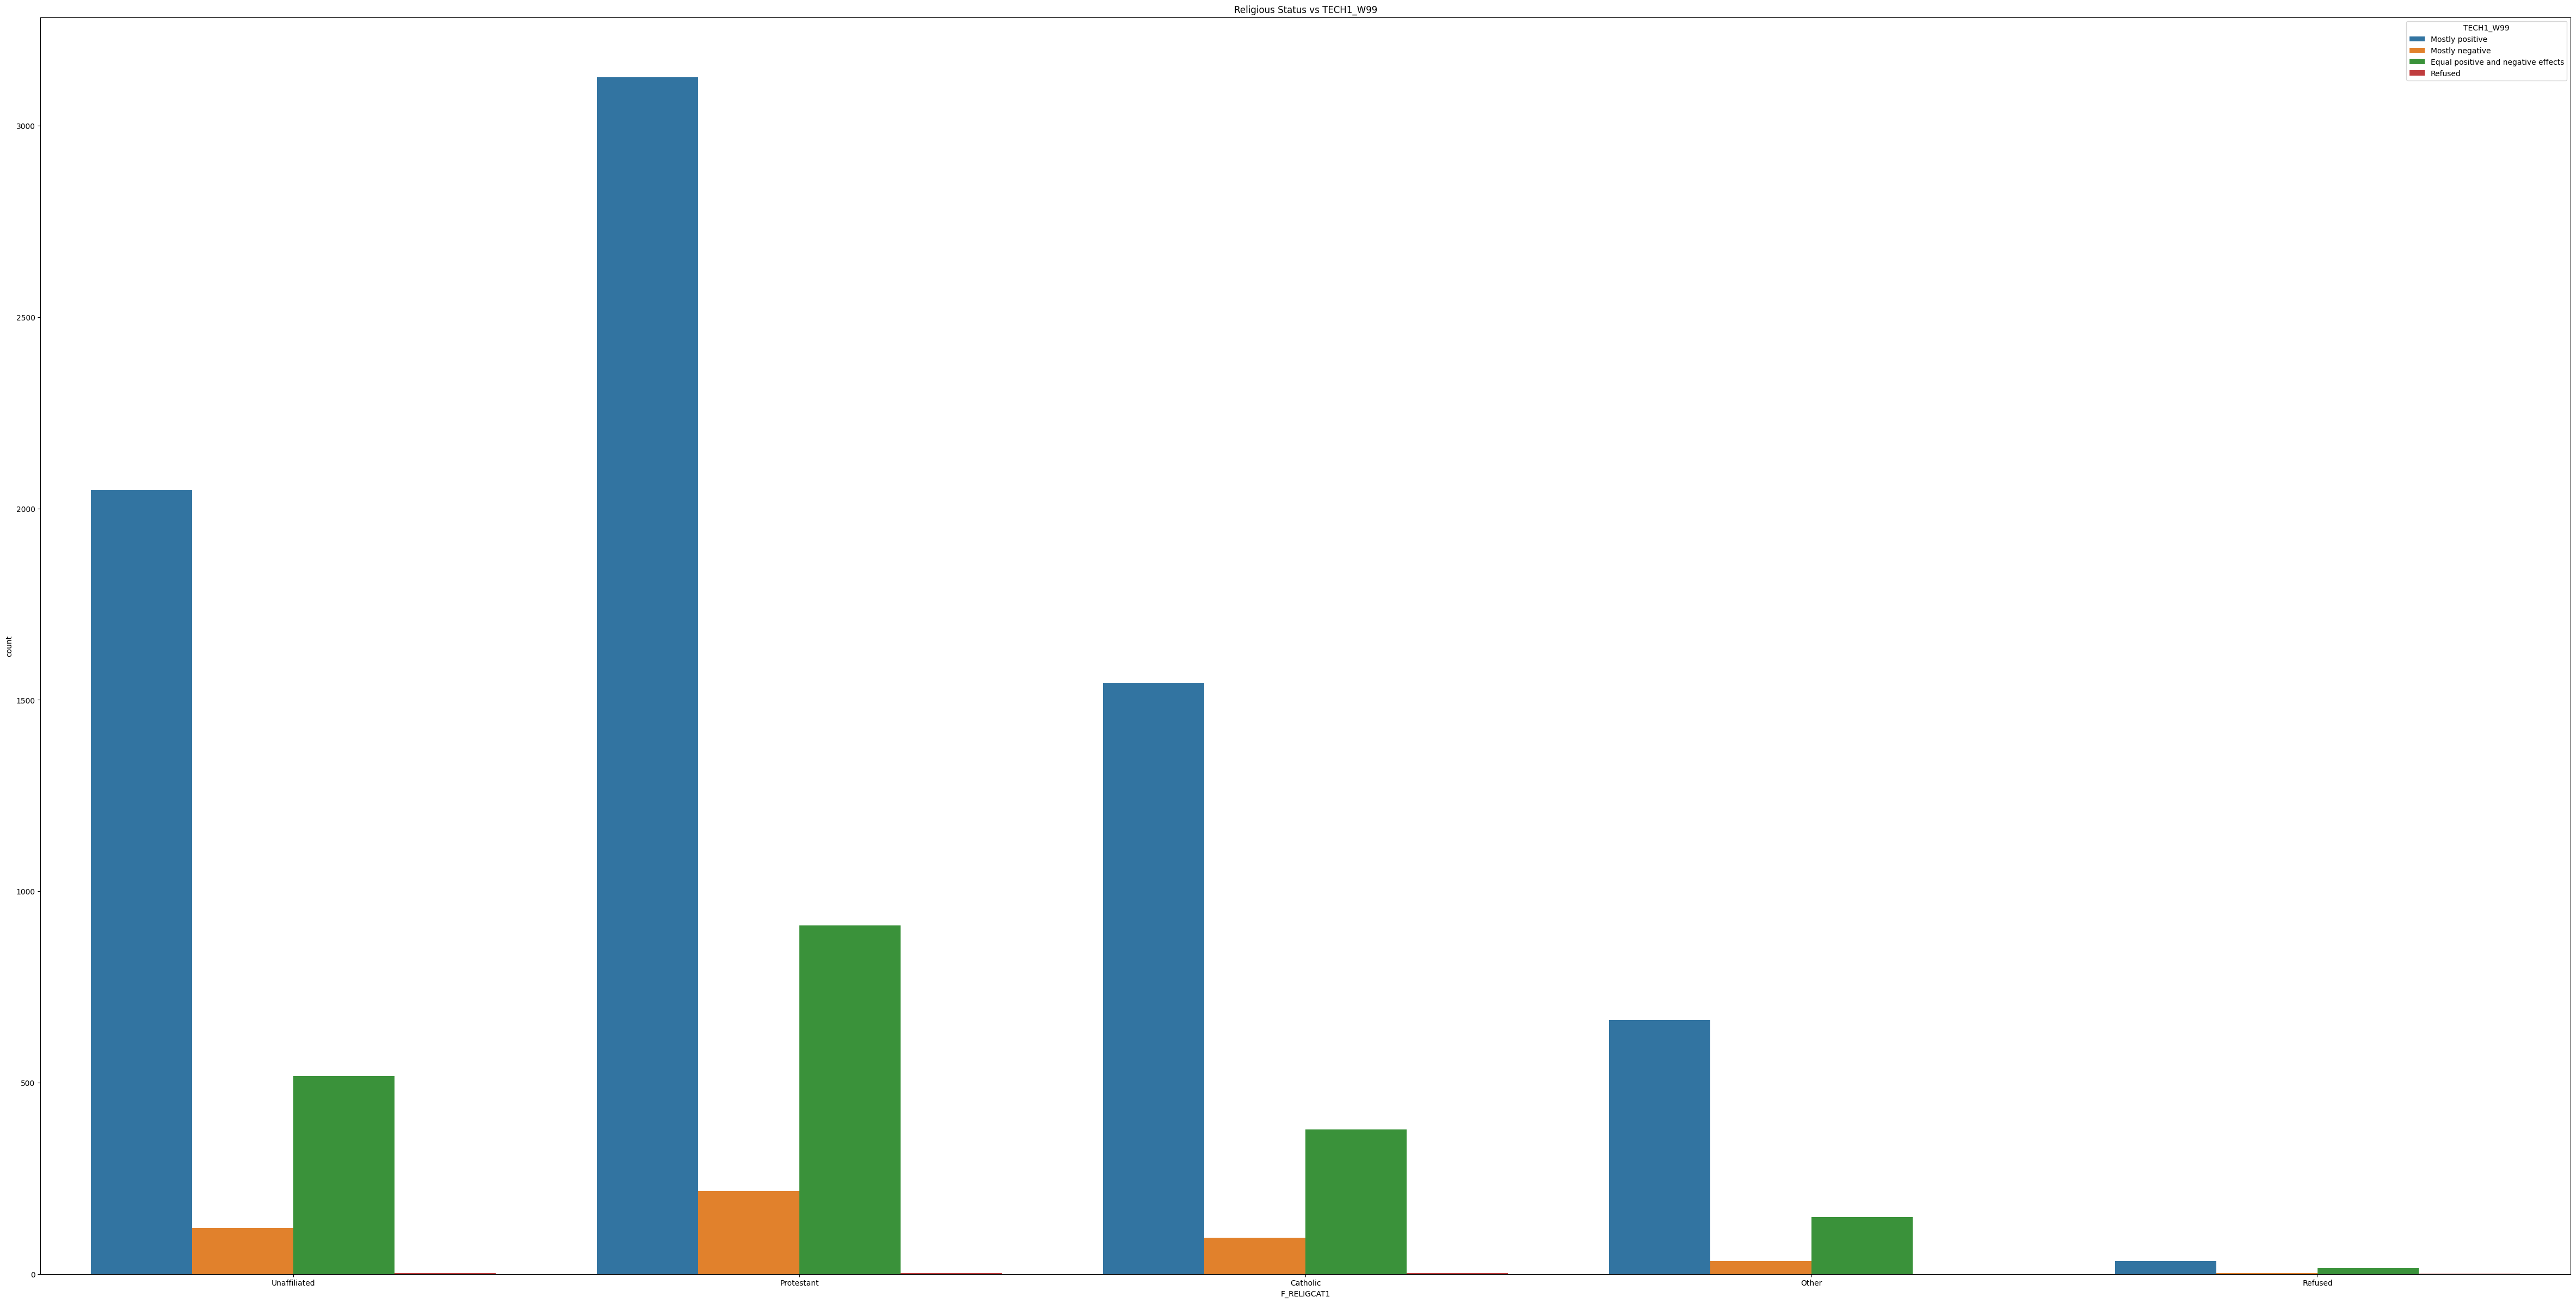

In [34]:
#visualisation of the religous status and tech1_w99
plt.figure(figsize=(60, 30))
sns.countplot(data=df, x='F_RELIGCAT1', hue='TECH1_W99')
plt.title("Religious Status vs TECH1_W99")
plt.show()

In [35]:
df["F_RELIGCAT1"].unique()

array(['Unaffiliated', 'Protestant', 'Catholic', 'Other', 'Refused'],
      dtype=object)

In [36]:

# List of columns to categorize
dcars_columns = [col for col in df_filtered.columns if col.startswith('DCARS')]
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_RELIGCAT1','F_RACETHNMOD','F_CITIZEN','F_EDUCCAT2','F_MARITAL','F_PARTY_FINAL']



# Create a summary of DCARS responses by demographic groups
summary = df_filtered.groupby(demographic_columns)[dcars_columns].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
print(summary)

                                                                                                                                          DCARS1_W99  \
F_AGECAT F_GENDER F_INC_TIER2  F_RELIGCAT1 F_RACETHNMOD       F_CITIZEN F_EDUCCAT2                      F_MARITAL          F_PARTY_FINAL               
18-29    A man    Lower income Catholic    Asian non-Hispanic Yes       Associate's degree              Married            Democrat           Medium   
                                           Hispanic           Yes       College graduate/some post grad Never been married Democrat           Medium   
                                                                        High school graduate            Never been married Independent        Medium   
                                                                        Postgraduate                    Never been married Democrat           Medium   
                                                                        Some college, no

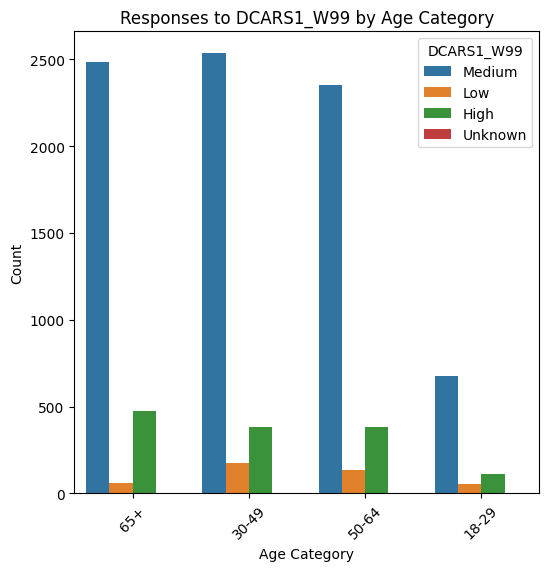

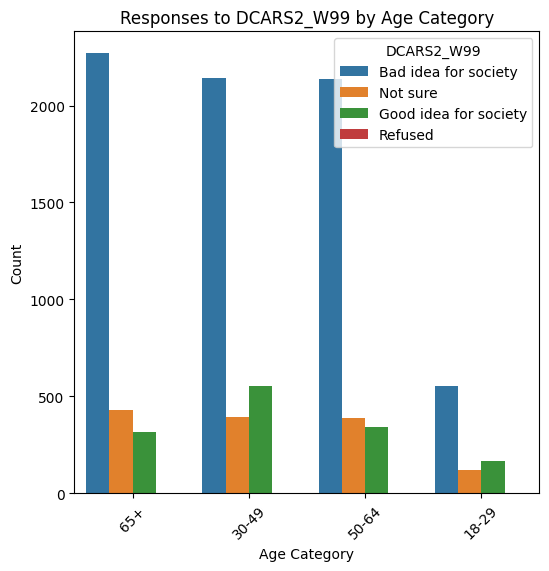

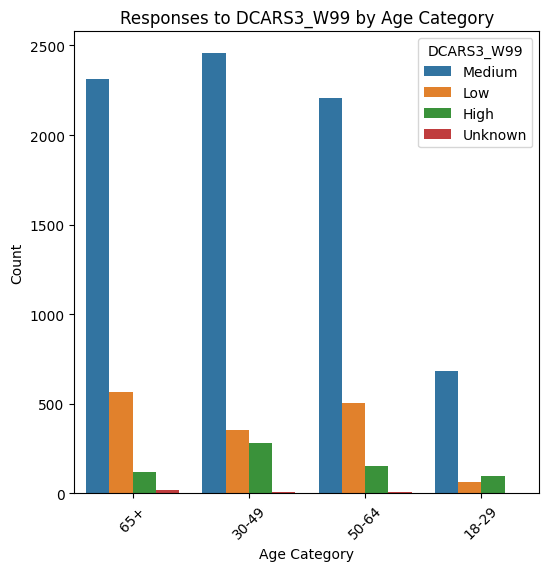

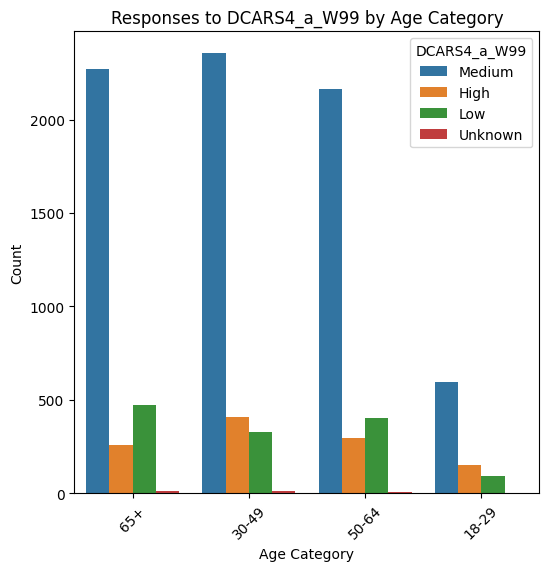

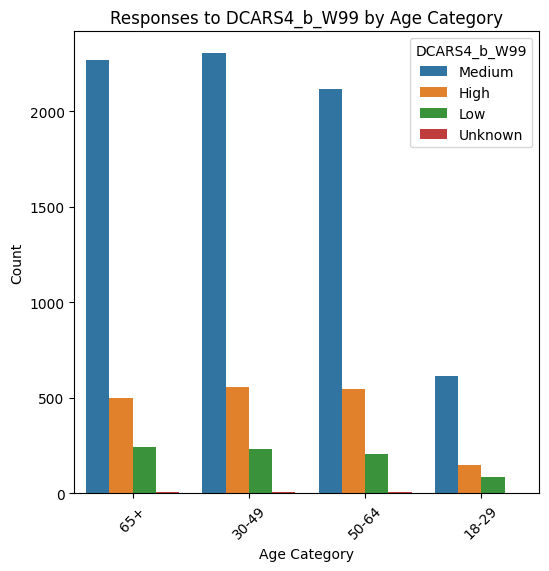

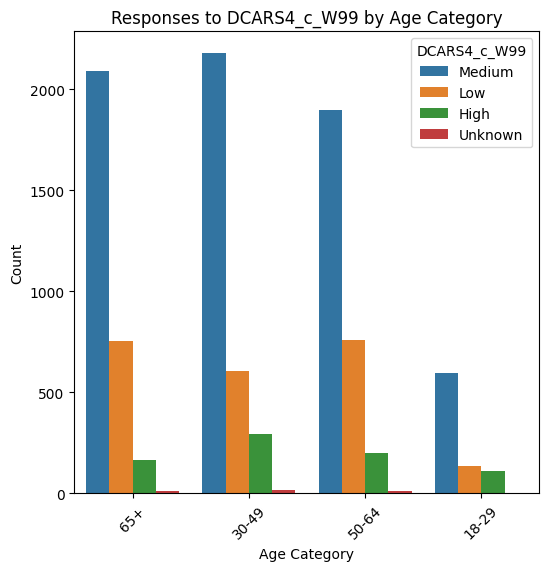

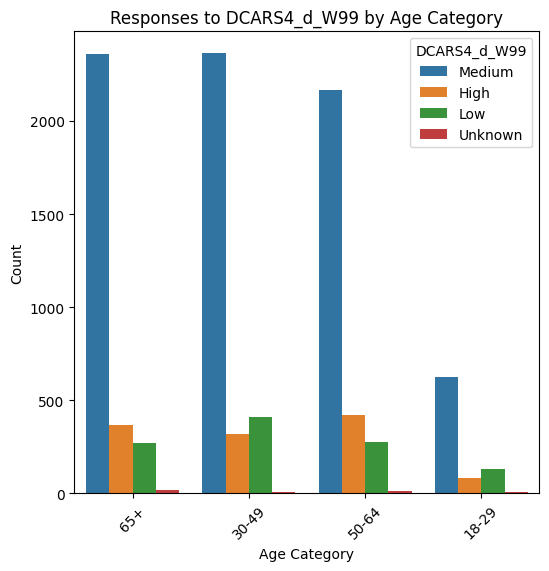

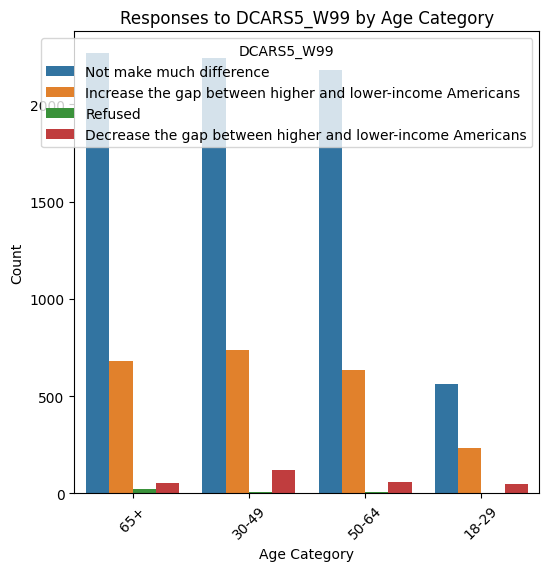

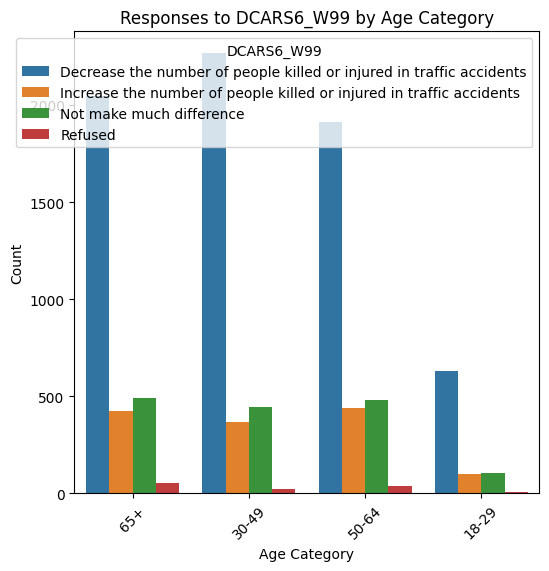

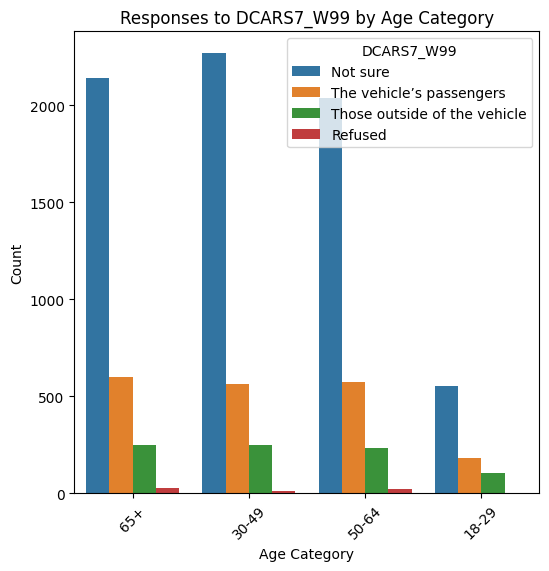

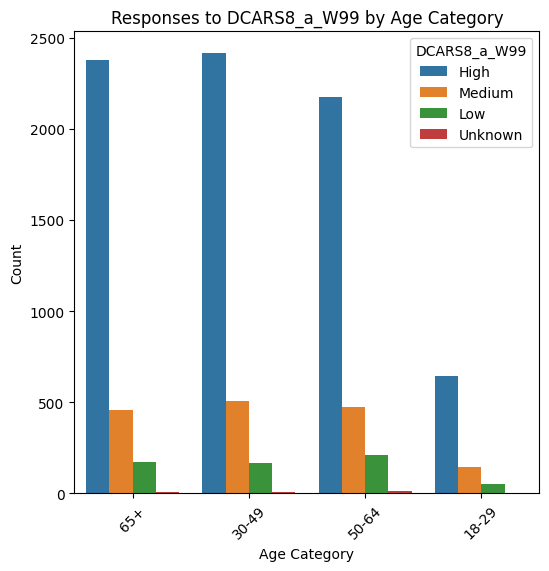

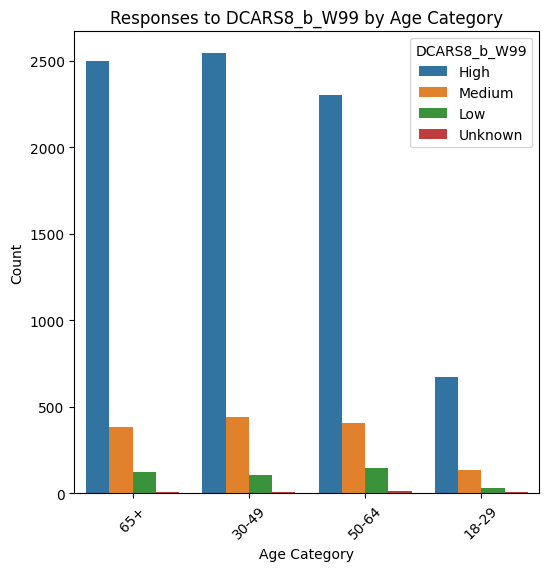

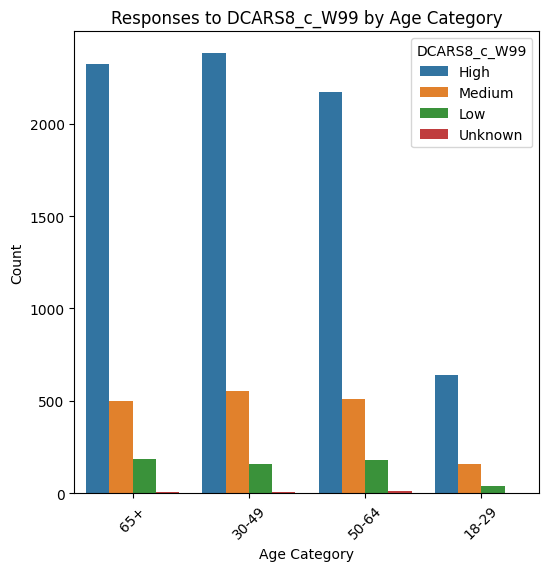

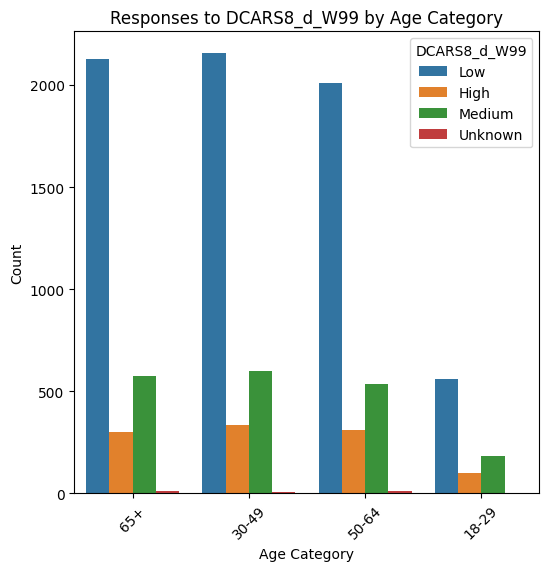

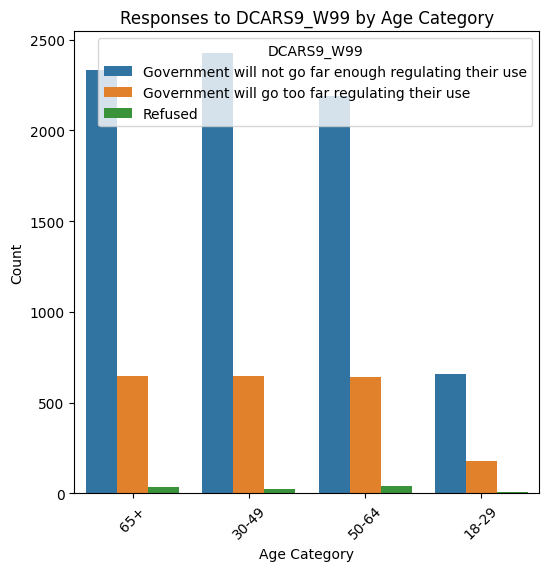

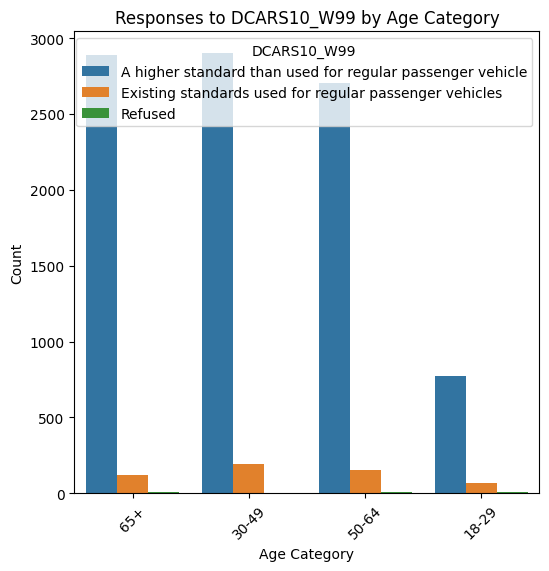

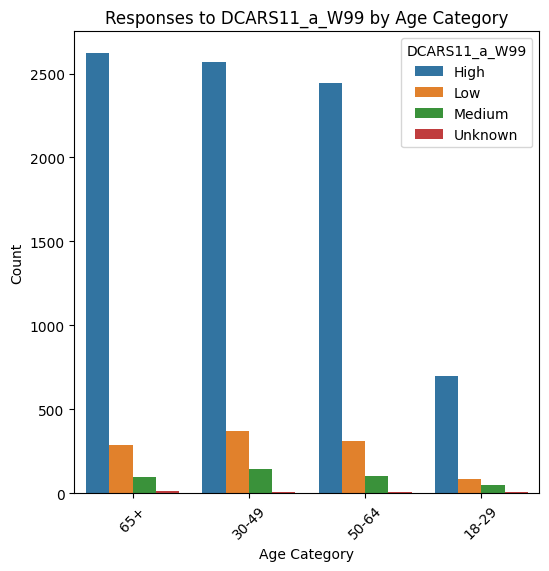

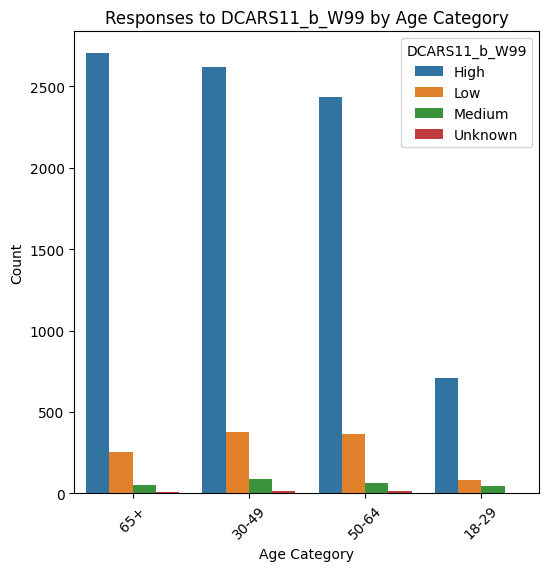

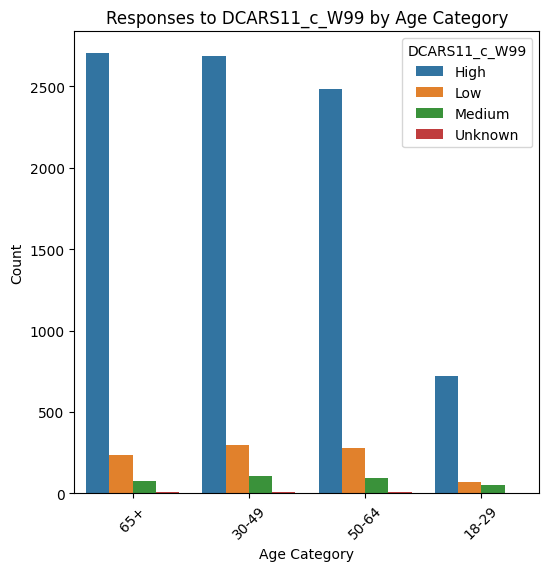

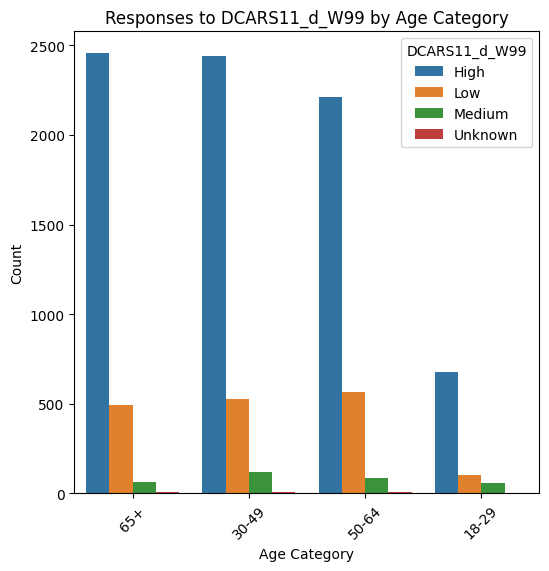

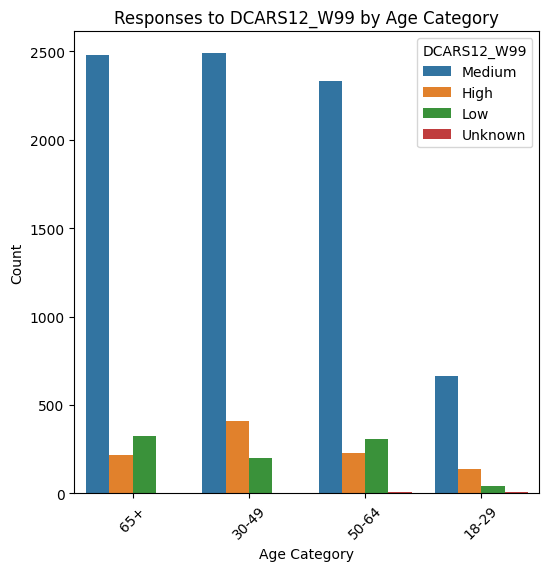

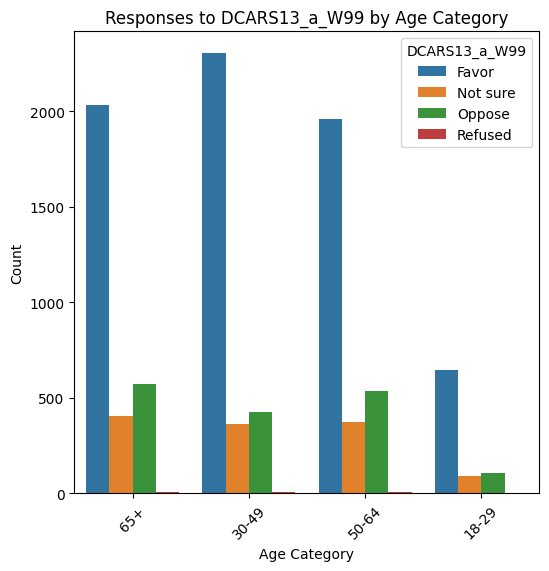

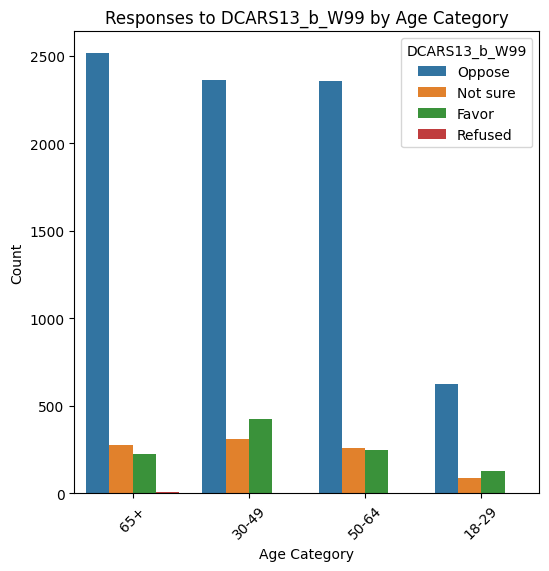

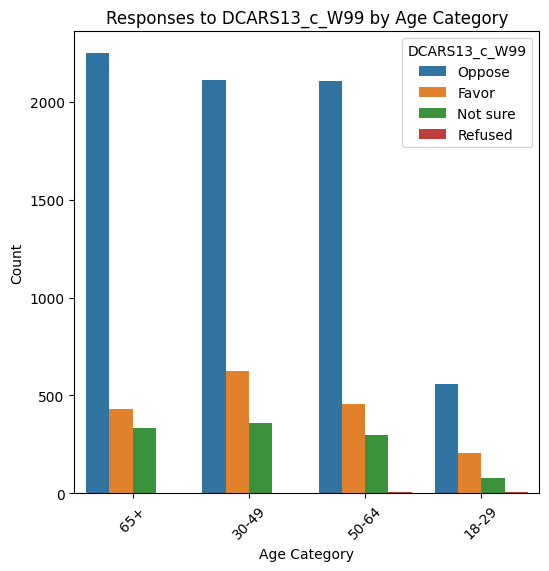

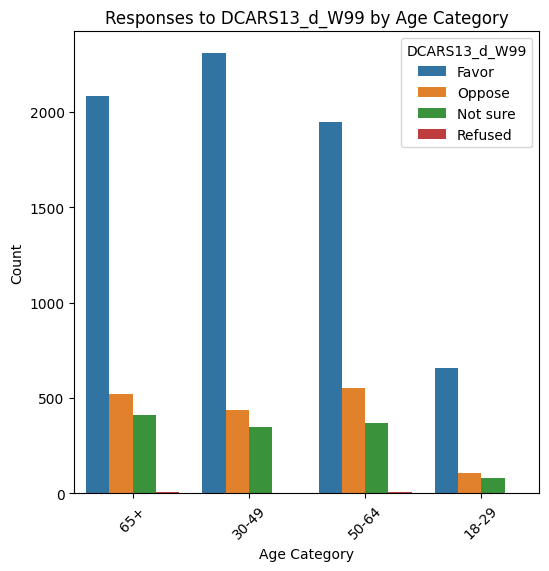

In [37]:
# List of columns to categorize
dcars_columns = [col for col in df_filtered.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(data=df_filtered, x='F_AGECAT', hue=col)
    plt.title(f'Responses to {col} by Age Category')
    plt.xlabel('Age Category')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


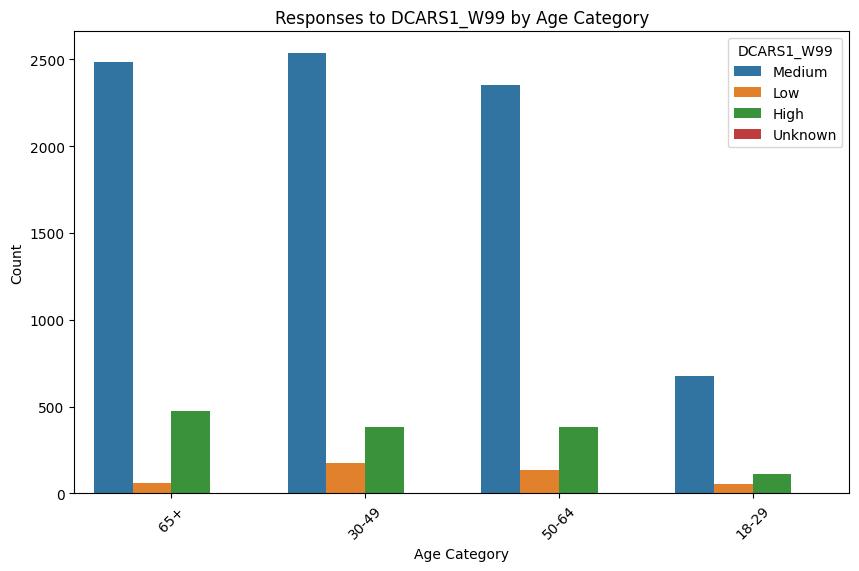

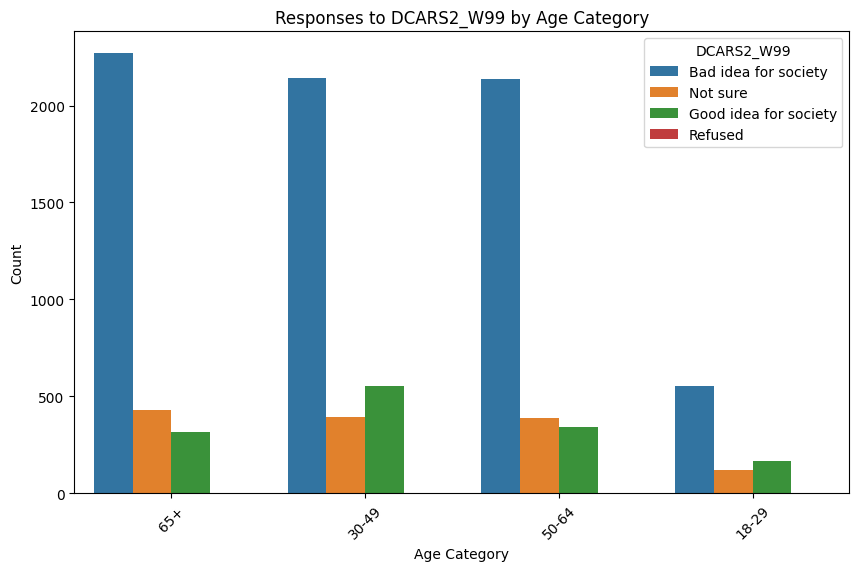

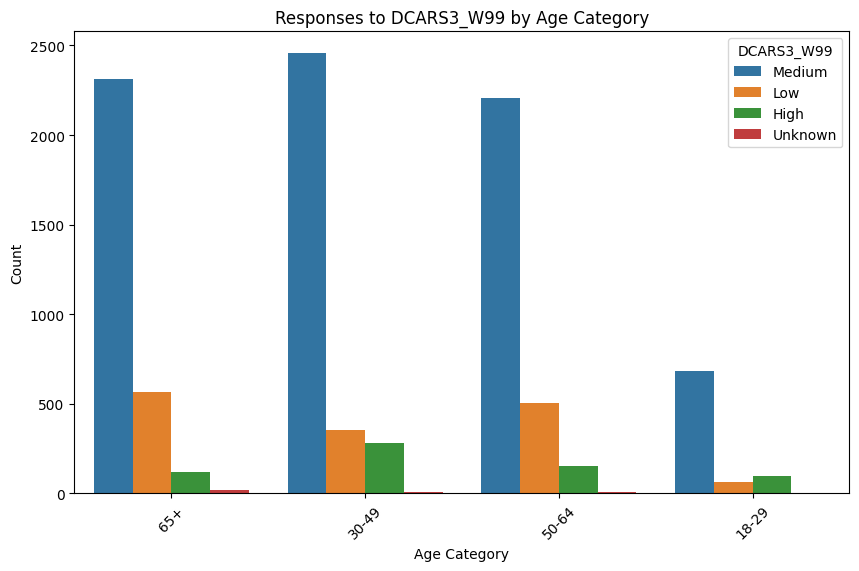

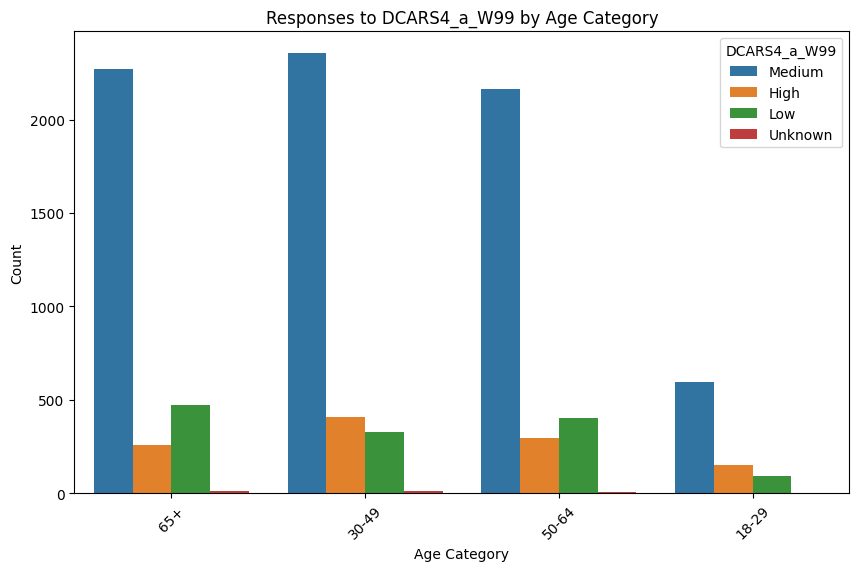

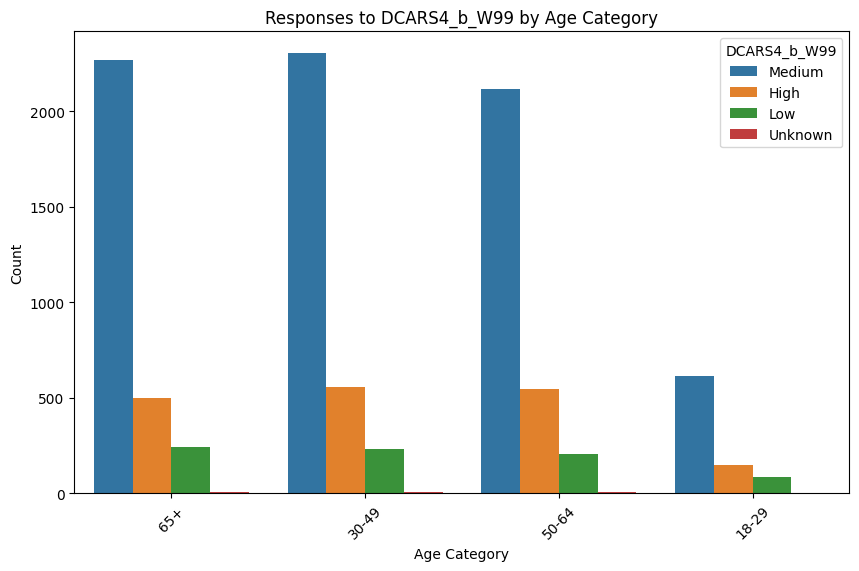

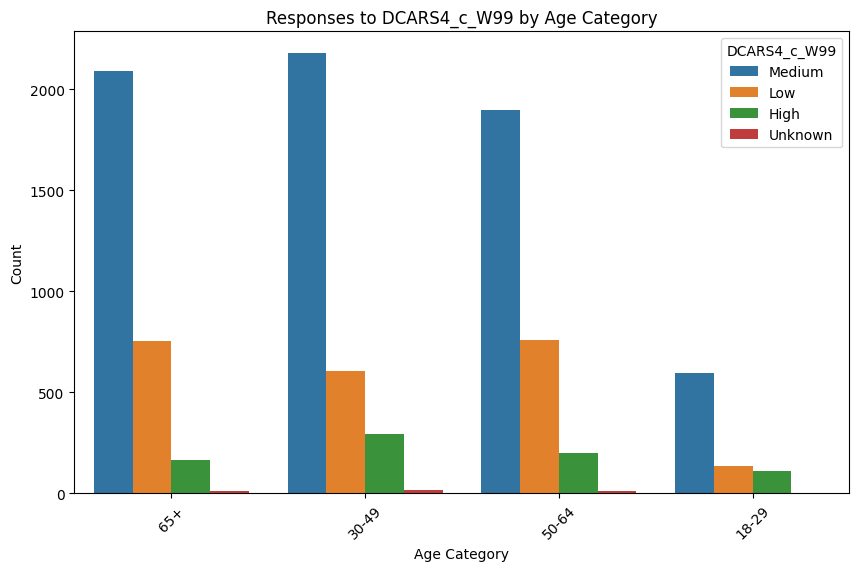

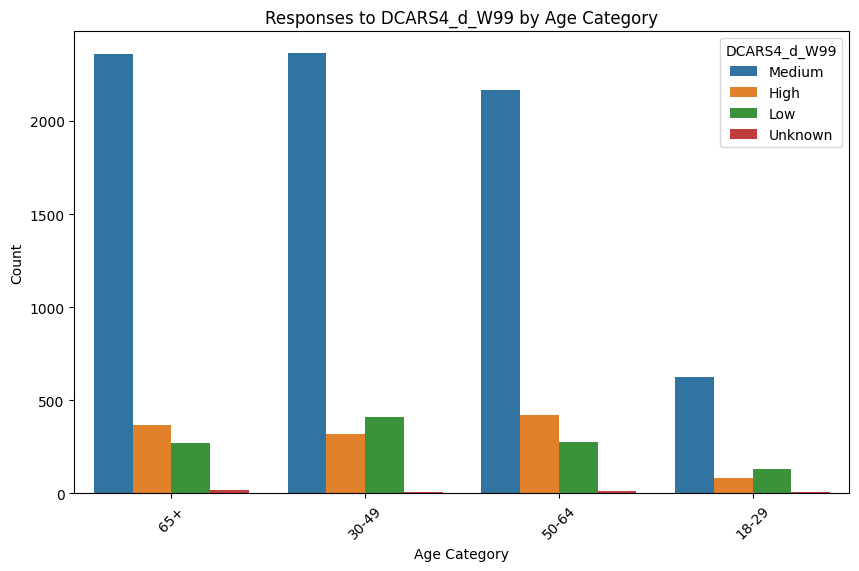

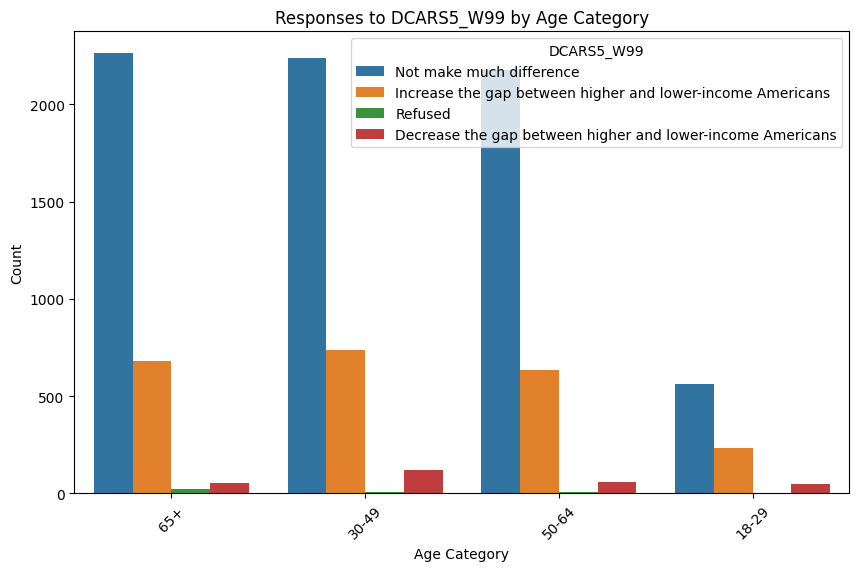

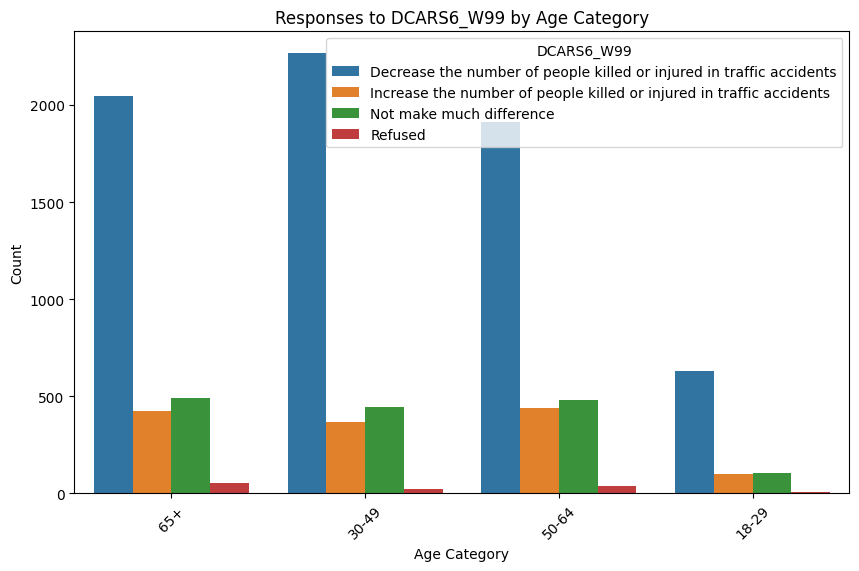

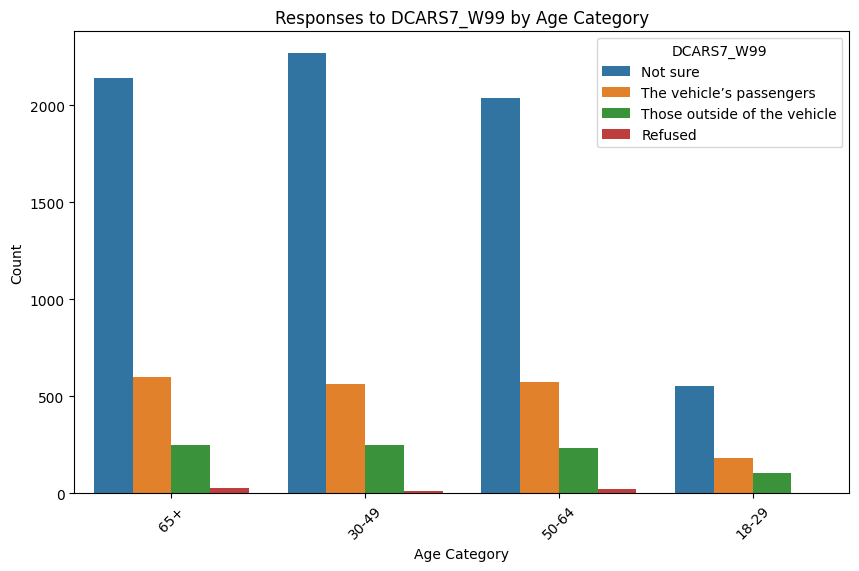

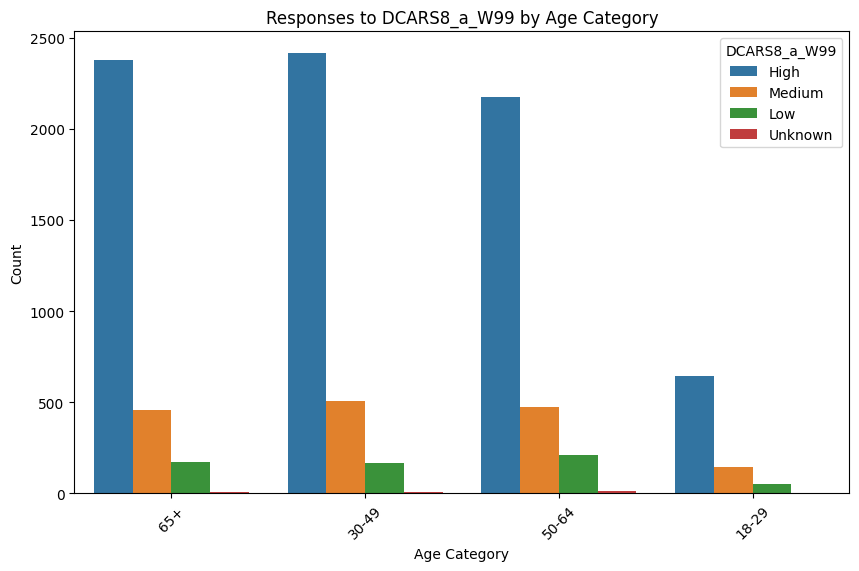

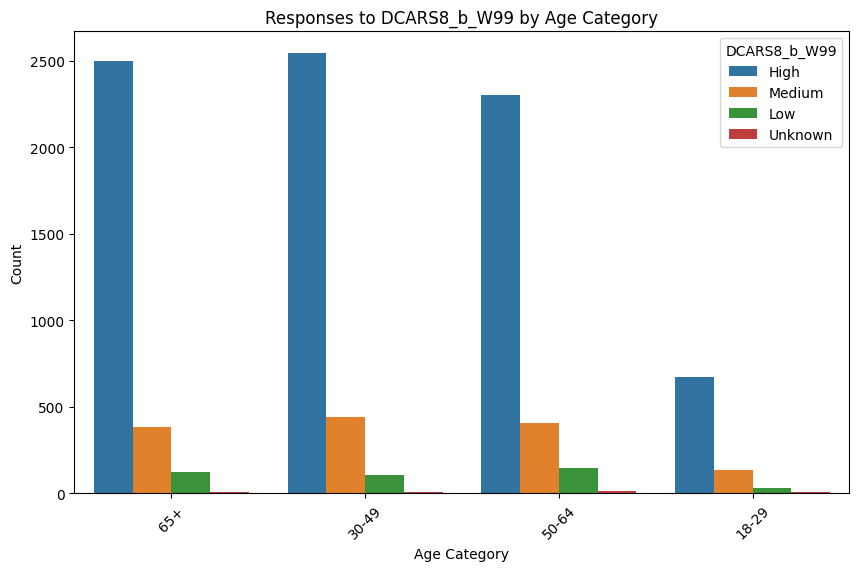

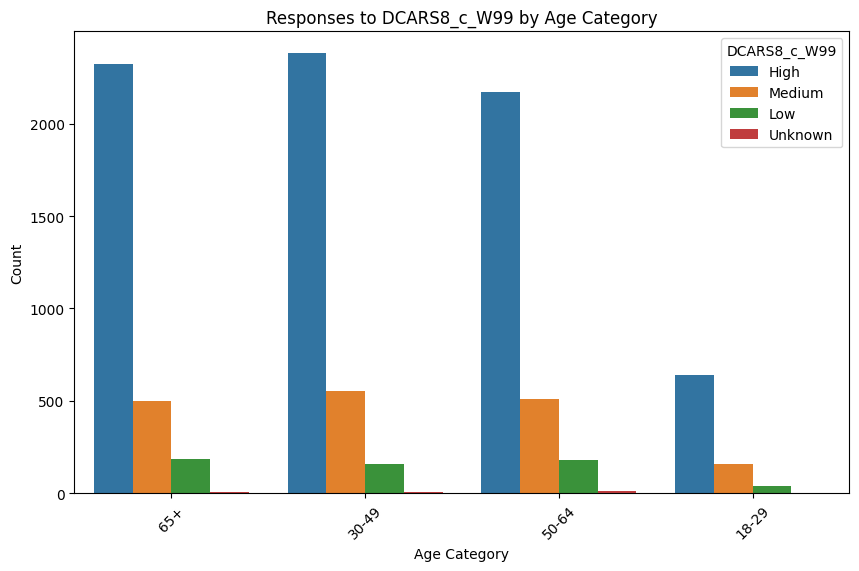

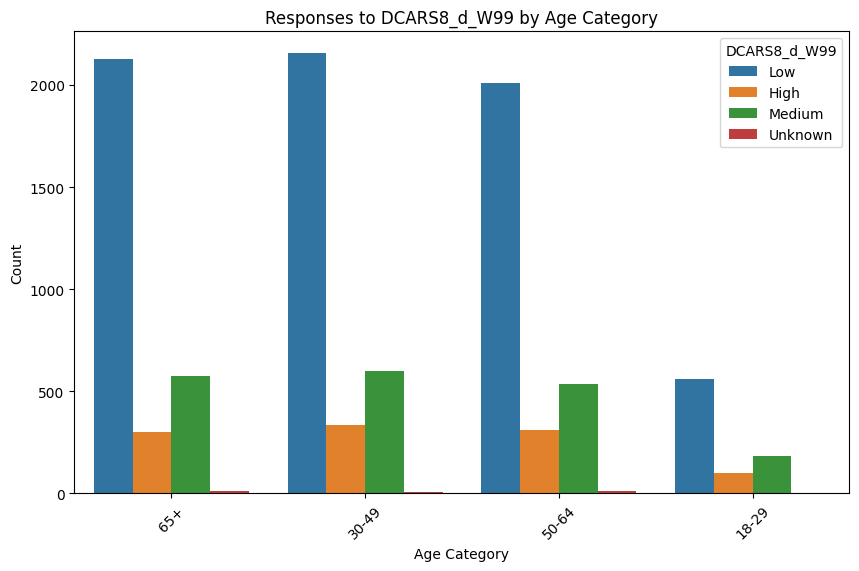

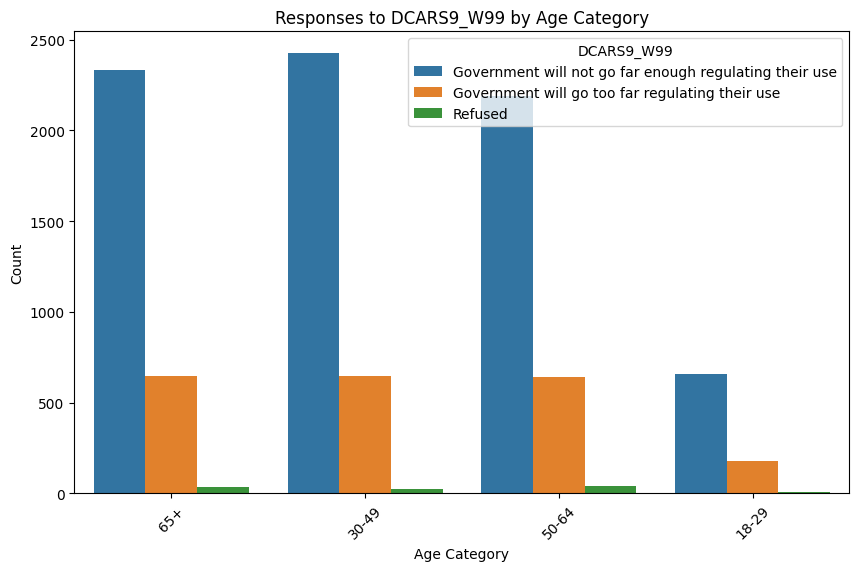

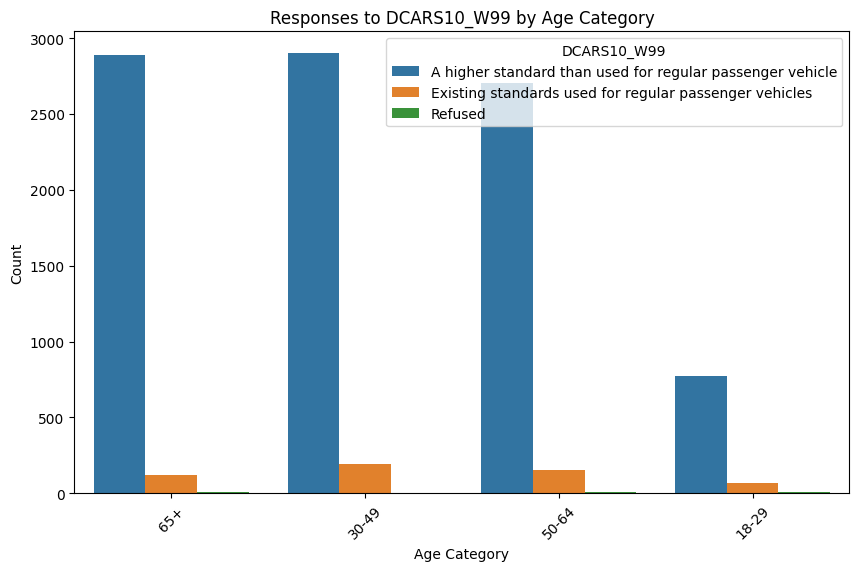

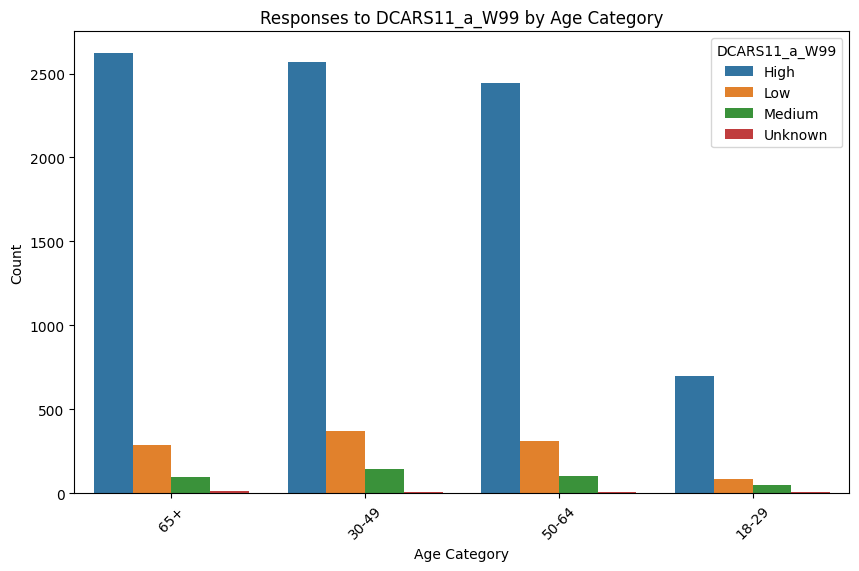

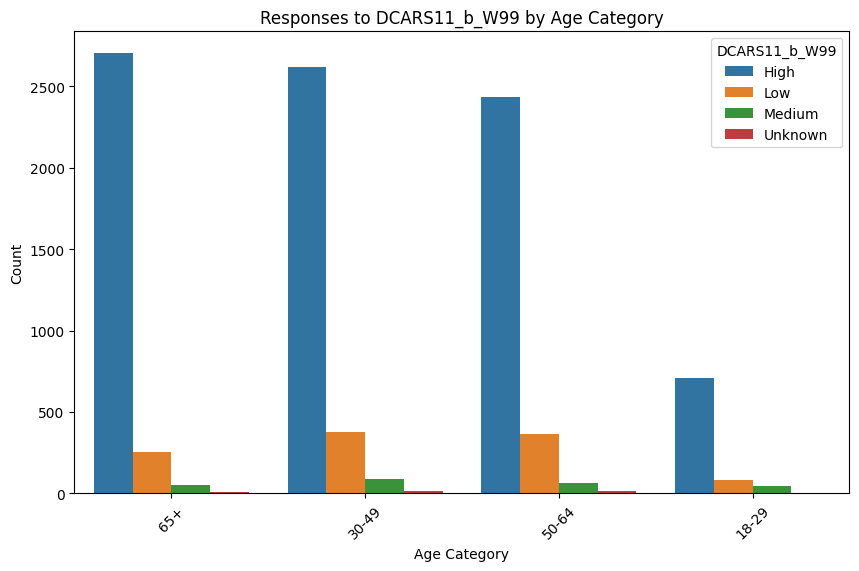

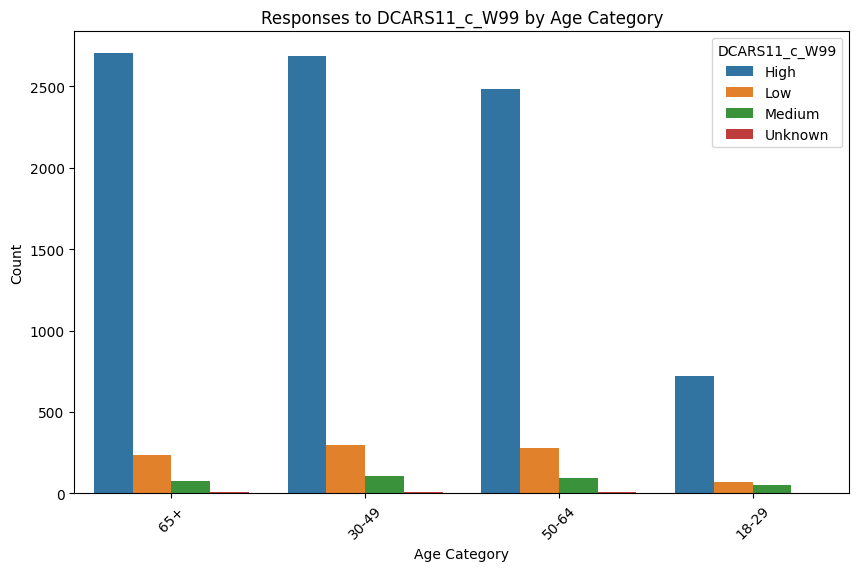

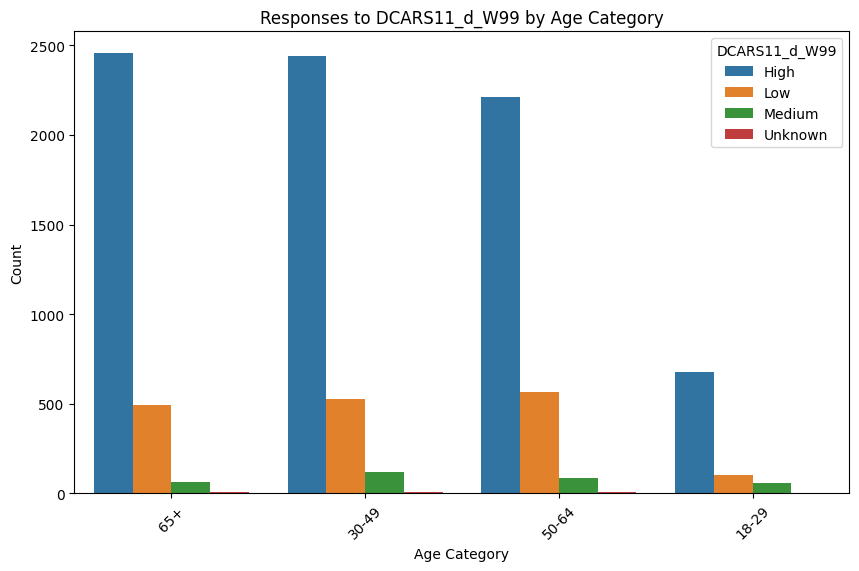

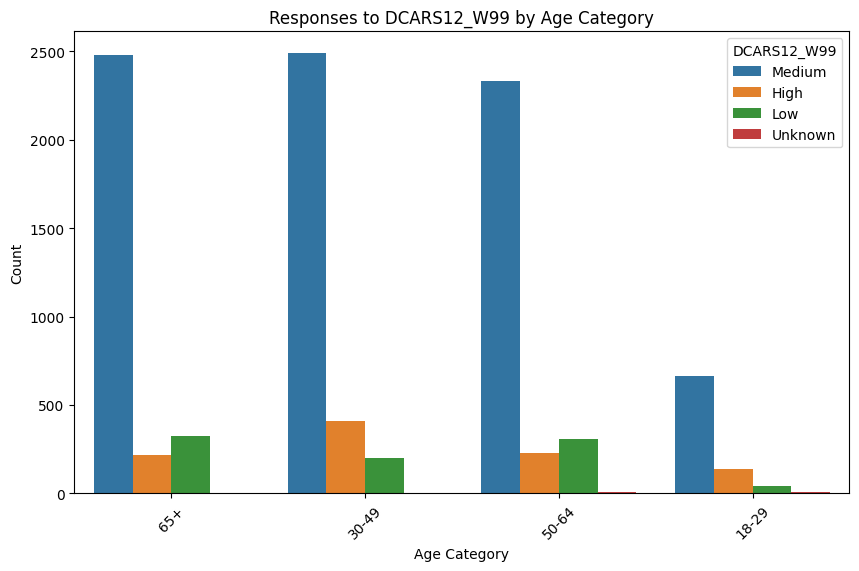

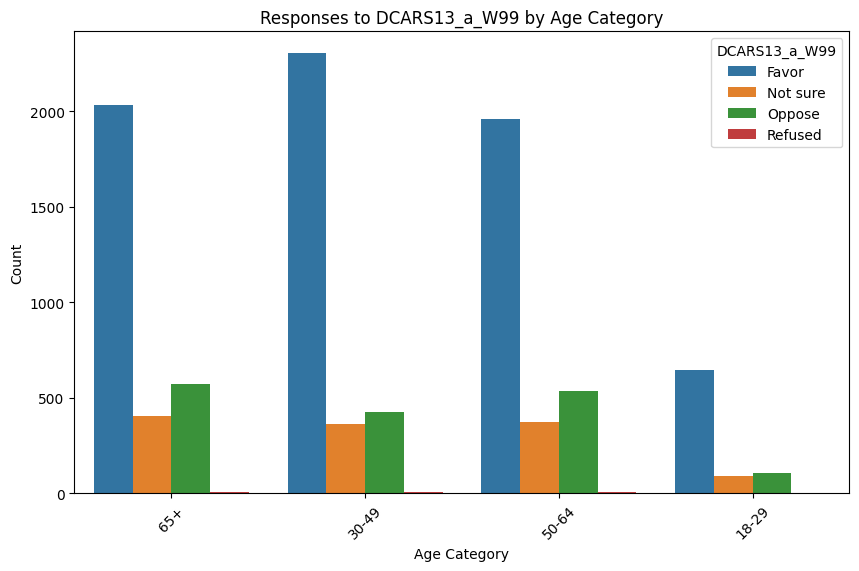

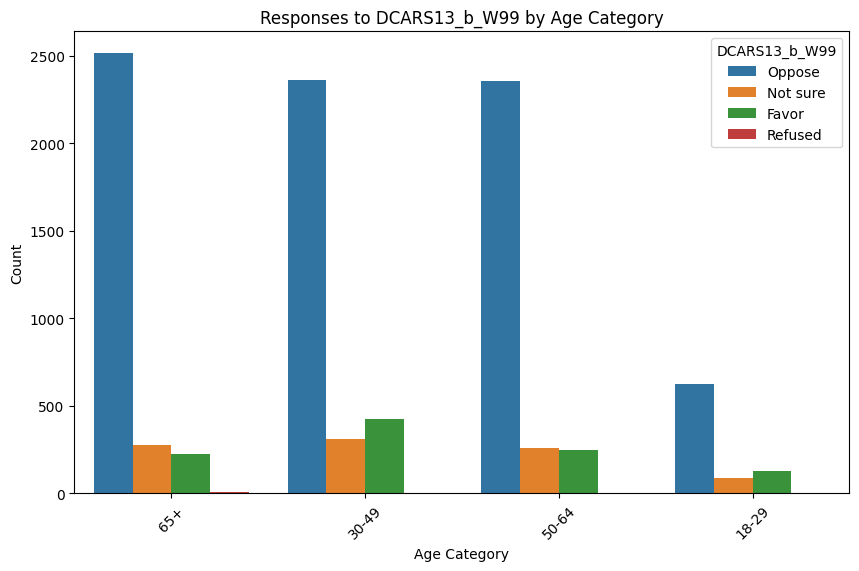

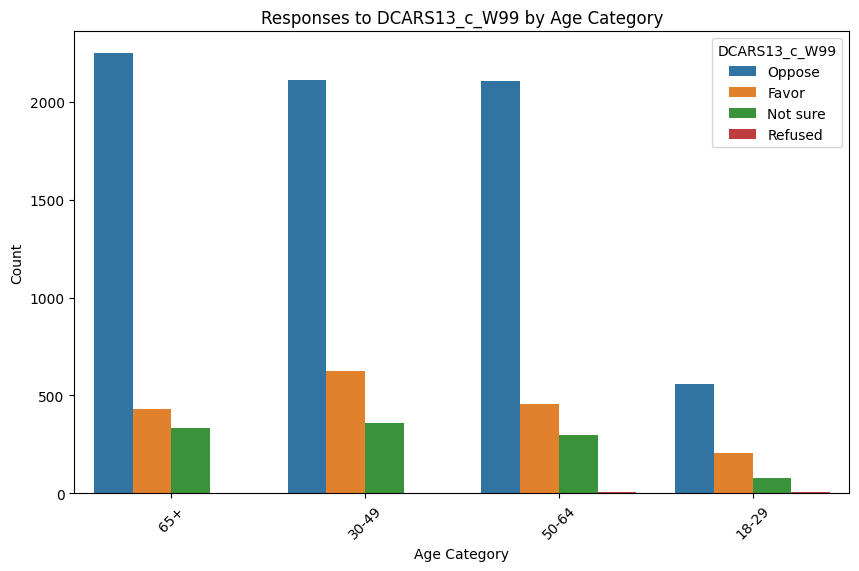

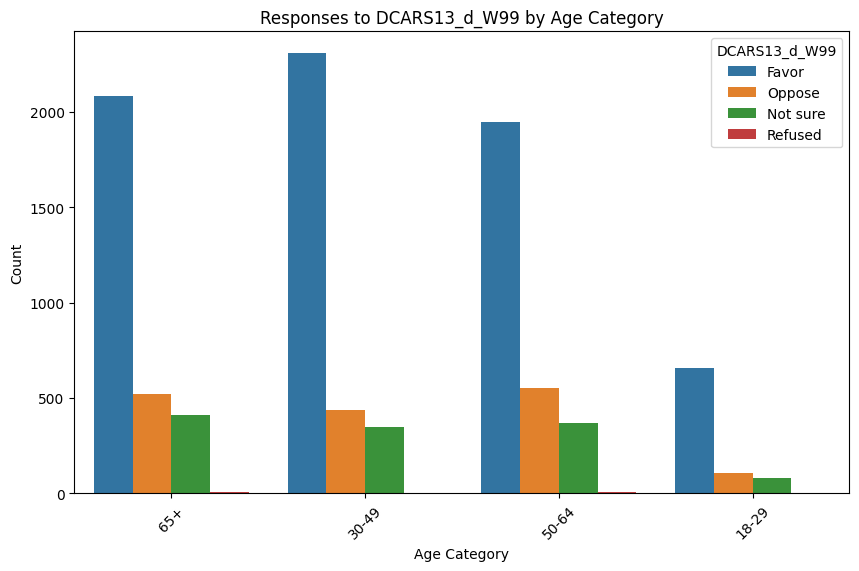

In [38]:
for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtered, x='F_AGECAT', hue=col)
    plt.title(f'Responses to {col} by Age Category')
    plt.xlabel('Age Category')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


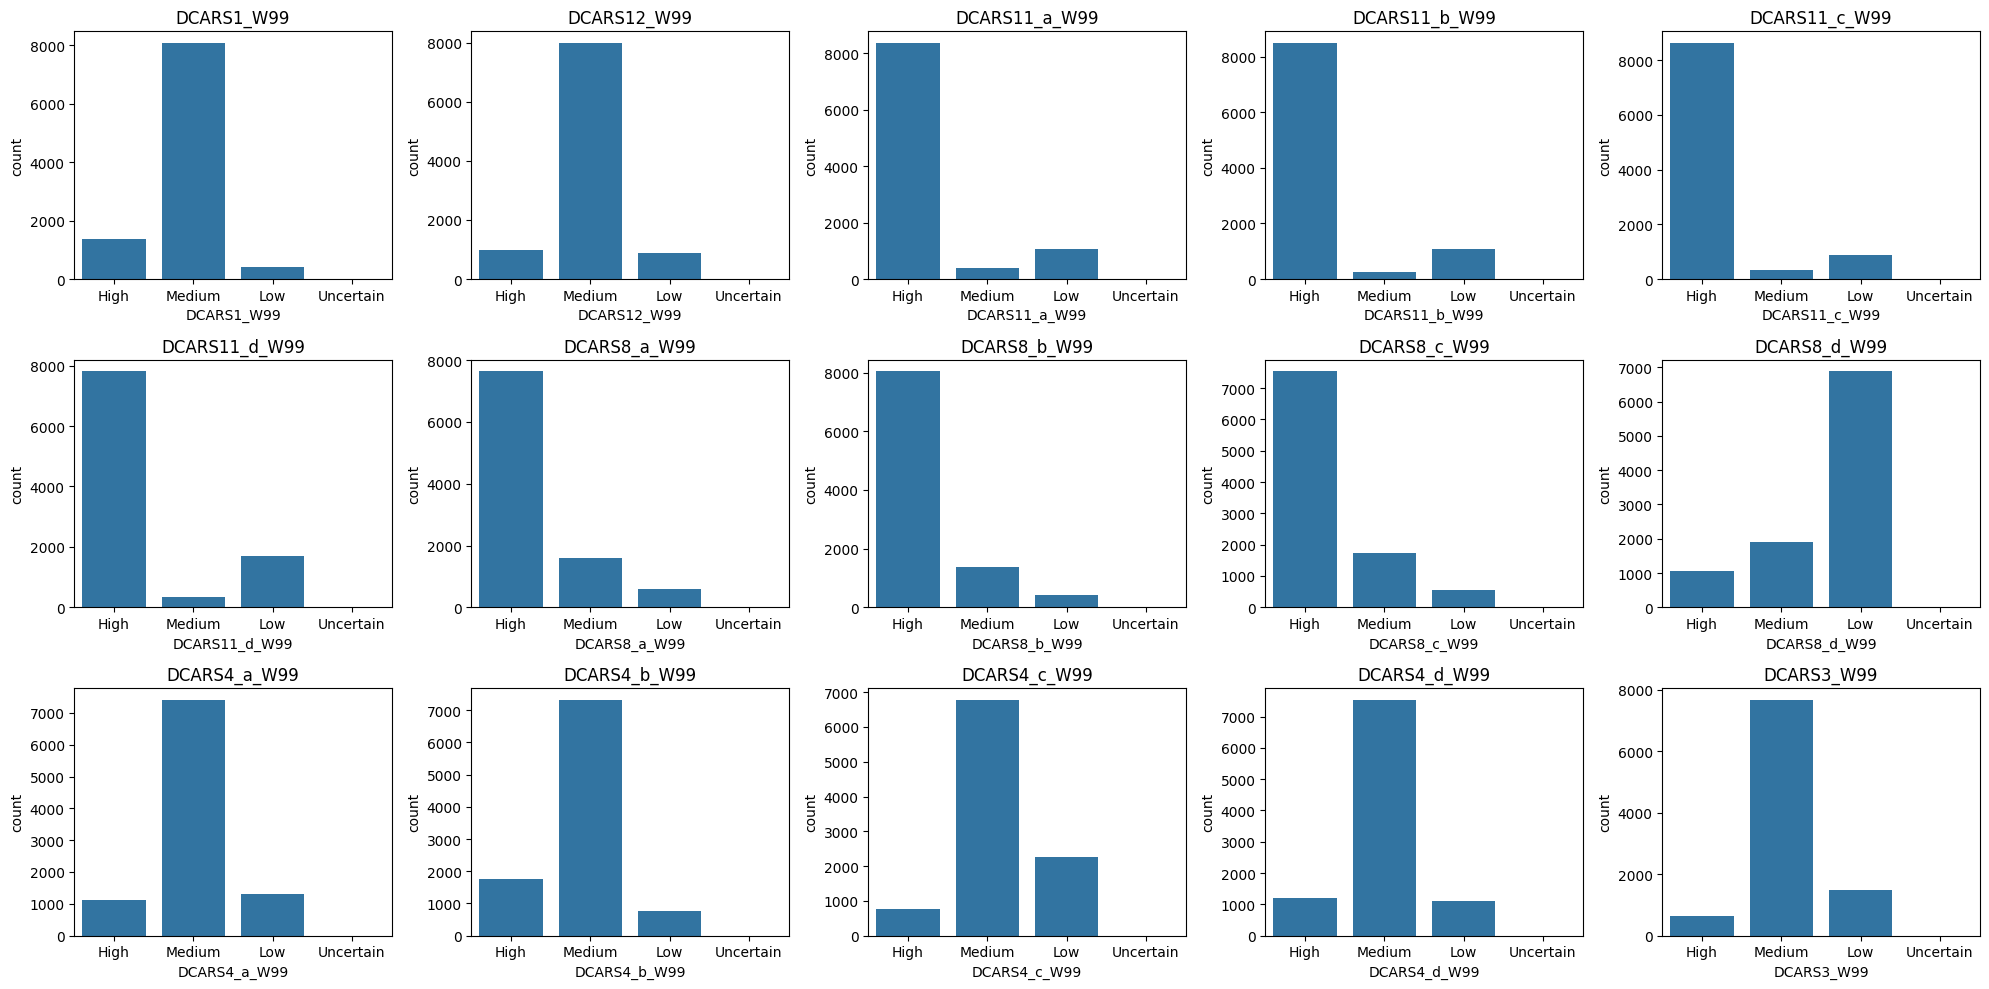

In [39]:
#create a visualisation to display the distribution of the High, Medium, Low and Uncertain values in the DCARS columns
# Visualize the distribution of the DCARS columns
plt.figure(figsize=(20, 10))
for i, column in enumerate(existing_columns):
    plt.subplot(3, 5, i+1)
    sns.countplot(data=df, x=column, order=['High', 'Medium', 'Low', 'Uncertain'])
    plt.title(column)

plt.tight_layout()  
plt.show()

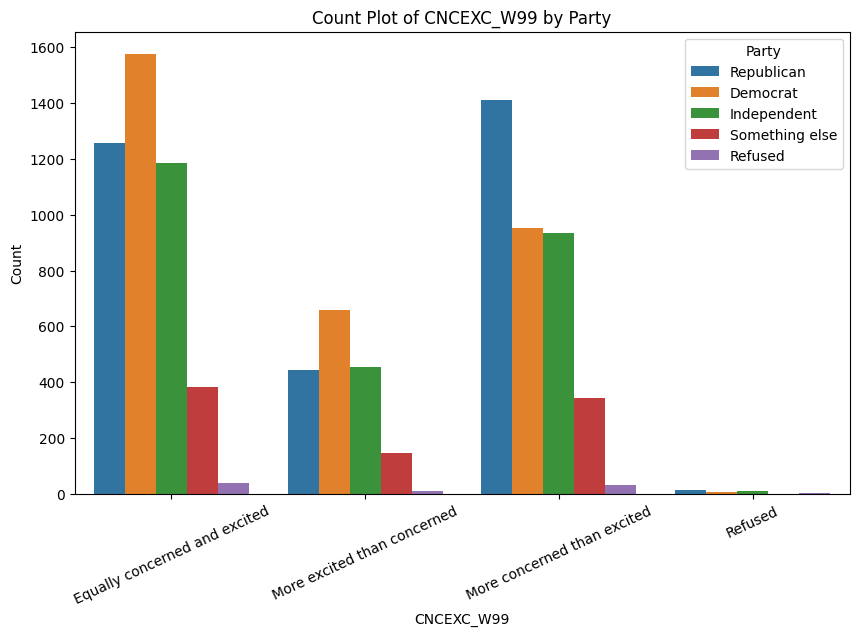

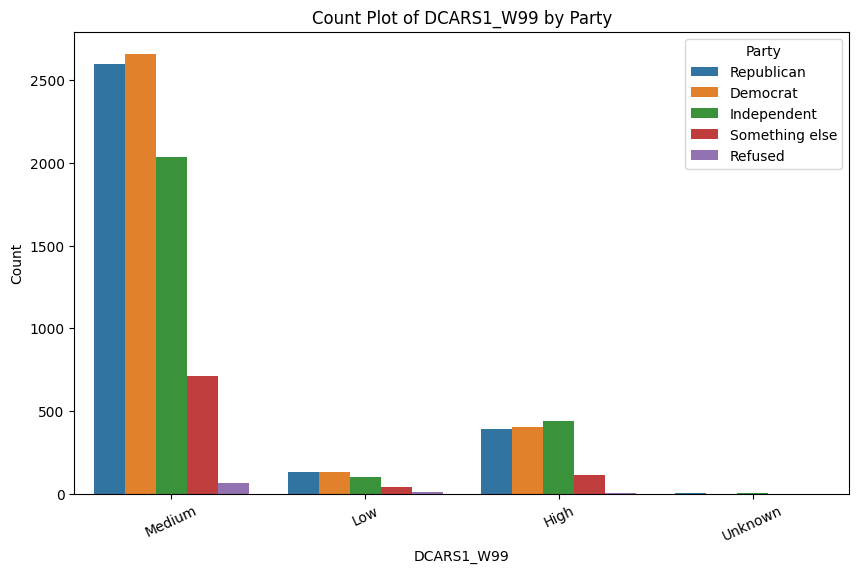

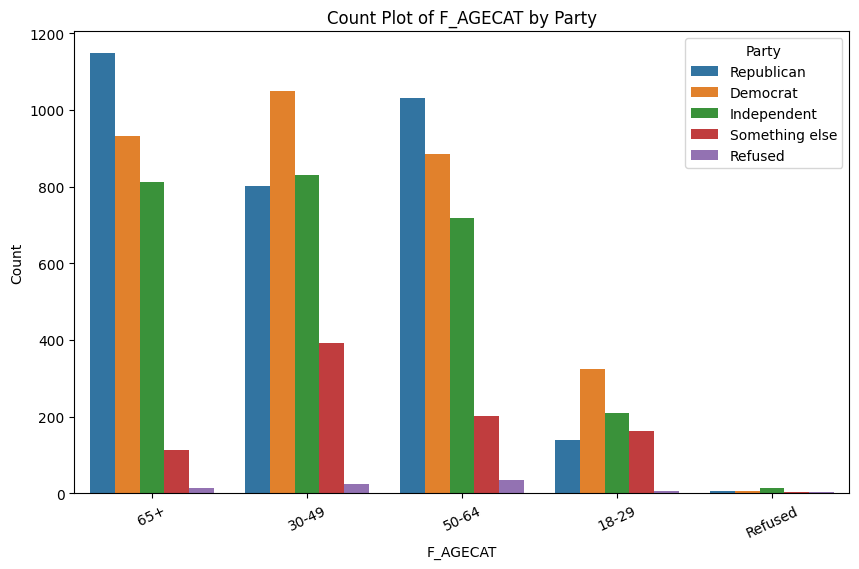

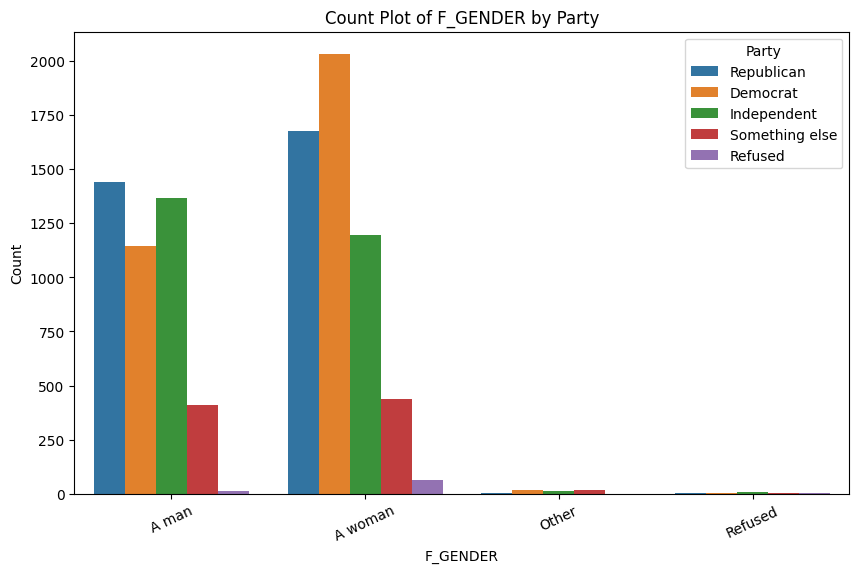

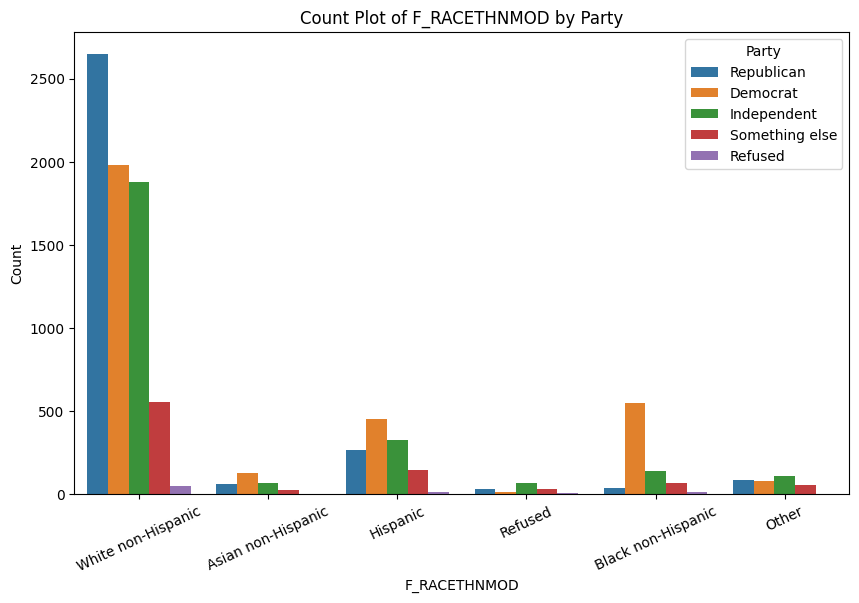

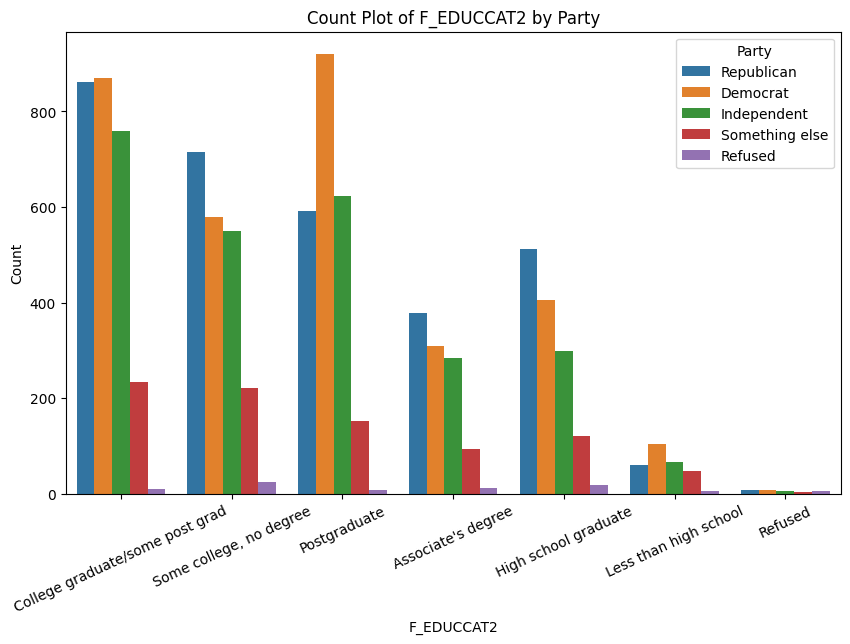

In [40]:
# Variables to plot
variables_to_plot = ['CNCEXC_W99', 'DCARS1_W99','F_AGECAT', 'F_GENDER','F_RACETHNMOD','F_EDUCCAT2']

# Plotting with slanted x-axis labels, grouped by F_PARTY_FINAL
#(Taking a look to see which political party is more likely to be accepting of self driving cars and then going further to analyse the political parties and their demographics
for var in variables_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var, hue='F_PARTY_FINAL')
    plt.title(f'Count Plot of {var} by Party')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Party')
    plt.xticks(rotation=25)  # Slant the labels on the x-axis
    plt.show()

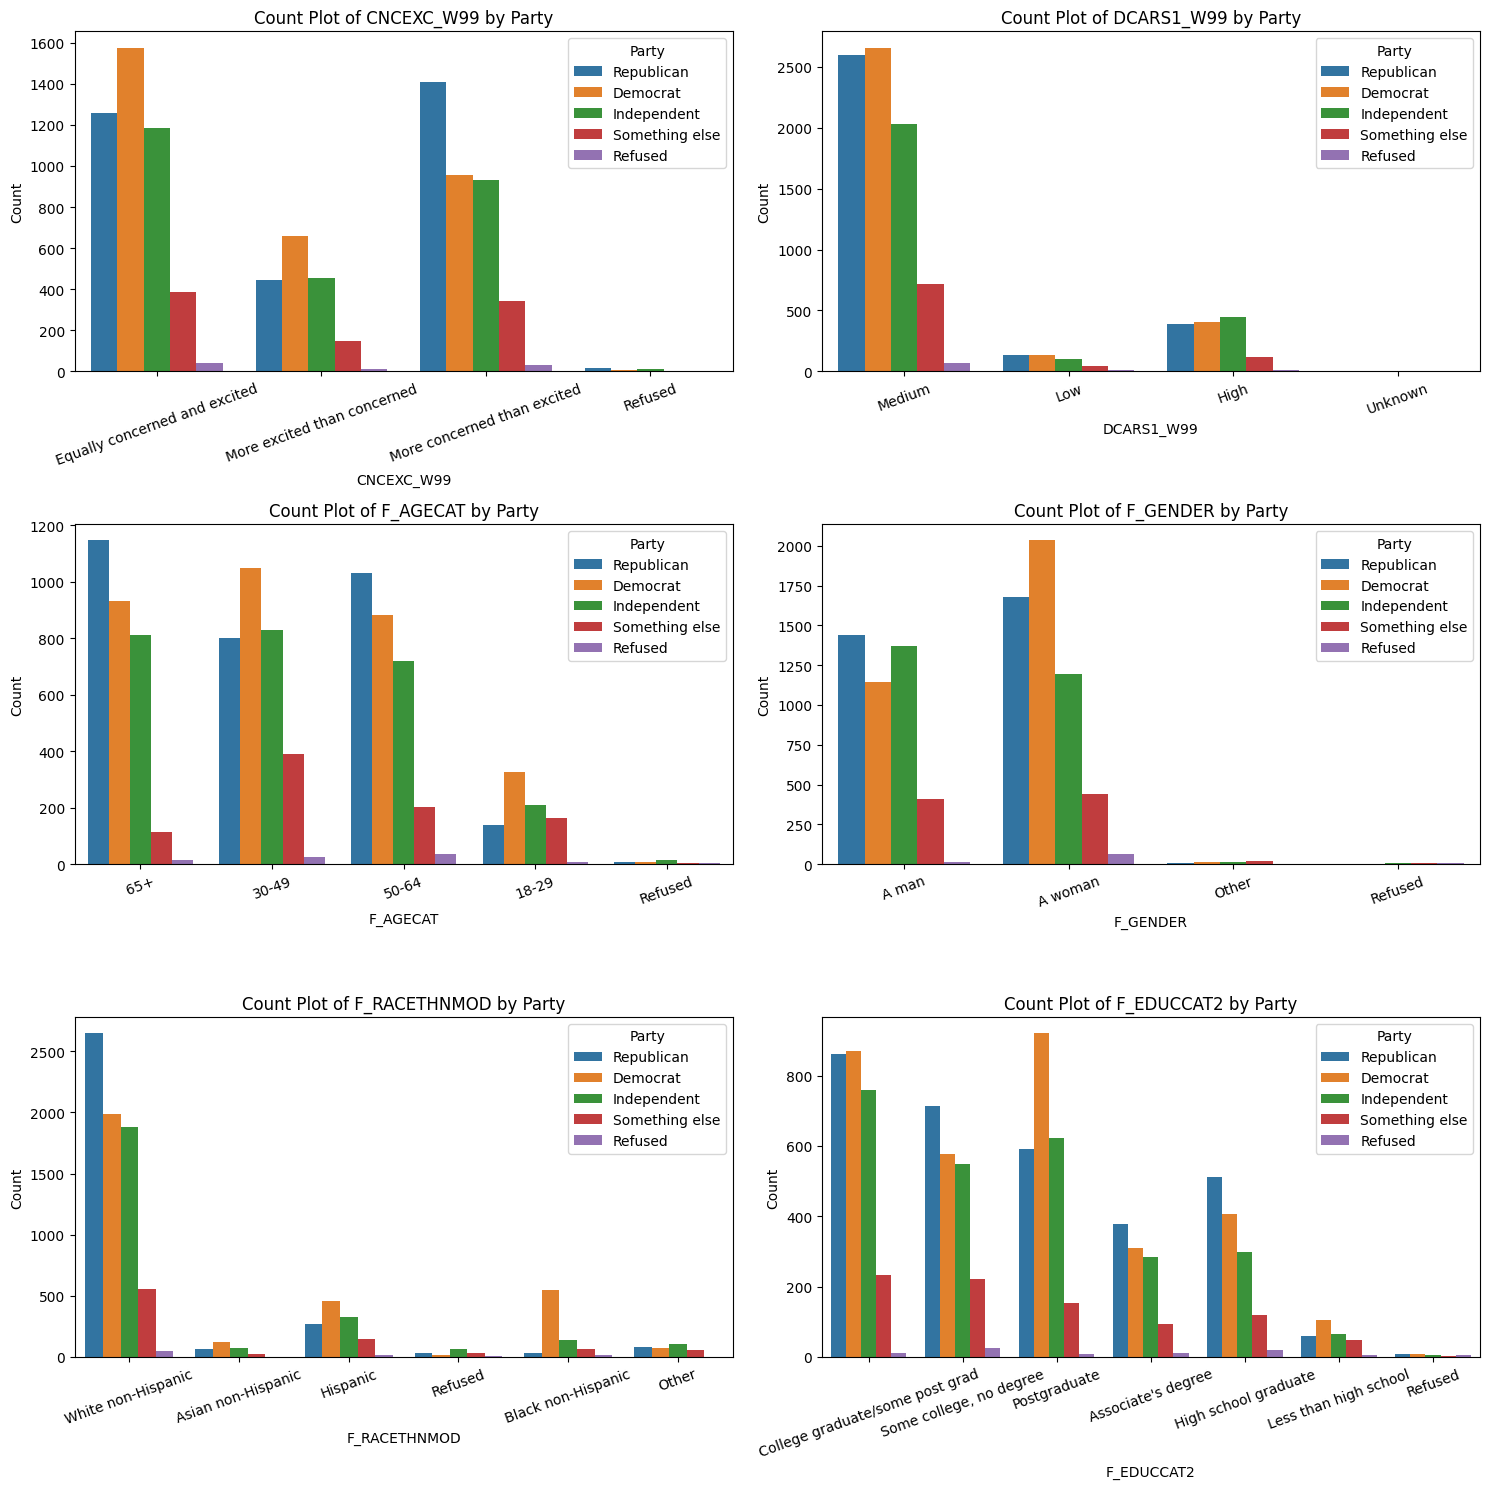

In [41]:


# Plotting with slanted x-axis labels, grouped by F_PARTY_FINAL
#(Taking a look to see which political party is more likely to be accepting of self driving cars and then going further to analyse the political parties and their demographics
# Variables to plot
variables_to_plot = ['CNCEXC_W99', 'DCARS1_W99','F_AGECAT', 'F_GENDER','F_RACETHNMOD','F_EDUCCAT2']


# Create a grid of subplots
n_vars = len(variables_to_plot)
n_cols = 2  # Number of columns
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotting with slanted x-axis labels, grouped by F_PARTY_FINAL
for ax, var in zip(axes, variables_to_plot):
    sns.countplot(data=df, x=var, hue='F_PARTY_FINAL', ax=ax)
    ax.set_title(f'Count Plot of {var} by Party')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Party')
    ax.tick_params(axis='x', rotation=20)  # Slant the labels on the x-axis
# Remove any empty subplots
for i in range(len(variables_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

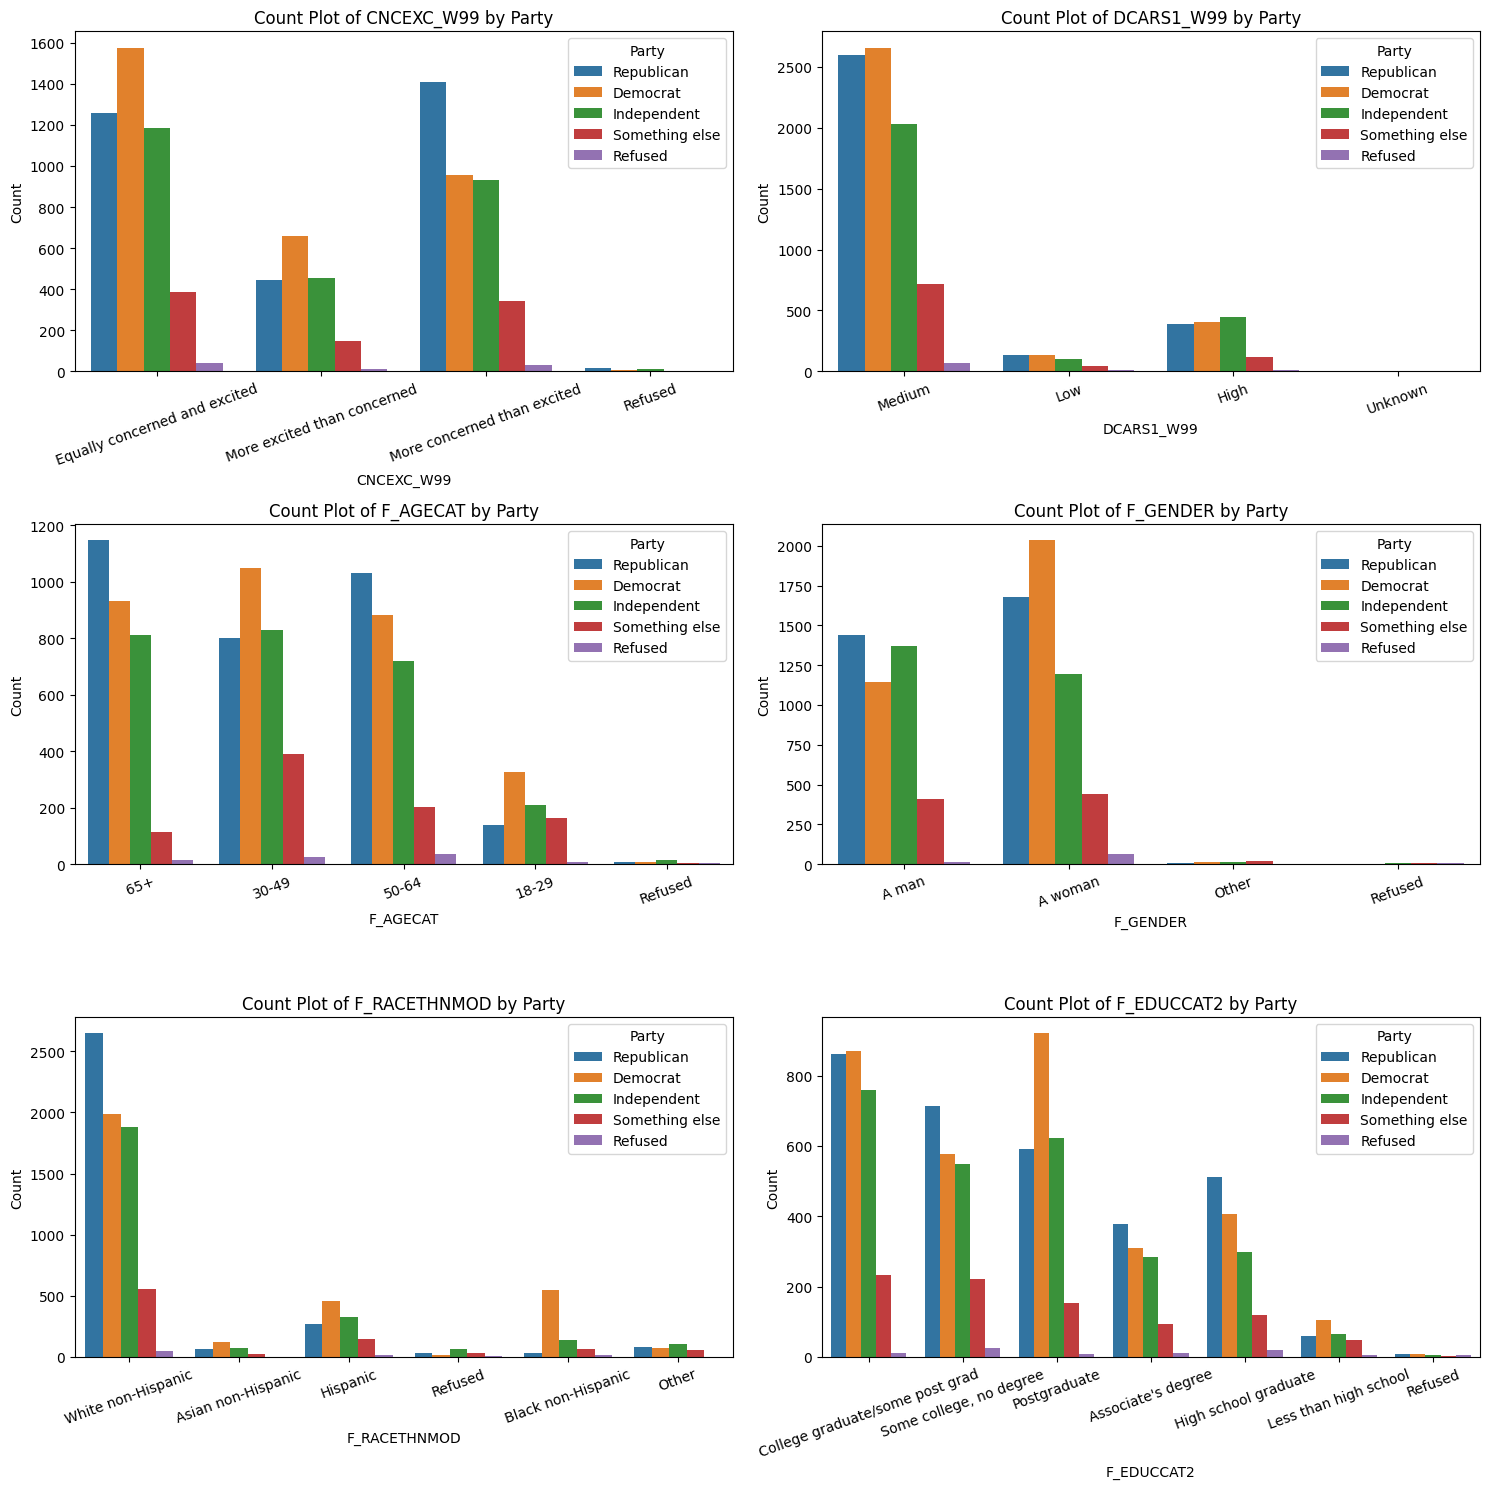

In [42]:


# Plotting with slanted x-axis labels, grouped by F_PARTY_FINAL
#(Taking a look to see which political party is more likely to be accepting of self driving cars and then going further to analyse the political parties and their demographics
# Variables to plot
variables_to_plot = ['CNCEXC_W99', 'DCARS1_W99','F_AGECAT', 'F_GENDER','F_RACETHNMOD','F_EDUCCAT2']


# Create a grid of subplots
n_vars = len(variables_to_plot)
n_cols = 2  # Number of columns
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotting with slanted x-axis labels, grouped by F_PARTY_FINAL
for ax, var in zip(axes, variables_to_plot):
    sns.countplot(data=df, x=var, hue='F_PARTY_FINAL', ax=ax)
    ax.set_title(f'Count Plot of {var} by Party')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Party')
    ax.tick_params(axis='x', rotation=20)  # Slant the labels on the x-axis
# Remove any empty subplots
for i in range(len(variables_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

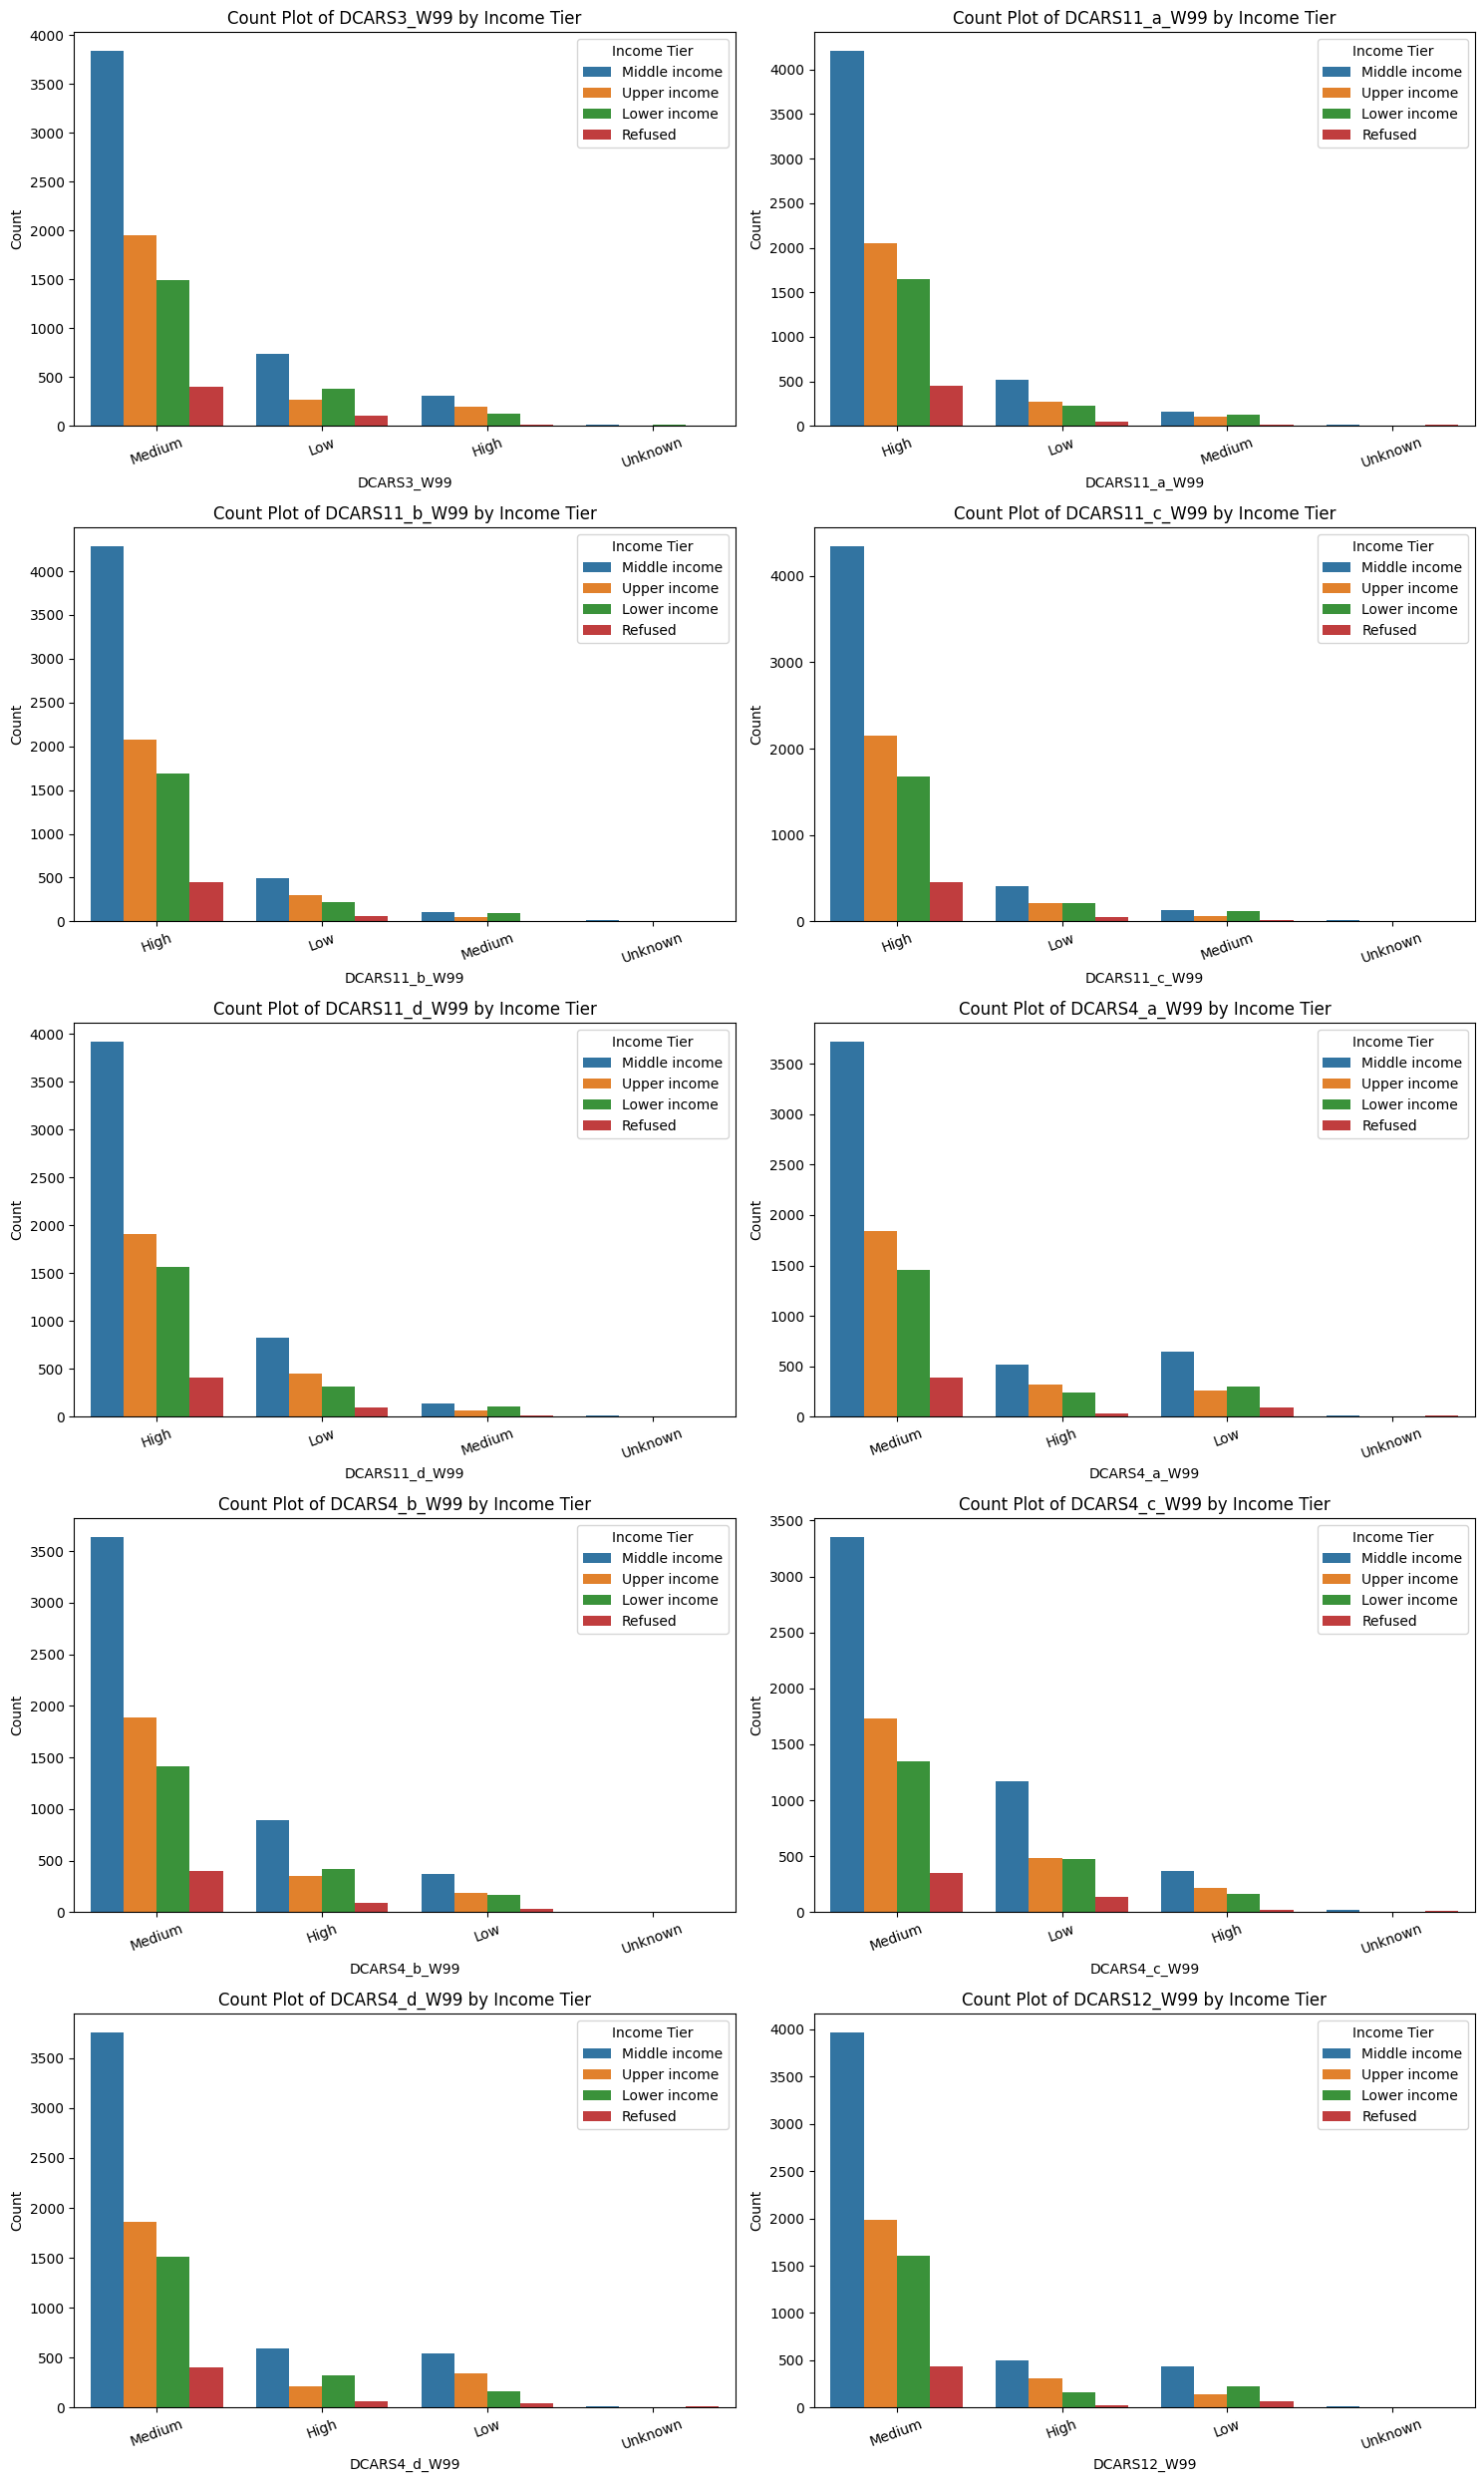

In [43]:
Concern_Excitement_SDC=['DCARS2_W99','DCARS6_W99','DCARS9_W99']
Comfortable_Sharing_Road_or_Driving_SDC=['DCARS3_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99','DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99','DCARS12_W99']
Knowledge_SDC=['DCARS1_W99', 'DCARS3_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS9_W99', 'DCARS10_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99', 'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99']
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

# Variables to plot
variables_to_plot = ['CNCEXC_W99', 'DCARS1_W99','F_AGECAT', 'F_GENDER','F_RACETHNMOD','F_EDUCCAT2']


# Create a grid of subplots
n_vars = len(Comfortable_Sharing_Road_or_Driving_SDC)
n_cols = 2  # Number of columns
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotting with slanted x-axis labels, grouped by F_INC_TIER2
for ax, var in zip(axes, Comfortable_Sharing_Road_or_Driving_SDC):
    sns.countplot(data=df, x=var, hue='F_INC_TIER2', ax=ax)
    ax.set_title(f'Count Plot of {var} by Income Tier')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Income Tier')
    ax.tick_params(axis='x', rotation=20)  # Slant the labels on the x-axis
# Remove any empty subplots
for i in range(len(Comfortable_Sharing_Road_or_Driving_SDC), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

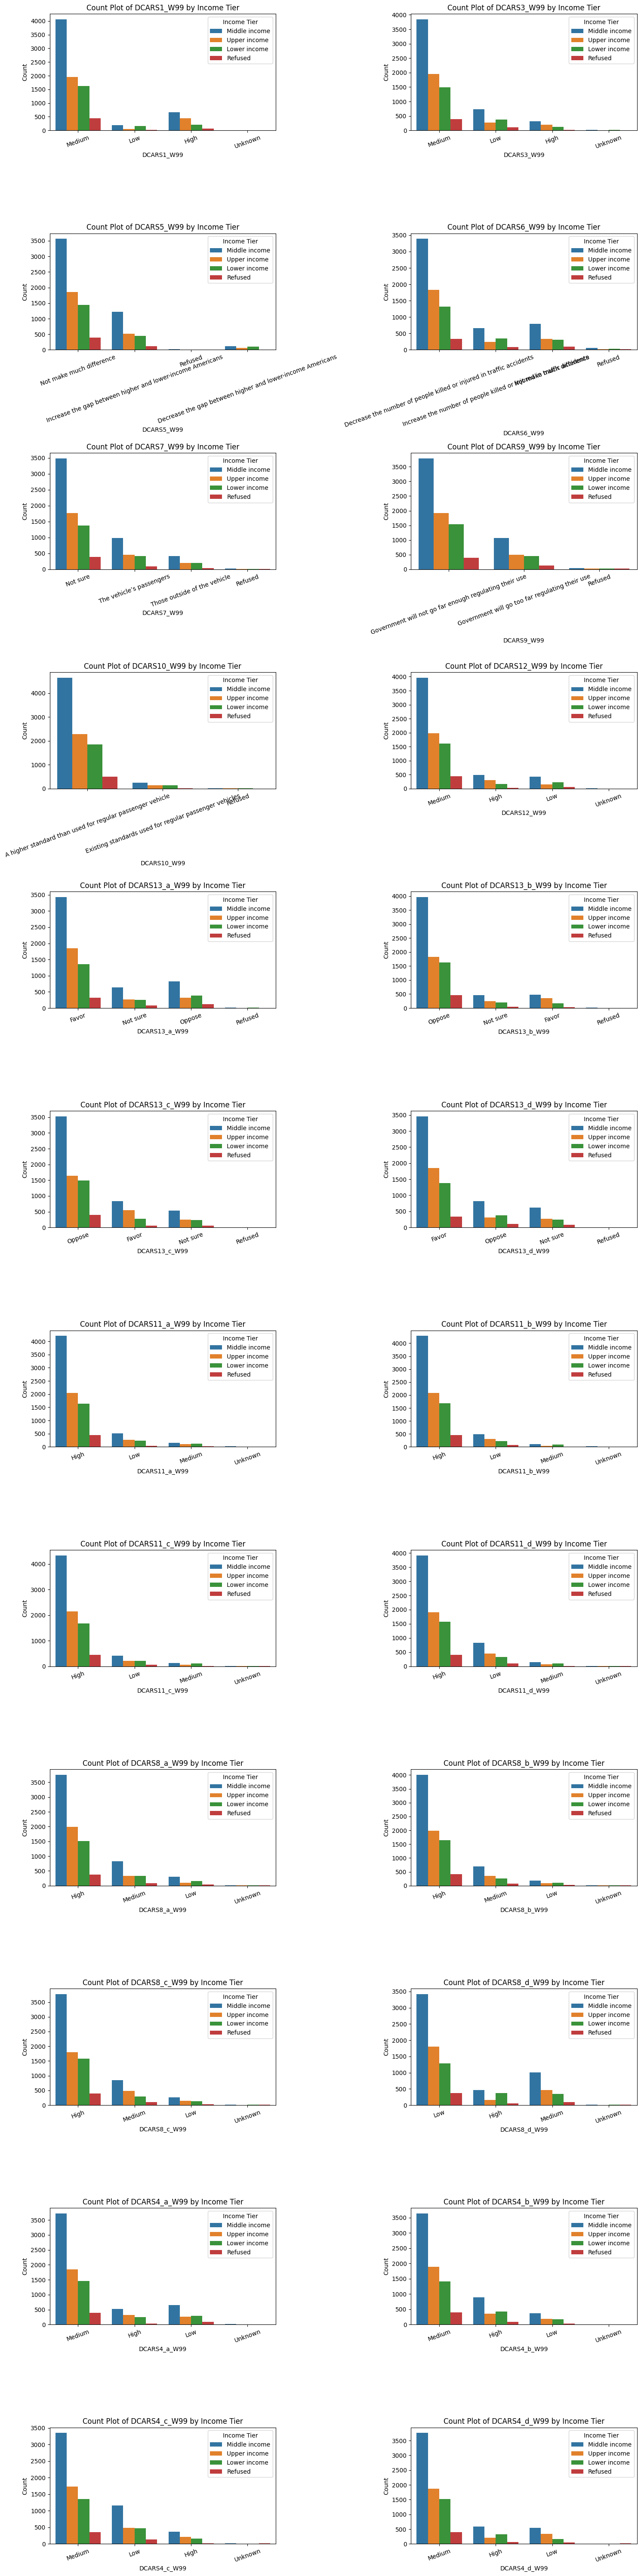

In [44]:
Concern_Excitement_SDC=['DCARS2_W99','DCARS6_W99','DCARS9_W99']
Comfortable_Sharing_Road_or_Driving_SDC=['DCARS3_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99','DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99','DCARS12_W99']
Knowledge_SDC=['DCARS1_W99', 'DCARS3_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS9_W99', 'DCARS10_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99', 'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99']
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

# Variables to plot
variables_to_plot = ['CNCEXC_W99', 'DCARS1_W99','F_AGECAT', 'F_GENDER','F_RACETHNMOD','F_EDUCCAT2']


# Create a grid of subplots
n_vars = len(Knowledge_SDC)
n_cols = 2  # Number of columns
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotting with slanted x-axis labels, grouped by F_INC_TIER2
for ax, var in zip(axes, Knowledge_SDC):
    sns.countplot(data=df, x=var, hue='F_INC_TIER2', ax=ax)
    ax.set_title(f'Count Plot of {var} by Income Tier')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Income Tier')
    ax.tick_params(axis='x', rotation=20)  # Slant the labels on the x-axis
# Remove any empty subplots
for i in range(len(Knowledge_SDC), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

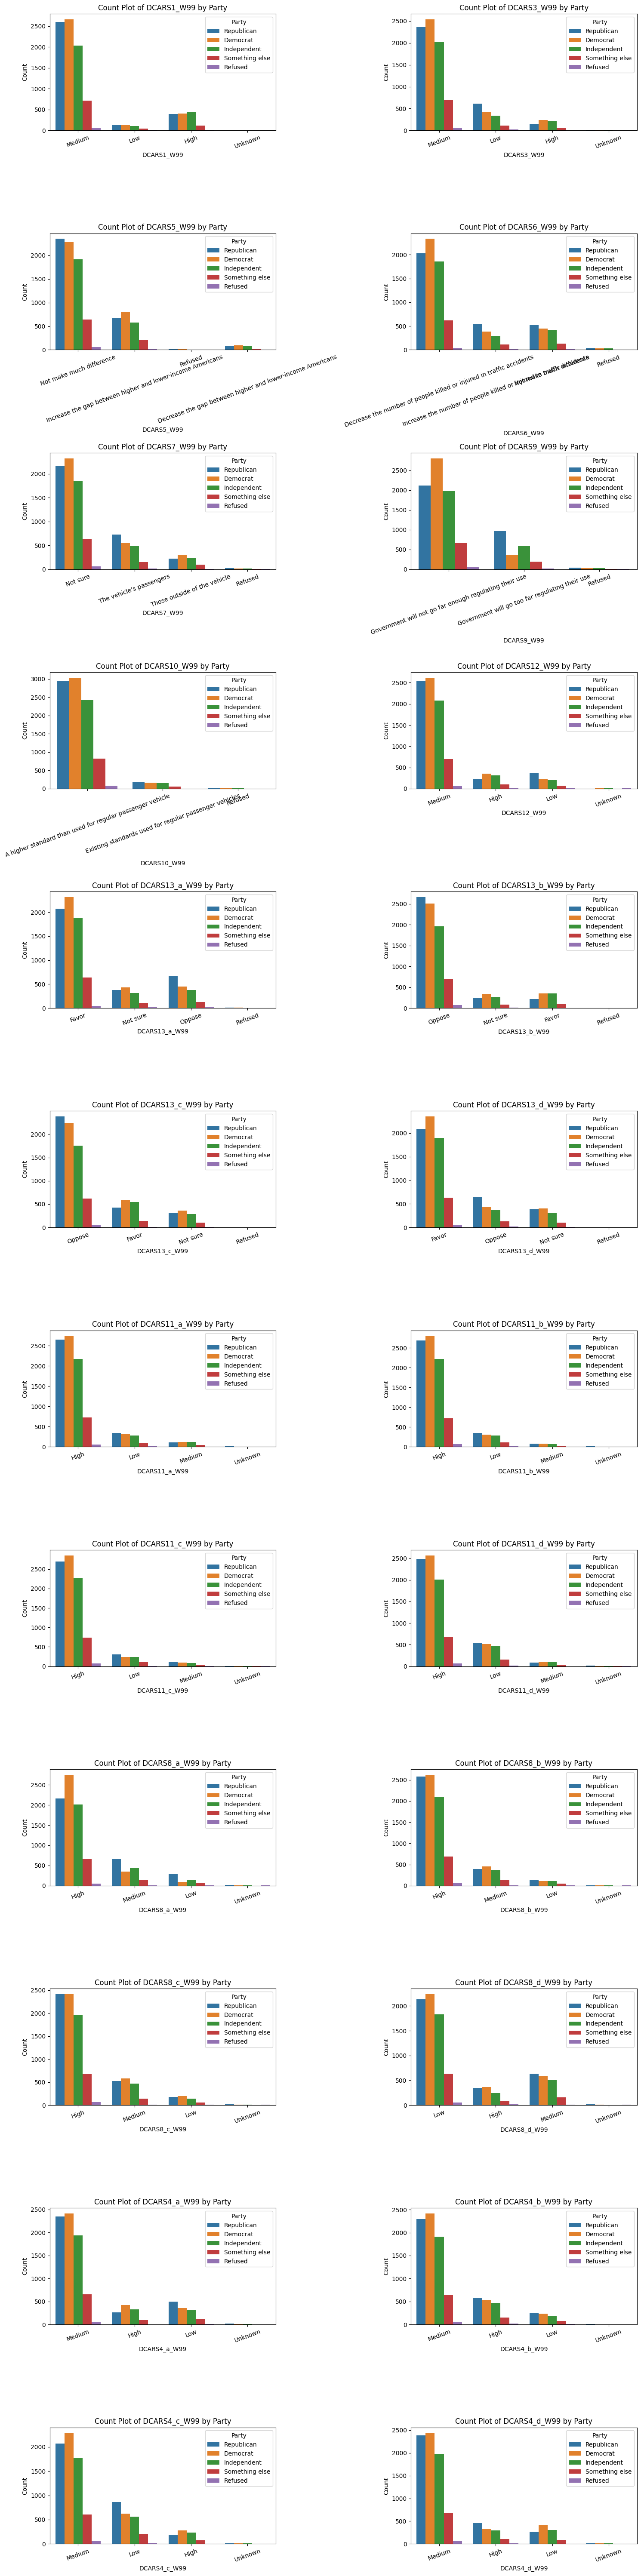

In [45]:
Concern_Excitement_SDC=['DCARS2_W99','DCARS6_W99','DCARS9_W99']
Comfortable_Sharing_Road_or_Driving_SDC=['DCARS3_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99','DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99','DCARS12_W99']
Knowledge_SDC=['DCARS1_W99', 'DCARS3_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS9_W99', 'DCARS10_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99', 'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99']
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

# Variables to plot
variables_to_plot = ['CNCEXC_W99', 'DCARS1_W99','F_AGECAT', 'F_GENDER','F_RACETHNMOD','F_EDUCCAT2']


# Create a grid of subplots
n_vars = len(Knowledge_SDC)
n_cols = 2  # Number of columns
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotting with slanted x-axis labels, grouped by F_PARTY_FINAL
for ax, var in zip(axes, Knowledge_SDC):
    sns.countplot(data=df, x=var, hue='F_PARTY_FINAL', ax=ax)
    ax.set_title(f'Count Plot of {var} by Party')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Party')
    ax.tick_params(axis='x', rotation=20)  # Slant the labels on the x-axis
# Remove any empty subplots
for i in range(len(Knowledge_SDC), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

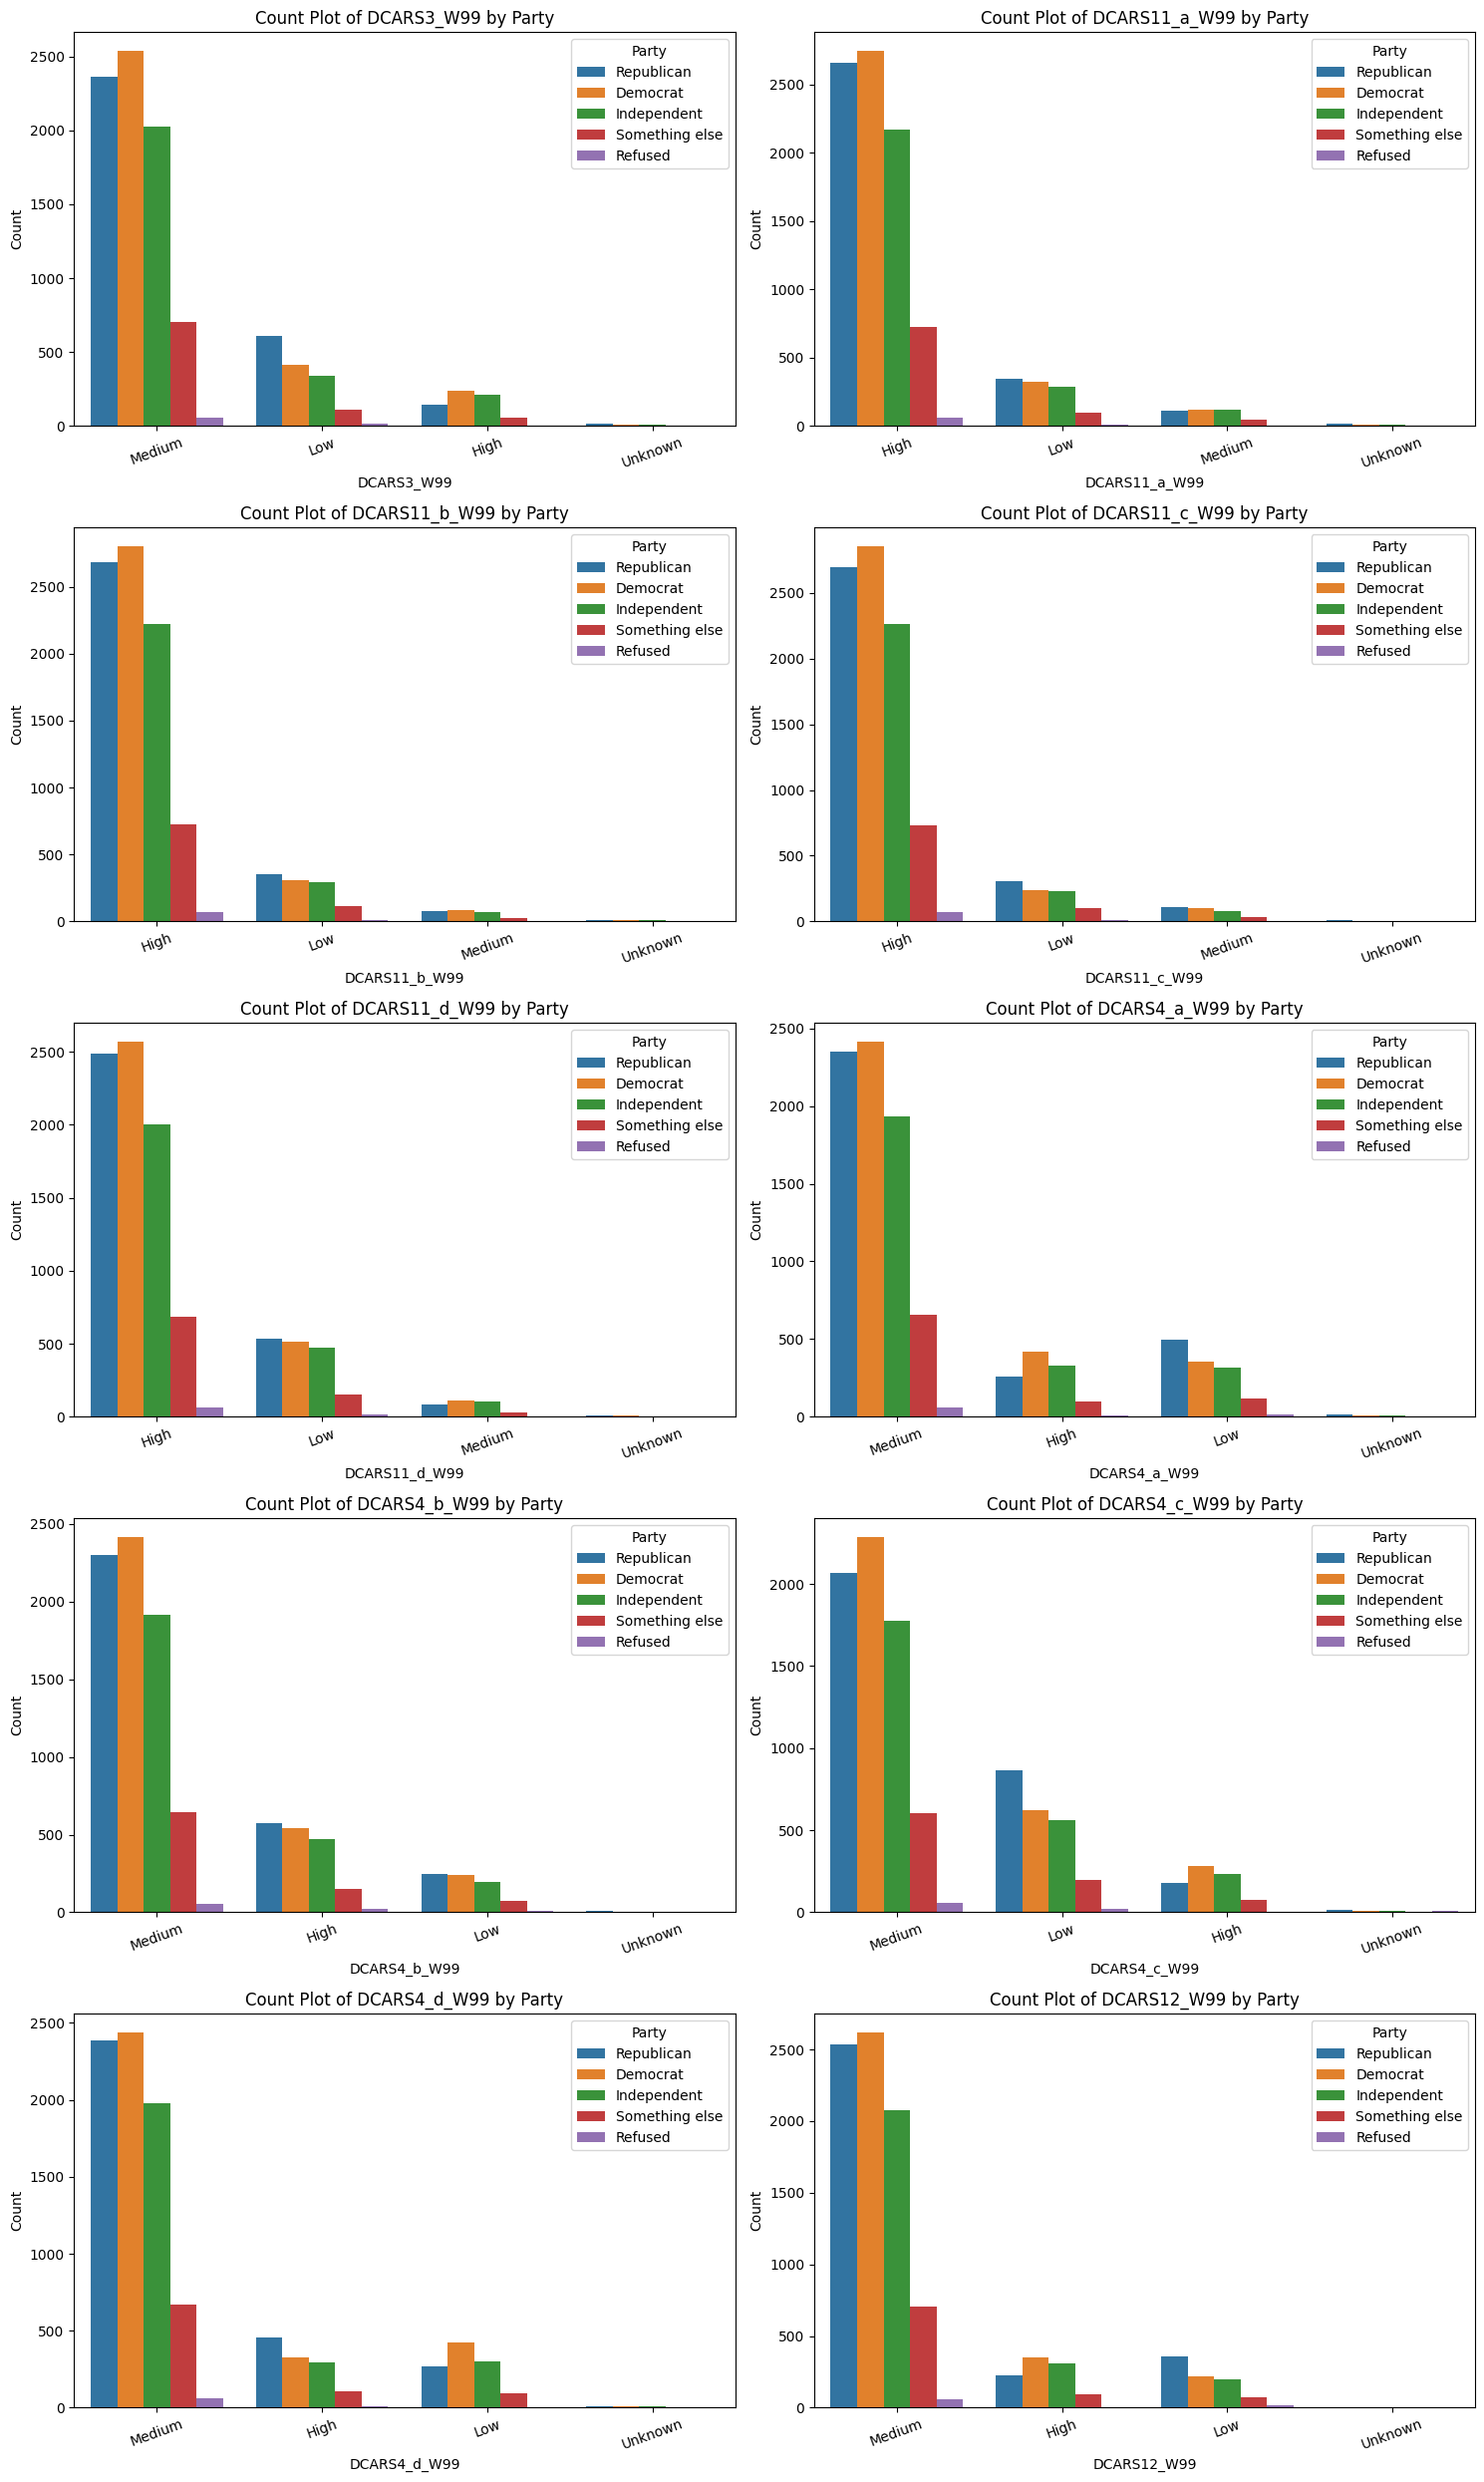

In [46]:
Concern_Excitement_SDC=['DCARS2_W99','DCARS6_W99','DCARS9_W99']
Comfortable_Sharing_Road_or_Driving_SDC=['DCARS3_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99','DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99','DCARS12_W99']
Knowledge_SDC=['DCARS1_W99', 'DCARS3_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS9_W99', 'DCARS10_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99', 'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99']
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

# Variables to plot
variables_to_plot = ['CNCEXC_W99', 'DCARS1_W99','F_AGECAT', 'F_GENDER','F_RACETHNMOD','F_EDUCCAT2']


# Create a grid of subplots
n_vars = len(Comfortable_Sharing_Road_or_Driving_SDC)
n_cols = 2  # Number of columns
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotting with slanted x-axis labels, grouped by F_PARTY_FINAL
for ax, var in zip(axes, Comfortable_Sharing_Road_or_Driving_SDC):
    sns.countplot(data=df, x=var, hue='F_PARTY_FINAL', ax=ax)
    ax.set_title(f'Count Plot of {var} by Party')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Party')
    ax.tick_params(axis='x', rotation=20)  # Slant the labels on the x-axis
# Remove any empty subplots
for i in range(len(Comfortable_Sharing_Road_or_Driving_SDC), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

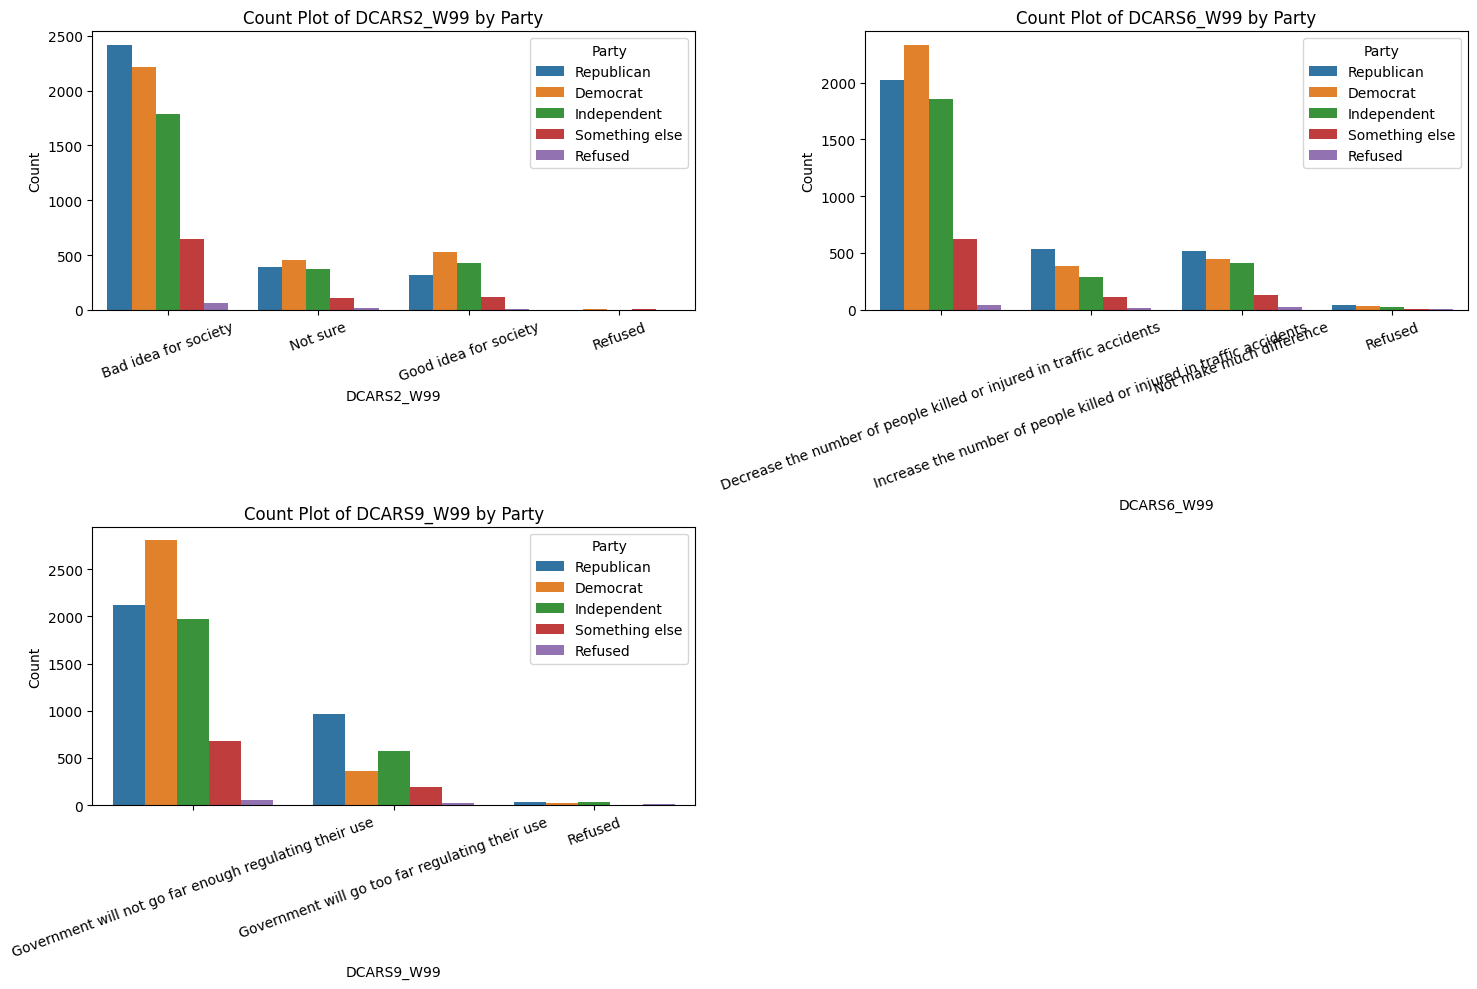

In [47]:
Concern_Excitement_SDC=['DCARS2_W99','DCARS6_W99','DCARS9_W99']
Comfortable_Sharing_Road_or_Driving_SDC=['DCARS3_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99','DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99','DCARS12_W99']
Knowledge_SDC=['DCARS1_W99', 'DCARS3_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS9_W99', 'DCARS10_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99', 'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99']
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

# Variables to plot
variables_to_plot = ['CNCEXC_W99', 'DCARS1_W99','F_AGECAT', 'F_GENDER','F_RACETHNMOD','F_EDUCCAT2']


# Create a grid of subplots
n_vars = len(Concern_Excitement_SDC)
n_cols = 2  # Number of columns
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotting with slanted x-axis labels, grouped by F_PARTY_FINAL
for ax, var in zip(axes, Concern_Excitement_SDC):
    sns.countplot(data=df, x=var, hue='F_PARTY_FINAL', ax=ax)
    ax.set_title(f'Count Plot of {var} by Party')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Party')
    ax.tick_params(axis='x', rotation=20)  # Slant the labels on the x-axis
# Remove any empty subplots
for i in range(len(Concern_Excitement_SDC), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

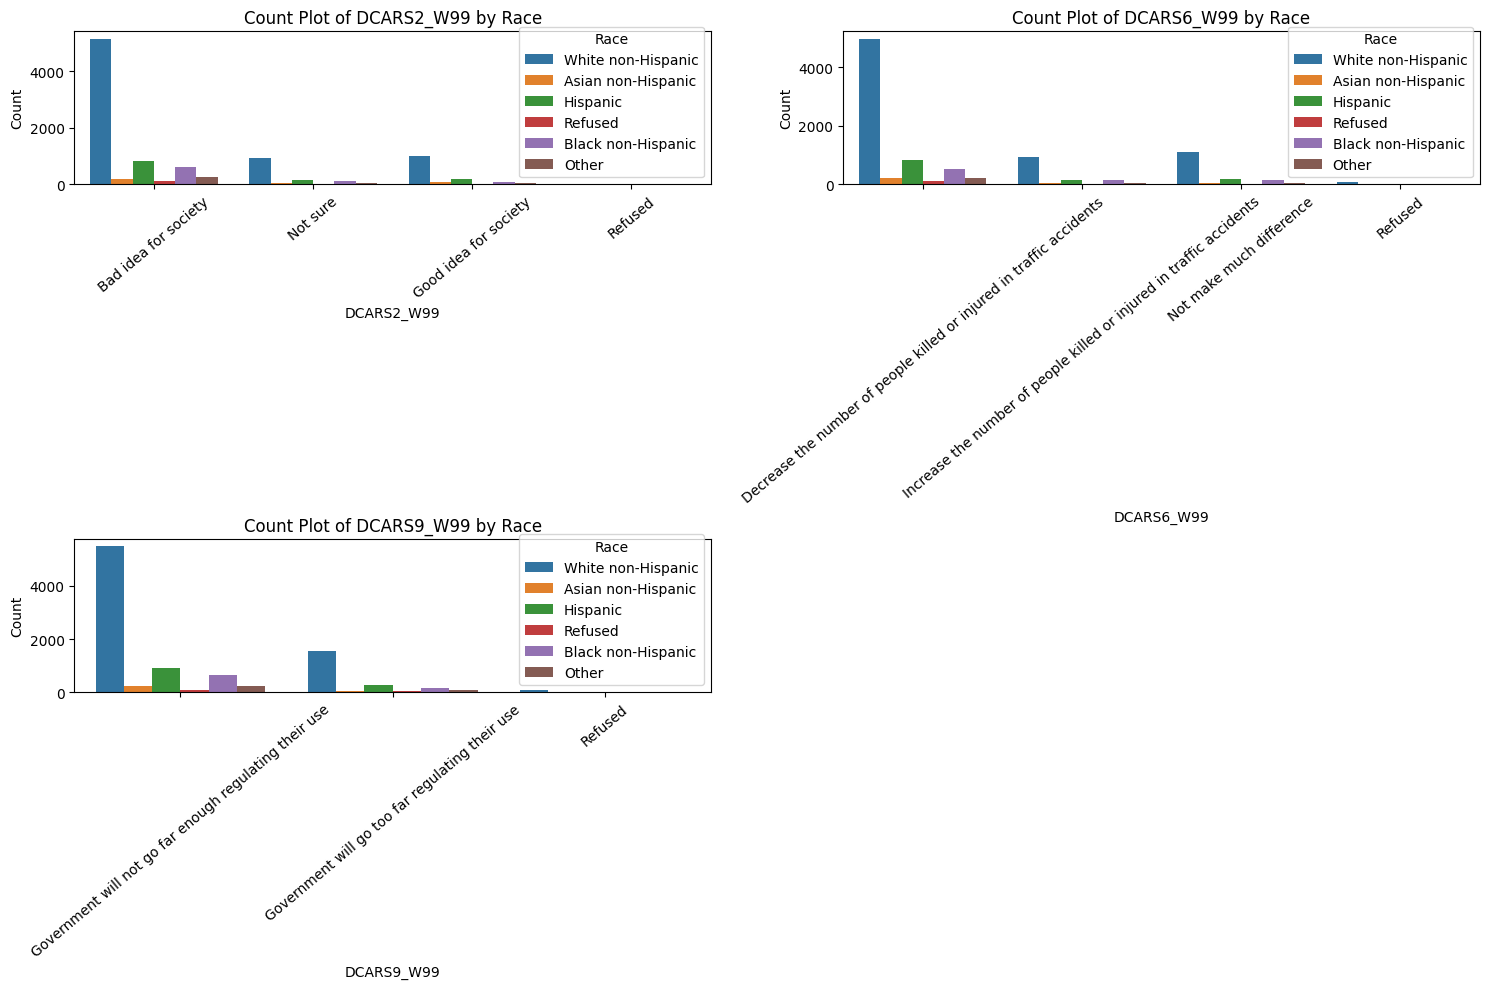

In [48]:
Concern_Excitement_SDC=['DCARS2_W99','DCARS6_W99','DCARS9_W99']
Comfortable_Sharing_Road_or_Driving_SDC=['DCARS3_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99','DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99','DCARS12_W99']
Knowledge_SDC=['DCARS1_W99', 'DCARS3_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS9_W99', 'DCARS10_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99', 'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99']
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

# Variables to plot
variables_to_plot = ['CNCEXC_W99', 'DCARS1_W99','F_AGECAT', 'F_GENDER','F_RACETHNMOD','F_EDUCCAT2']


# Create a grid of subplots
n_vars = len(Concern_Excitement_SDC)
n_cols = 2  # Number of columns
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotting with slanted x-axis labels, grouped by F_PARTY_FINAL
for ax, var in zip(axes, Concern_Excitement_SDC):
    sns.countplot(data=df, x=var, hue='F_RACETHNMOD', ax=ax)
    ax.set_title(f'Count Plot of {var} by Race')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Race')
    ax.tick_params(axis='x', rotation=40)  # Slant the labels on the x-axis
# Remove any empty subplots
for i in range(len(Concern_Excitement_SDC), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

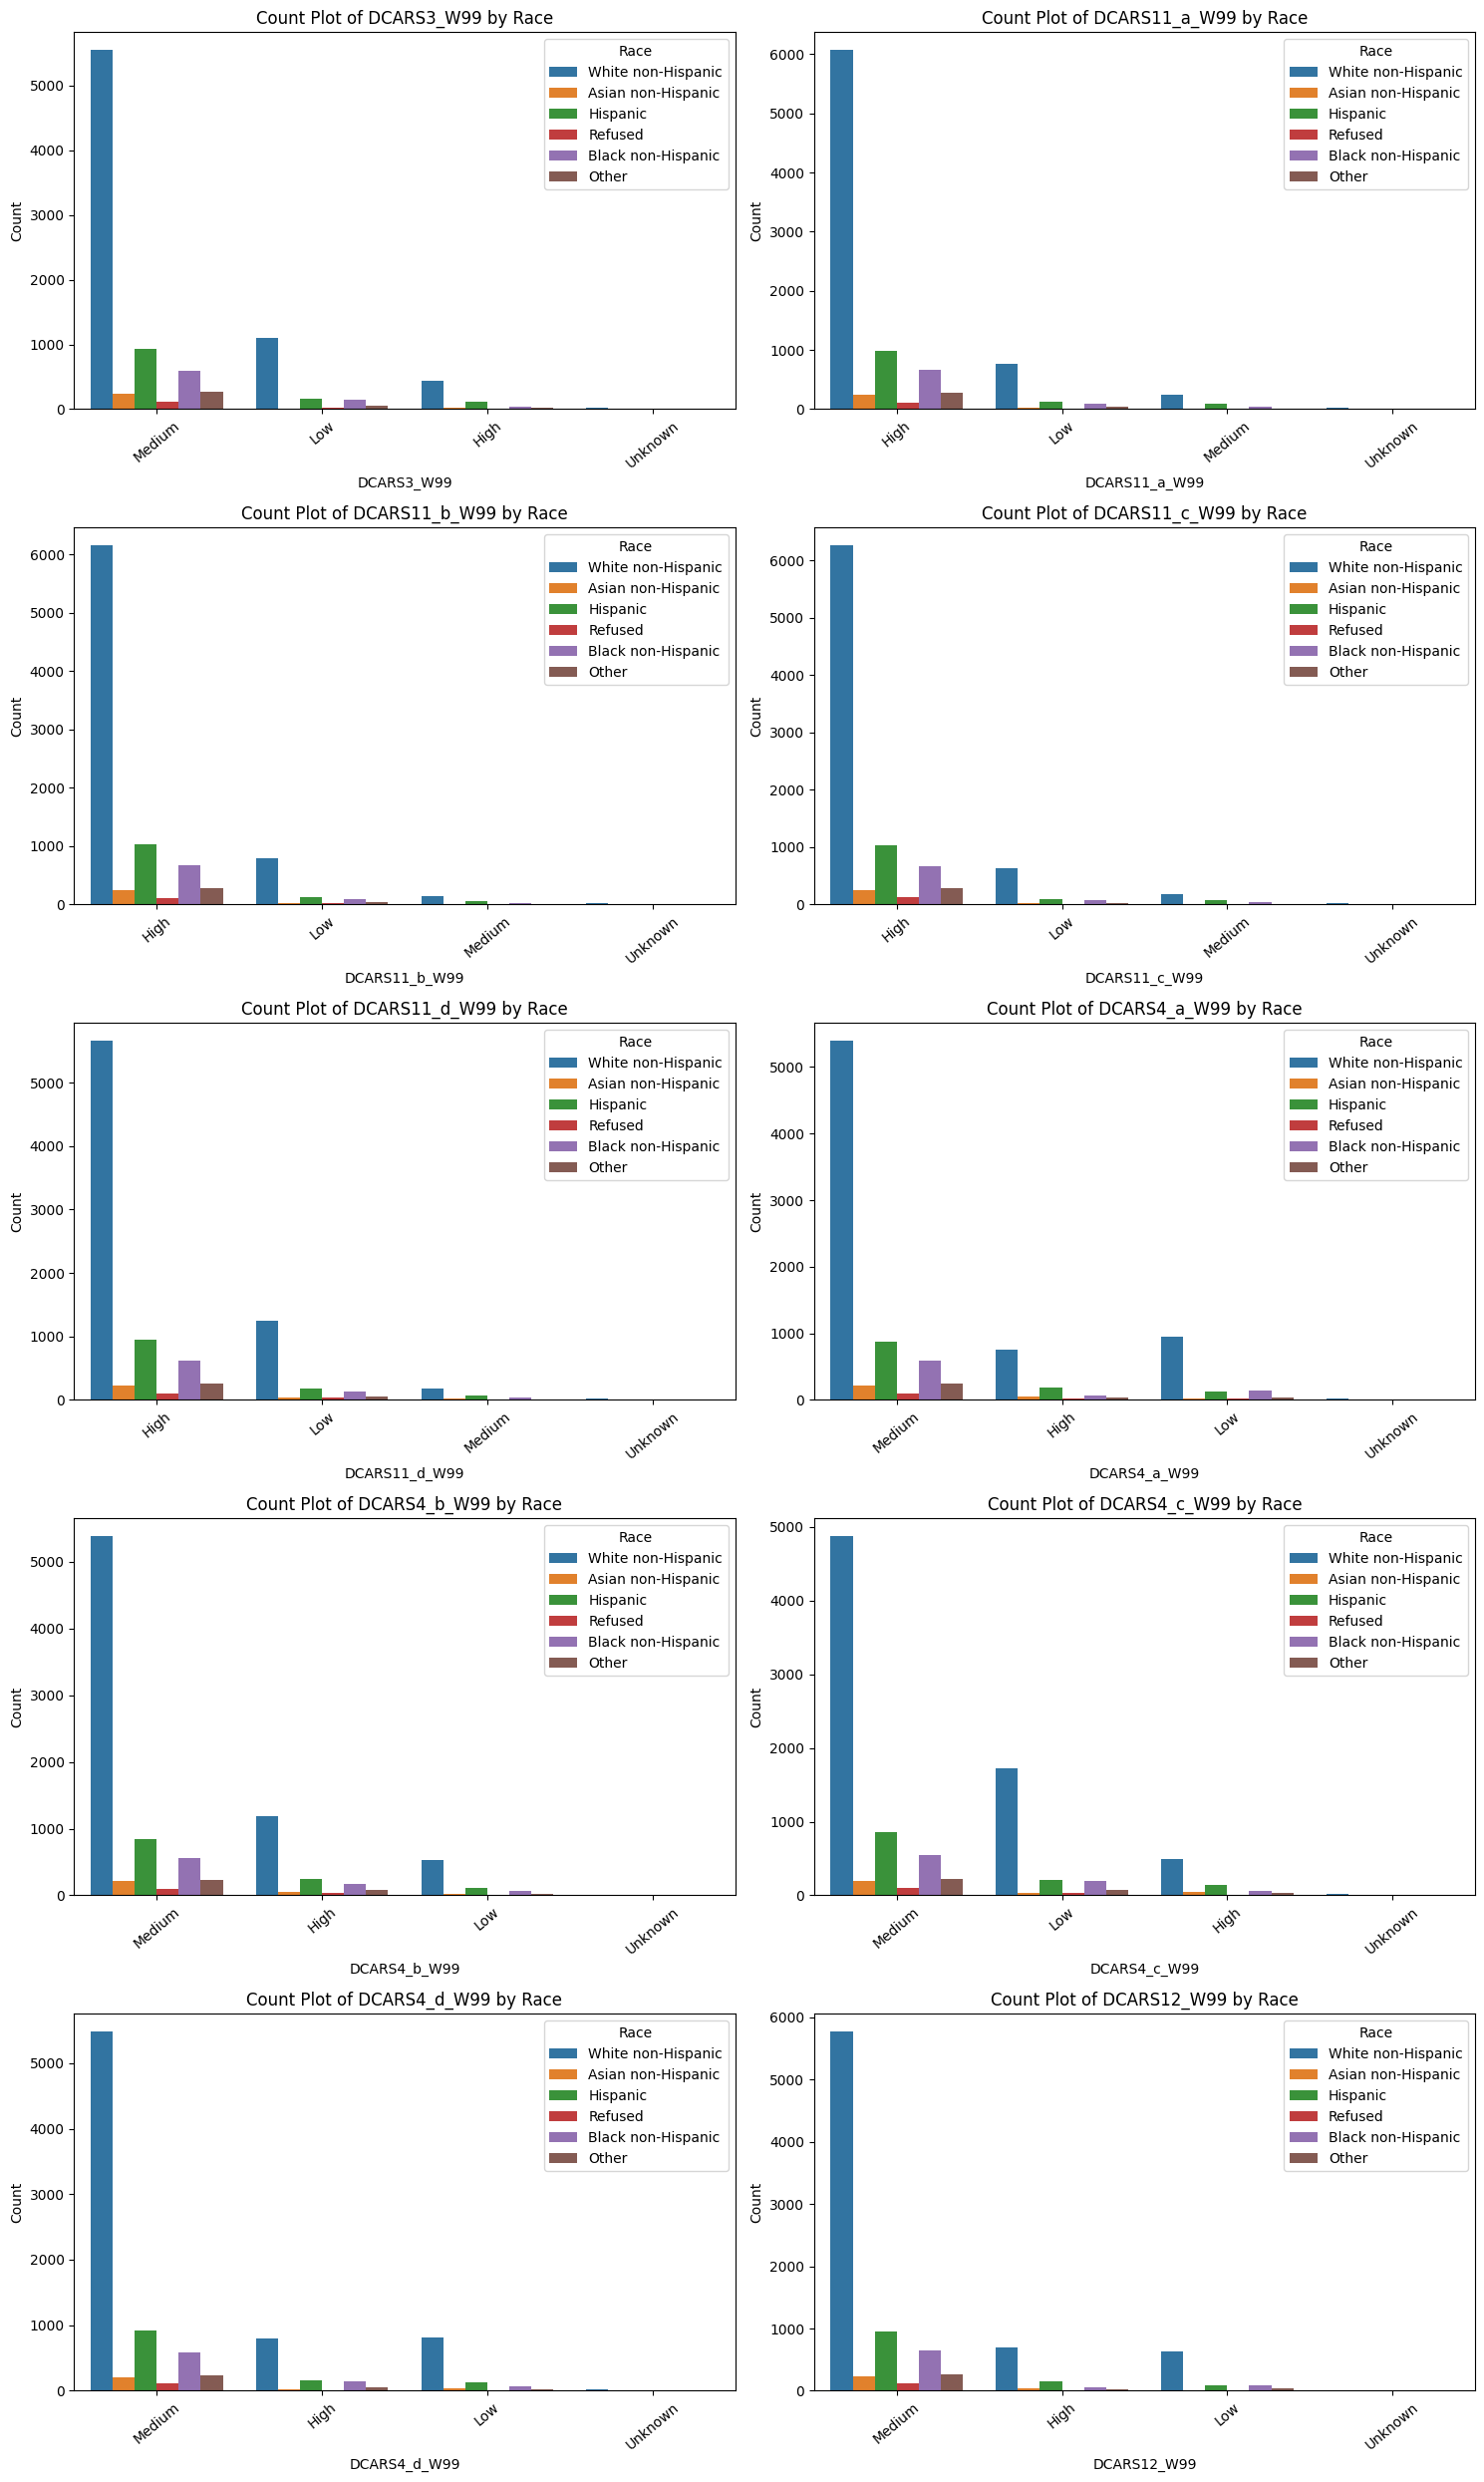

In [49]:
Concern_Excitement_SDC=['DCARS2_W99','DCARS6_W99','DCARS9_W99']
Comfortable_Sharing_Road_or_Driving_SDC=['DCARS3_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99','DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99','DCARS12_W99']
Knowledge_SDC=['DCARS1_W99', 'DCARS3_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS9_W99', 'DCARS10_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99', 'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99']
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

# Variables to plot
variables_to_plot = ['CNCEXC_W99', 'DCARS1_W99','F_AGECAT', 'F_GENDER','F_RACETHNMOD','F_EDUCCAT2']


# Create a grid of subplots
n_vars = len(Comfortable_Sharing_Road_or_Driving_SDC)
n_cols = 2  # Number of columns
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotting with slanted x-axis labels, grouped by F_PARTY_FINAL
for ax, var in zip(axes, Comfortable_Sharing_Road_or_Driving_SDC):
    sns.countplot(data=df, x=var, hue='F_RACETHNMOD', ax=ax)
    ax.set_title(f'Count Plot of {var} by Race')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Race')
    ax.tick_params(axis='x', rotation=40)  # Slant the labels on the x-axis
# Remove any empty subplots
for i in range(len(Comfortable_Sharing_Road_or_Driving_SDC), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

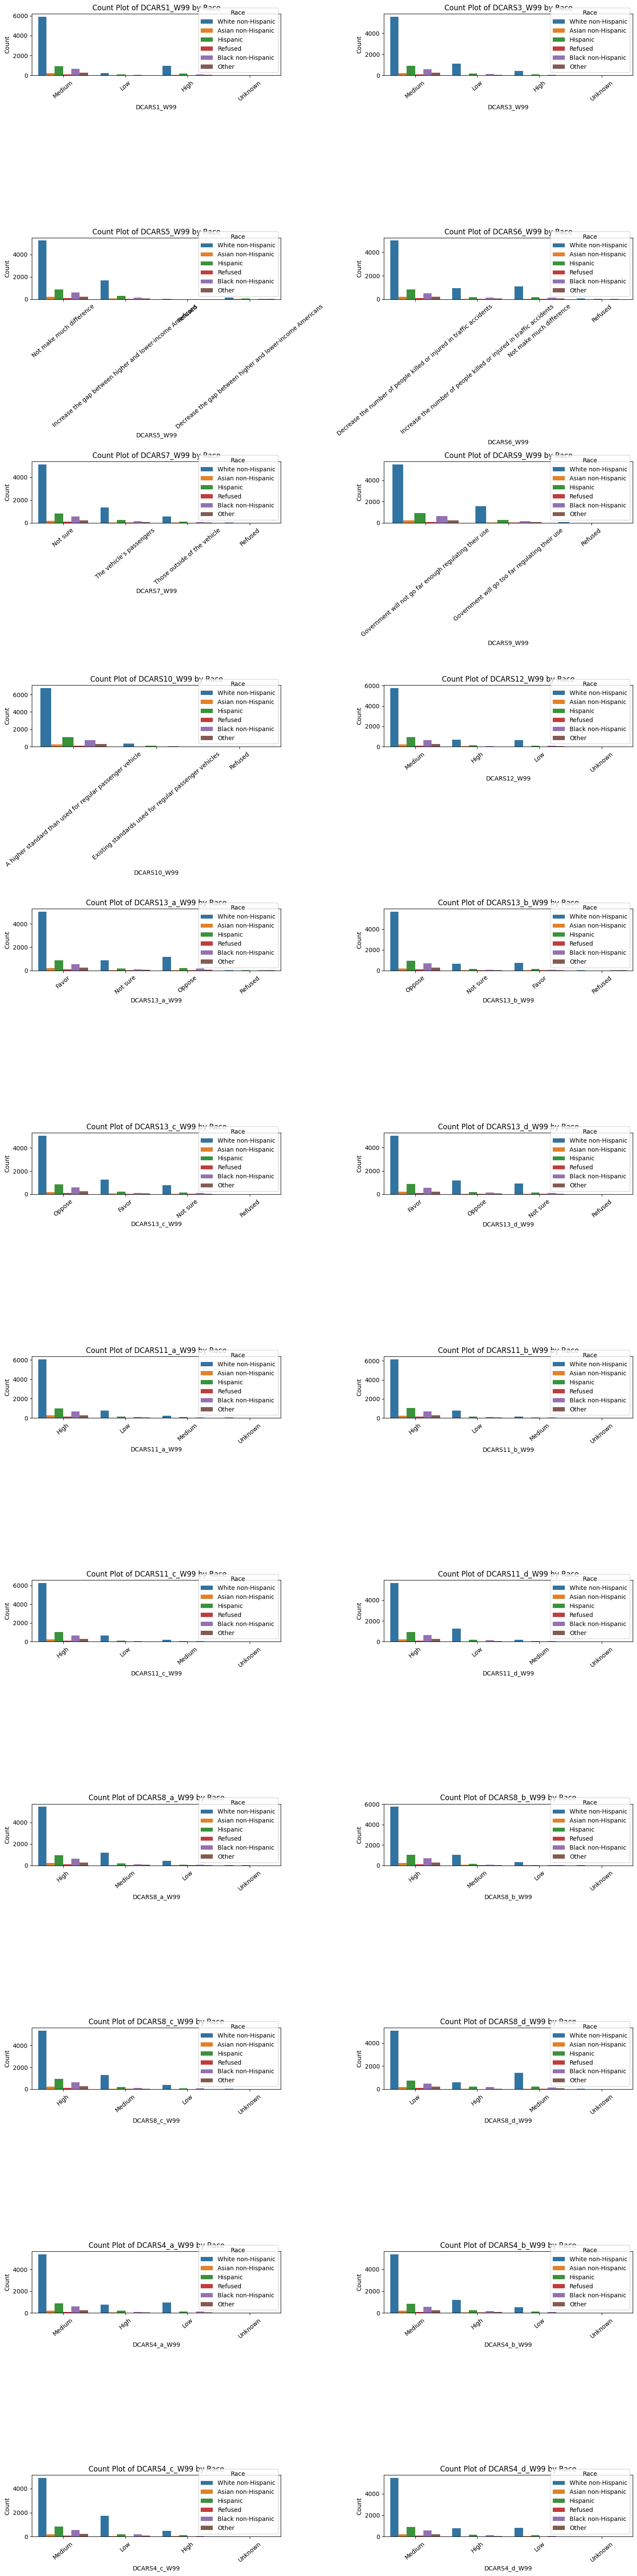

In [50]:
Concern_Excitement_SDC=['DCARS2_W99','DCARS6_W99','DCARS9_W99']
Comfortable_Sharing_Road_or_Driving_SDC=['DCARS3_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99','DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99','DCARS12_W99']
Knowledge_SDC=['DCARS1_W99', 'DCARS3_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS9_W99', 'DCARS10_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99','DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99', 'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99']
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

# Variables to plot
variables_to_plot = ['CNCEXC_W99', 'DCARS1_W99','F_AGECAT', 'F_GENDER','F_RACETHNMOD','F_EDUCCAT2']


# Create a grid of subplots
n_vars = len(Knowledge_SDC)
n_cols = 2  # Number of columns
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotting with slanted x-axis labels, grouped by F_PARTY_FINAL
for ax, var in zip(axes, Knowledge_SDC):
    sns.countplot(data=df, x=var, hue='F_RACETHNMOD', ax=ax)
    ax.set_title(f'Count Plot of {var} by Race')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Race')
    ax.tick_params(axis='x', rotation=40)  # Slant the labels on the x-axis
# Remove any empty subplots
for i in range(len(Knowledge_SDC), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

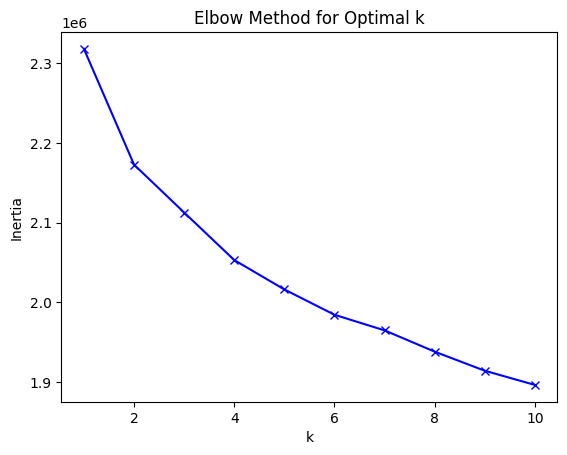

Cluster 0:
TECH1_W99                                             Mostly positive
CNCEXC_W99                              Equally concerned and excited
EXCITEOE_W99_OE1                           Makes life, society better
EXCITEOE_W99_OE2                           Saves time, more efficient
EXCITEOE_W99_OE3                           Makes life, society better
ALGFAIR_W99                                                  Possible
DISCRIM1_a_W99                                              Very well
DISCRIM1_b_W99                                               Not sure
DISCRIM1_c_W99                                               Not sure
DISCRIM1_d_W99                                               Not sure
DISCRIM1_e_W99                                          Somewhat well
DISCRIM1_f_W99                                          Somewhat well
F_AGECAT                                                        30-49
F_GENDER                                                        A man
F_EDUCCAT

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_2592/1268805541.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Cluster'] = cluster_labels


In [51]:
df.set_index('QKEY', inplace=True)

# Select relevant columns for clustering
relevant_columns = [
    'TECH1_W99', 'CNCEXC_W99', 'EXCITEOE_W99_OE1', 'EXCITEOE_W99_OE2', 'EXCITEOE_W99_OE3', 'ALGFAIR_W99', 'DISCRIM1_a_W99', 'DISCRIM1_b_W99', 'DISCRIM1_c_W99', 'DISCRIM1_d_W99', 'DISCRIM1_e_W99', 'DISCRIM1_f_W99', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT2', 'F_RACETHNMOD', 'F_CITIZEN', 'DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99', 'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99', 'DCARS10_W99', 'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99', 'F_MARITAL', 'F_RELIG', 'F_PARTY_FINAL', 'F_REG', 'F_INC_TIER2'
]
data_df = df[relevant_columns]

# Separate numerical and categorical columns
numerical_columns = []
categorical_columns = [col for col in data_df.columns if col not in numerical_columns]

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data_df_imputed = pd.DataFrame(imputer.fit_transform(data_df), columns=data_df.columns, index=data_df.index)

# One-hot encode categorical variables
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(data_df_imputed[categorical_columns])

# Create a DataFrame with the one-hot encoded variables
onehot_encoded_df = pd.DataFrame(
    onehot_encoded.toarray(), 
    columns=onehot_encoder.get_feature_names_out(categorical_columns),
    index=data_df_imputed.index
)

# Combine numerical and one-hot encoded data
data_df_final = pd.concat([data_df_imputed[numerical_columns], onehot_encoded_df], axis=1)

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df_final)

# Determine the optimal number of clusters using the elbow method
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Run K-means clustering with the optimal number of clusters
optimal_k = 3  # Replace with the value determined from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataframe
data_df['Cluster'] = cluster_labels

# Analyze cluster characteristics
for cluster in range(optimal_k):
    print(f"Cluster {cluster}:")
    print(data_df[data_df['Cluster'] == cluster].mode().iloc[0])
    print("\n")

In [52]:
#check the accuracy of the clustering
data_df['Cluster'].value_counts() / data_df['Cluster'].shape[0]

Cluster
1    0.507299
2    0.313362
0    0.179339
Name: count, dtype: float64

In [54]:
import plotly.express as px

# Create a new dataframe with the count of each combination
treemap_data = data_df.groupby(['EXCITEOE_W99_OE1', 'F_GENDER', 'F_PARTY_FINAL']).size().reset_index(name='count')

# Remove rows with missing values
treemap_data = treemap_data.dropna()

# Create the treemap
fig = px.treemap(treemap_data, 
                 path=['EXCITEOE_W99_OE1', 'F_GENDER', 'F_PARTY_FINAL'], 
                 values='count',
                 color='count',
                 color_continuous_scale='RdBu',
                 title='Treemap of EXCITEOE_W99_OE1, Gender, and Party Affiliation')

# Update layout for better readability
fig.update_traces(textinfo="label+value+percent parent")

# Show the plot
fig.show()

ModuleNotFoundError: No module named 'plotly'

Text(0.5, 0, 'Age Category - Gender - Party')

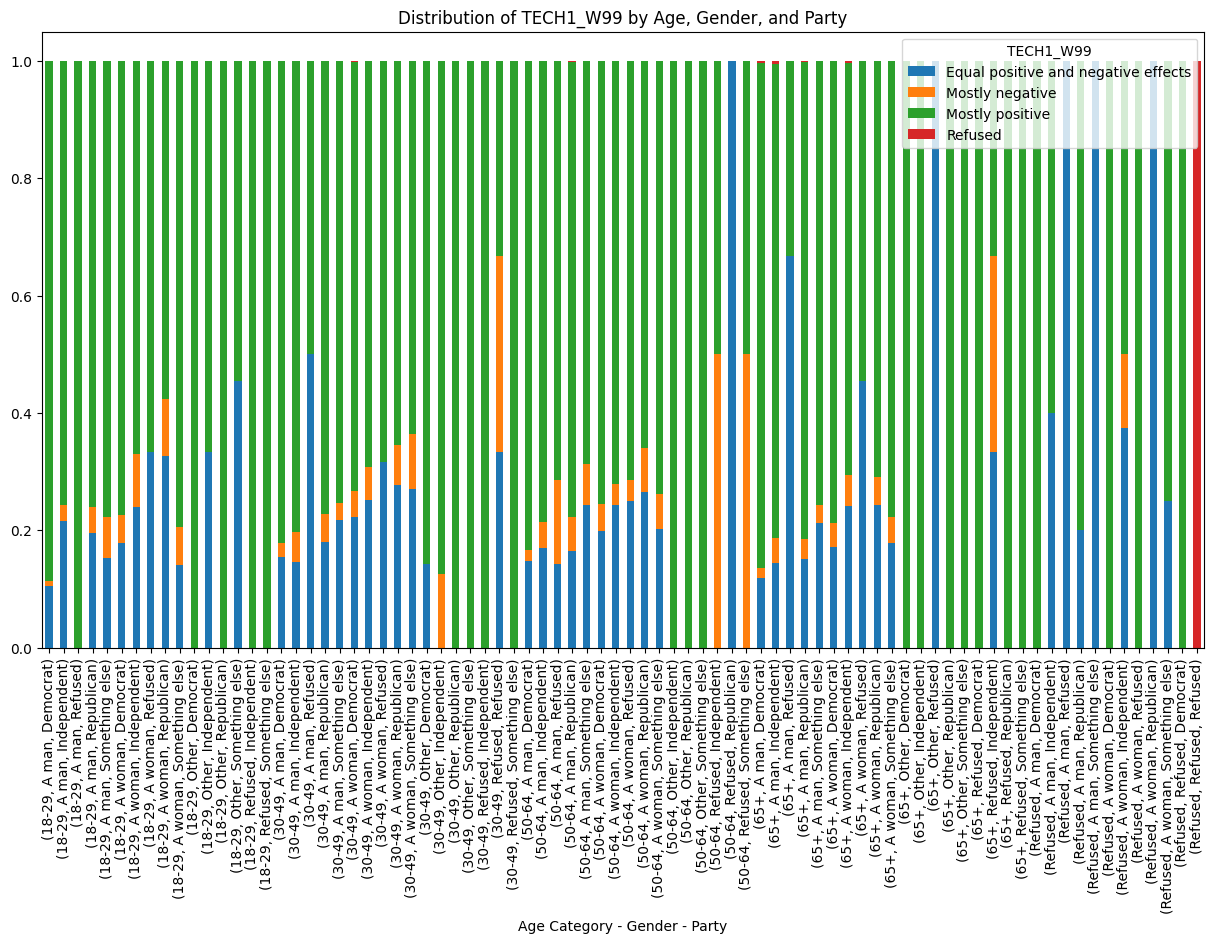

In [55]:
# Create a grouped bar chart
data_grouped = data_df.groupby(['F_AGECAT', 'F_GENDER', 'F_PARTY_FINAL'])['TECH1_W99'].value_counts(normalize=True).unstack()

data_grouped.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribution of TECH1_W99 by Age, Gender, and Party')
plt.xlabel('Age Category - Gender - Party')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


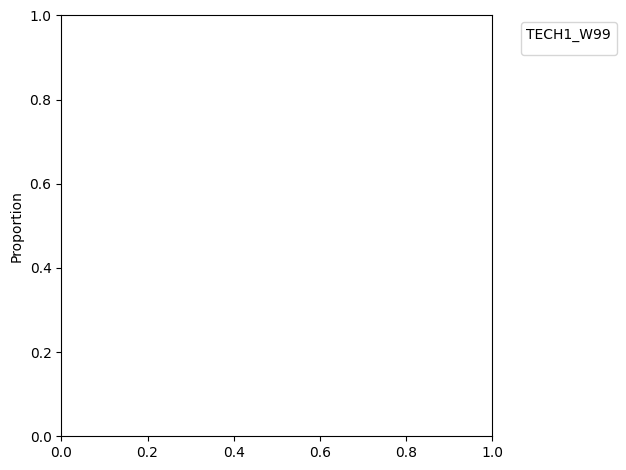

In [56]:
plt.ylabel('Proportion')
plt.legend(title='TECH1_W99', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [57]:
# Create the four-way contingency table
contingency_table = pd.crosstab(
    [data_df['F_AGECAT'], data_df['F_GENDER'], data_df['F_PARTY_FINAL']],
    data_df['TECH1_W99'],
    margins=True
)

# Display the table
print(contingency_table)

# Calculate percentages
contingency_table_percentage = contingency_table.div(contingency_table['All'], axis=0) * 100

# Display the percentage table
print("\nPercentage Table:")
print(contingency_table_percentage)

# Save the tables to CSV files for easier viewing
contingency_table.to_csv('four_way_contingency_table.csv')
contingency_table_percentage.to_csv('four_way_contingency_table_percentage.csv')

TECH1_W99                         Equal positive and negative effects  \
F_AGECAT F_GENDER F_PARTY_FINAL                                         
18-29    A man    Democrat                                         11   
                  Independent                                      23   
                  Refused                                           0   
                  Republican                                        9   
                  Something else                                   11   
...                                                               ...   
Refused  A woman  Republican                                        1   
                  Something else                                    1   
         Refused  Democrat                                          0   
                  Refused                                           0   
All                                                              1969   

TECH1_W99                         Mostly negative 

OSError: [Errno 30] Read-only file system: 'four_way_contingency_table.csv'

IndexError: index 3 is out of bounds for axis 0 with size 3

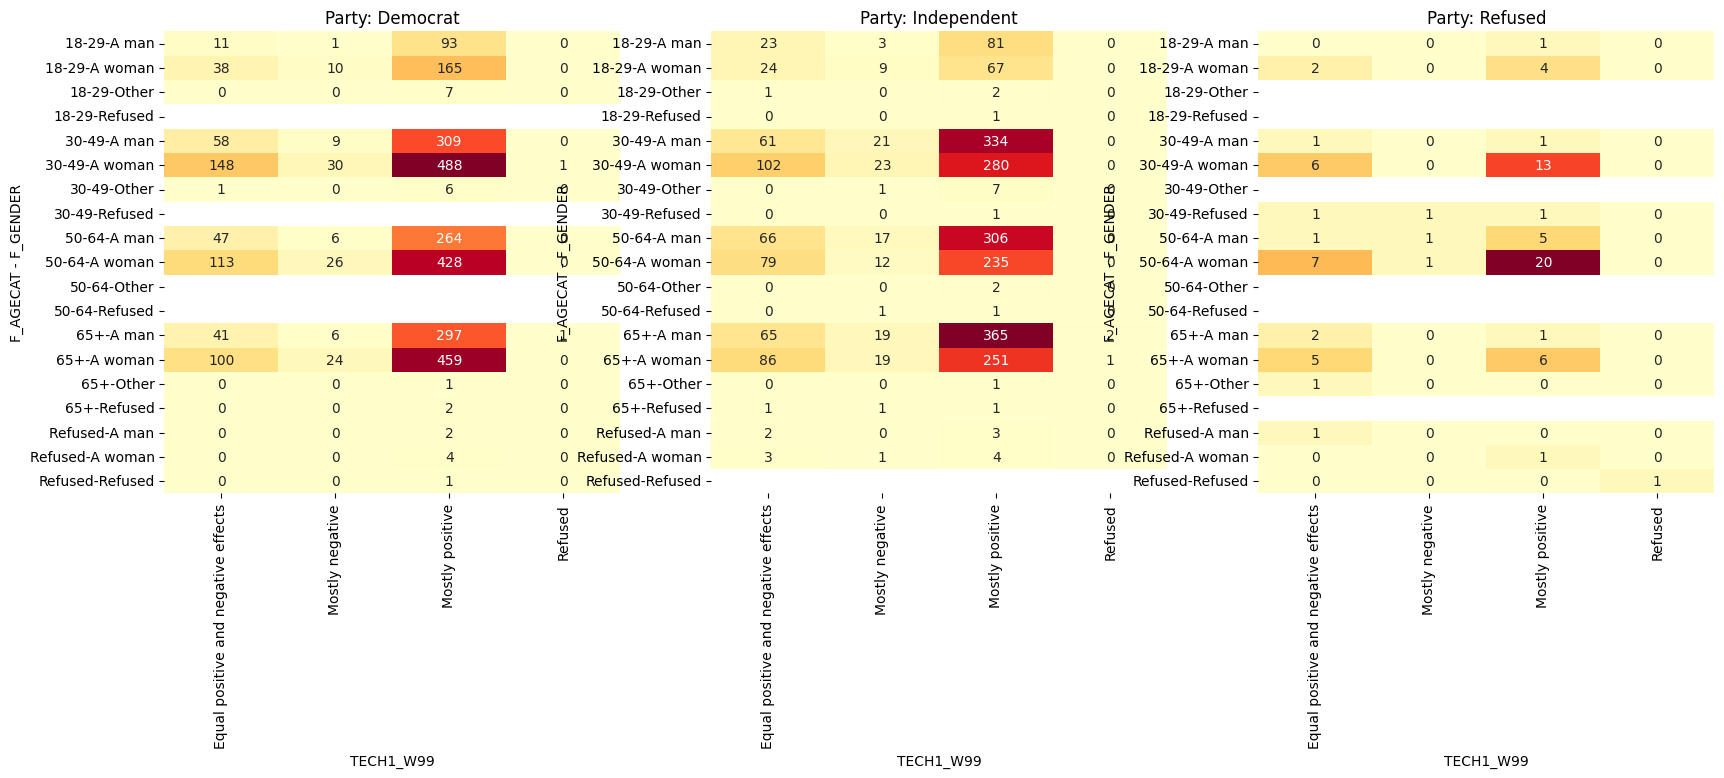

In [58]:
# Create the four-way contingency table
contingency_table = pd.crosstab(
    [data_df['F_AGECAT'], data_df['F_GENDER'], data_df['F_PARTY_FINAL']],
    data_df['TECH1_W99']
)

# Reshape the data for heatmap
heatmap_data = contingency_table.unstack(level='F_PARTY_FINAL')

# Create a heatmap for each party
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
parties = heatmap_data.columns.levels[1]

for i, party in enumerate(parties):
    data = heatmap_data.xs(party, level='F_PARTY_FINAL', axis=1)
    sns.heatmap(data, 
                ax=axes[i], 
                cmap='YlOrRd', 
                annot=True, 
                fmt='.0f',  # Use '.0f' to round to nearest integer
                cbar=False)  # Remove color bar for cleaner look
    axes[i].set_title(f'Party: {party}')
    axes[i].set_xlabel('TECH1_W99')
    axes[i].set_ylabel('F_AGECAT - F_GENDER')

plt.tight_layout()
plt.show()

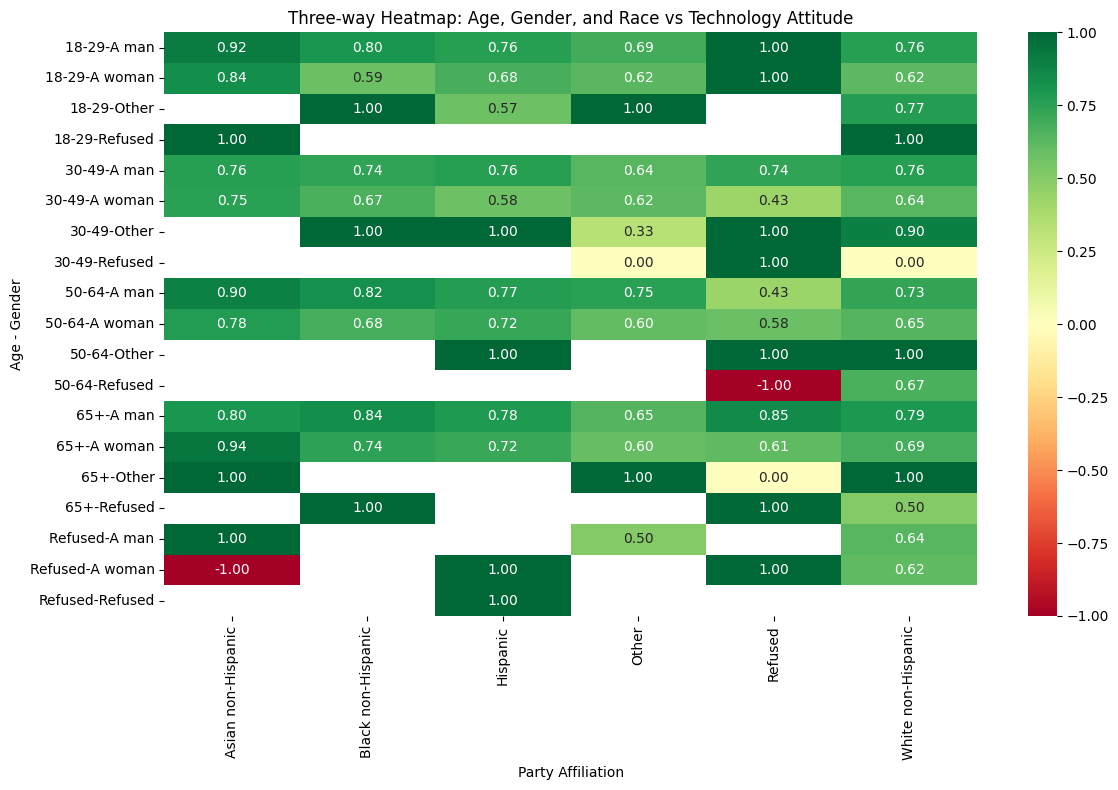

In [59]:
# Create the three-way contingency table
contingency_table = pd.crosstab(
    [data_df['F_AGECAT'], data_df['F_GENDER']],
    data_df['F_RACETHNMOD'],
    values=data_df['TECH1_W99'].map({'Mostly positive': 1, 'Mostly negative': -1, 'Equal positive and negative effects': 0}),
    aggfunc='mean'
)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='RdYlGn', center=0, fmt='.2f')

plt.title('Three-way Heatmap: Age, Gender, and Race vs Technology Attitude')
plt.xlabel('Party Affiliation')
plt.ylabel('Age - Gender')

plt.tight_layout()
plt.show()

In [61]:
# Create the contingency table
contingency_table = pd.crosstab(
    [data_df['F_AGECAT'], data_df['F_GENDER'], data_df['F_RACETHNMOD']],
    data_df['DCARS1_W99'],
    normalize='index',
    values=data_df['DCARS1_W99'].map({
        'A lot': 3, 
        'A little': 2, 
        'Nothing at all': 1,
        'Not sure': 0
    }),
    aggfunc='mean'
)

# Reshape the table for heatmap
heatmap_data = contingency_table.unstack(level='F_RACETHNMOD')

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.2f')

plt.title('Heatmap: Age, Gender, and Race/Ethnicity vs Knowledge about Driverless Cars (DCARS1_W99)')
plt.xlabel('Race/Ethnicity - Knowledge about Driverless Cars')
plt.ylabel('Age - Gender')

plt.tight_layout()
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1500x1000 with 0 Axes>

This visualization will show you how knowledge about driverless cars (DCARS1_W99) varies across different age groups, genders, and racial/ethnic groups. The color of each cell represents the average response, with darker red indicating more knowledge about driverless cars.
Interpreting the heatmap:
Values closer to 3 (darker red) indicate more knowledge about driverless cars
Values closer to 1 (lighter yellow) indicate less knowledge
Values close to 0 might indicate a higher proportion of 'Not sure' responses
This heatmap will allow you to quickly identify patterns, such as which demographic groups tend to have more or less knowledge about driverless cars, and how this knowledge varies across different racial/ethnic groups.

While K-means clustering is a popular and widely used method, it has several key limitations when applied to the AI_Condensed_Data_Useful_Data.csv dataset:

1. Handling categorical data: K-means is designed for numerical data, but this dataset contains many categorical variables (e.g. F_GENDER, F_PARTY_FINAL). While we can use techniques like one-hot encoding to convert categories to numbers, this can lead to high-dimensional sparse data which K-means doesn't handle well[1].

2. Assumption of spherical clusters: K-means assumes clusters are spherical and equally sized, which may not reflect the true structure of attitudes towards AI and autonomous vehicles in this survey data[1].

3. Sensitivity to outliers: K-means can be significantly affected by outliers in the data, which could skew the cluster centers[1].

4. Predefined number of clusters: K-means requires specifying the number of clusters in advance, which may not be known for this attitudinal data[1].

5. Local optima: K-means can converge to local optima, potentially missing the global best clustering solution[1].

Despite these limitations, K-means might be chosen over other methods for this dataset for several reasons:

1. Scalability: K-means is computationally efficient and can handle large datasets like this survey data relatively quickly[1].

2. Interpretability: The cluster centers in K-means are easily interpretable as "average" members of each cluster, which can be useful for understanding typical attitudes in each group[1].

3. Familiarity: K-means is widely known and understood, making it easier to communicate results to stakeholders who may not have deep statistical knowledge[1].

4. Iterative refinement: K-means allows for iterative improvement of clusters, which can be beneficial when exploring different ways to segment survey respondents[1].

However, given the categorical nature of much of this data, other clustering methods like K-modes (for categorical data) or a hierarchical clustering approach might be more appropriate. These methods could better handle the categorical variables and potentially reveal more nuanced patterns in attitudes towards AI and autonomous vehicles.

Citations:
[1] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/24048675/5537f1de-54a5-441e-add4-3193a2ea9707/AI_Condensed_Data_Useful_Data.csv
[2] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/24048675/794b75bf-3524-4e7e-995a-1a7d08a9a8a0/k_means_analysis.ipynb


In [63]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

In [64]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/georgetteotoo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/georgetteotoo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/georgetteotoo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
#To Extract the relevant columns
excitement_cols = ["EXCITEOE_W99_OE1", "EXCITEOE_W99_OE2", "EXCITEOE_W99_OE3", "EXCITEOE_REFUSED_W99"]
concern_cols = ["CONCERNOE_W99_OE1", "CONCERNOE_W99_OE2", "CONCERNOE_W99_OE3", "CONCERNOE_REFUSED_W99"]

excitement_data = df[excitement_cols].dropna()
concern_data = df[concern_cols].dropna()

In [66]:

# Combine concerns and excitement into a single series for unified analysis
combined_text = pd.concat([concern_data, excitement_data]).reset_index(drop=True)

In [67]:
# Predefined stop words (if NLTK download is not possible)
predefined_stopwords = set(stopwords.words('english'))

In [68]:
# Preprocess text function
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in predefined_stopwords]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens


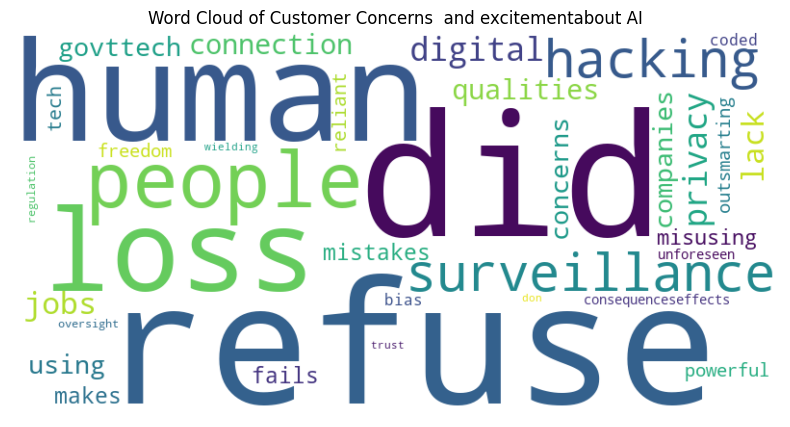

In [69]:


# Step 2: Selecting the relevant columns
excitement_cols = ["EXCITEOE_W99_OE1", "EXCITEOE_W99_OE2", "EXCITEOE_W99_OE3", "EXCITEOE_REFUSED_W99"]
concern_cols = ["CONCERNOE_W99_OE1", "CONCERNOE_W99_OE2", "CONCERNOE_W99_OE3", "CONCERNOE_REFUSED_W99"]

excitement_data = df[excitement_cols].dropna()
concern_data = df[concern_cols].dropna()

# Combine all concern columns into one text corpus
concern_text = ' '.join(concern_data.values.flatten())

# Step 3: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)          # Remove digits
    text = re.sub(r'[^\w\s]', '', text)      # Remove punctuation
    return text

cleaned_concern_text = clean_text(concern_text)

# Step 4: Remove stop words
stop_words = set(ENGLISH_STOP_WORDS)
filtered_words = [word for word in cleaned_concern_text.split() if word not in stop_words]

# Step 5: Create a word cloud
word_counts = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Concerns  and excitementabout AI')
plt.show()


In [70]:
# Step 6: Sentiment Analysis
# Download the VADER lexicon
download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(' '.join(filtered_words))

# Display sentiment scores
print("Sentiment Scores:")
print(sentiment_scores)

NameError: name 'download' is not defined

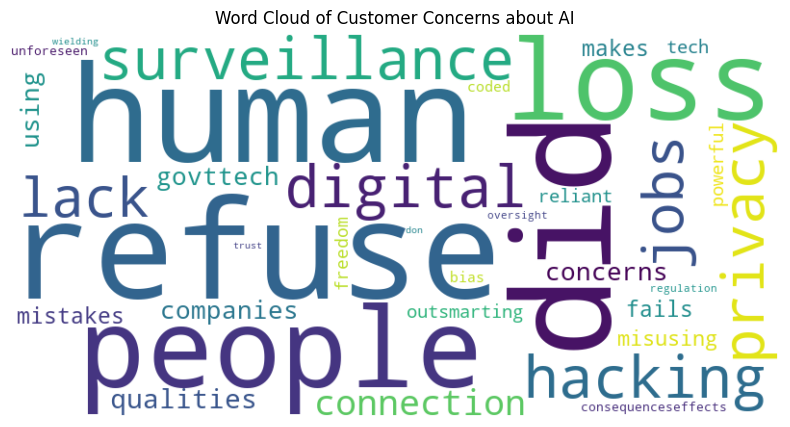

Sentiment Scores:
{'neg': 0.38, 'neu': 0.522, 'pos': 0.098, 'compound': -0.9999}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/georgetteotoo/nltk_data...


In [71]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import download
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Step 2: Selecting the relevant columns
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1ph9qcAk_hZsUnVWmDIBgs5NF-9iX4uP3/export?format=csv")
concern_cols = ["CONCERNOE_W99_OE1", "CONCERNOE_W99_OE2", "CONCERNOE_W99_OE3", "CONCERNOE_REFUSED_W99"]
concern_data = df[concern_cols].dropna()

# Combine all concern columns into one text corpus
concern_text = ' '.join(concern_data.values.flatten())

# Step 3: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)          # Remove digits
    text = re.sub(r'[^\w\s]', '', text)      # Remove punctuation
    return text

cleaned_concern_text = clean_text(concern_text)

# Step 4: Remove stop words
stop_words = set(ENGLISH_STOP_WORDS)
filtered_words = [word for word in cleaned_concern_text.split() if word not in stop_words]

# Step 5: Create a word cloud
word_counts = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Concerns about AI')
plt.show()

# Step 6: Sentiment Analysis
# Download the VADER lexicon
download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(' '.join(filtered_words))

# Display sentiment scores
print("Sentiment Scores:")
print(sentiment_scores)

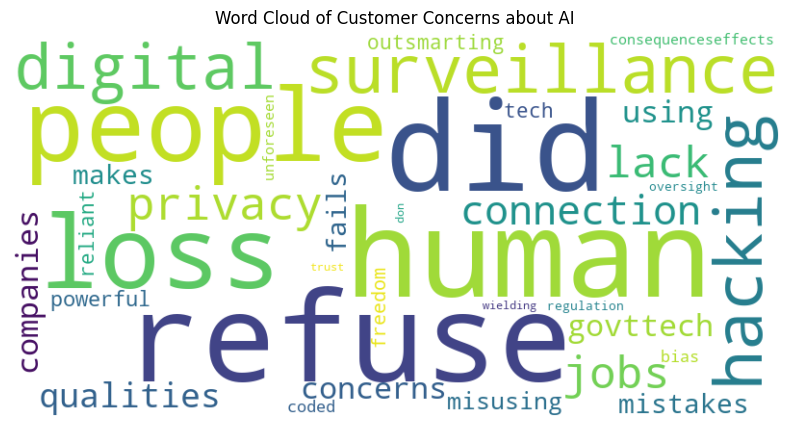

Sentiment Scores:
{'neg': 0.38, 'neu': 0.522, 'pos': 0.098, 'compound': -0.9999}


In [72]:


# Step 2: Selecting the relevant columns

concern_cols = ["CONCERNOE_W99_OE1", "CONCERNOE_W99_OE2", "CONCERNOE_W99_OE3", "CONCERNOE_REFUSED_W99"]


concern_data = df[concern_cols].dropna()

# Combine all concern columns into one text corpus
concern_text = ' '.join(concern_data.values.flatten())

# Step 3: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)          # Remove digits
    text = re.sub(r'[^\w\s]', '', text)      # Remove punctuation
    return text

cleaned_concern_text = clean_text(concern_text)

# Step 4: Remove stop words
stop_words = set(ENGLISH_STOP_WORDS)
filtered_words = [word for word in cleaned_concern_text.split() if word not in stop_words]

# Step 5: Create a word cloud
word_counts = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Concerns about AI')
plt.show()
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(' '.join(filtered_words))

# Display sentiment scores
print("Sentiment Scores:")
print(sentiment_scores)


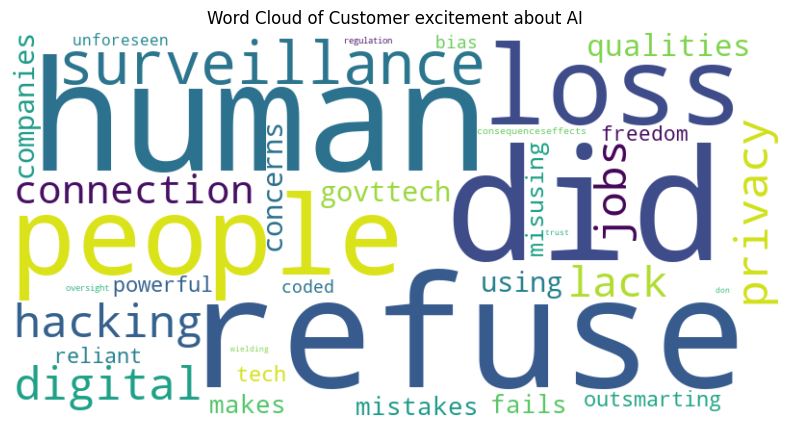

Sentiment Scores:
{'neg': 0.38, 'neu': 0.522, 'pos': 0.098, 'compound': -0.9999}


In [73]:


# Step 2: Selecting the relevant columns

excitement_cols = ["EXCITEOE_W99_OE1", "EXCITEOE_W99_OE2", "EXCITEOE_W99_OE3", "EXCITEOE_REFUSED_W99"]


excitement_data = df[excitement_cols].dropna()


# Combine all concern columns into one text corpus
concern_text = ' '.join(concern_data.values.flatten())

# Step 3: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)          # Remove digits
    text = re.sub(r'[^\w\s]', '', text)      # Remove punctuation
    return text

cleaned_concern_text = clean_text(concern_text)

# Step 4: Remove stop words
stop_words = set(ENGLISH_STOP_WORDS)
filtered_words = [word for word in cleaned_concern_text.split() if word not in stop_words]

# Step 5: Create a word cloud
word_counts = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer excitement about AI')
plt.show()
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(' '.join(filtered_words))

# Display sentiment scores
print("Sentiment Scores:")
print(sentiment_scores)

In [74]:
# Flatten the list of tokens
all_tokens = [token for tokens in combined_cleaned for token in tokens]

NameError: name 'combined_cleaned' is not defined

In [75]:
all_tokens

NameError: name 'all_tokens' is not defined

In [76]:
# Get the frequency distribution of words
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(50)  # Adjust the number of common words as needed

NameError: name 'all_tokens' is not defined

In [77]:
common_words

NameError: name 'common_words' is not defined

In [78]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))

NameError: name 'common_words' is not defined

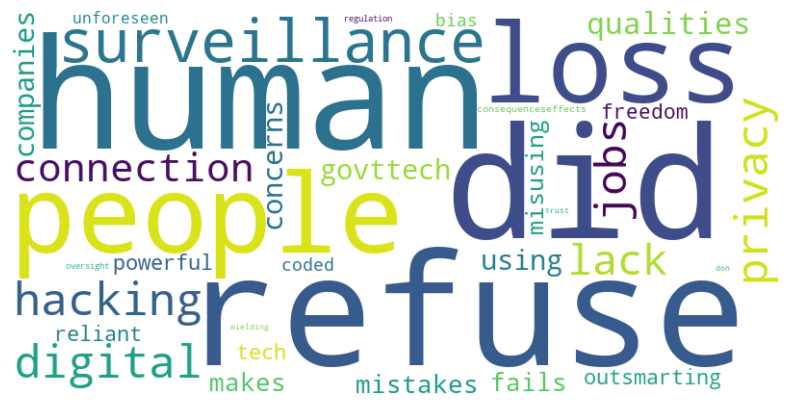

In [79]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [80]:
# Convert preprocessed text back to strings
combined_cleaned_str = combined_cleaned.apply(lambda x: ' '.join(x))

NameError: name 'combined_cleaned' is not defined

In [81]:
combined_cleaned_str

NameError: name 'combined_cleaned_str' is not defined

In [82]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(combined_cleaned_str)

NameError: name 'combined_cleaned_str' is not defined

In [83]:
vectorizer

TfidfVectorizer(max_features=1000)

In [84]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

NameError: name 'X' is not defined

In [85]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
terms = vectorizer.get_feature_names_out()

NotFittedError: Vocabulary not fitted or provided

In [86]:
# Get top terms per cluster
top_terms_per_cluster = []
for i in range(kmeans.n_clusters):
    top_terms = [terms[ind] for ind in cluster_centers[i].argsort()[:-11:-1]]
    top_terms_per_cluster.append(top_terms)


NameError: name 'terms' is not defined

In [87]:
# Print top terms per cluster
for i, top_terms in enumerate(top_terms_per_cluster):
    print(f"Cluster {i}: {', '.join(top_terms)}")

Cluster 0: equally, concerned, excited, help, task, future, progress, inevitable, human, mundane
Cluster 1: society, better, life, make, worklabor, dont, exciting, excited, equally, elderlyhave
Cluster 2: excited, concerned, worklabor, dont, future, fear, exciting, equally, elderlyhave, efficient
Cluster 3: dont, answer, knowno, worklabor, fear, exciting, excited, equally, elderlyhave, efficient
Cluster 4: time, save, efficient, dont, future, fear, exciting, excited, equally, elderlyhave

Cluster 0: Focuses on the balance of concern and excitement, particularly related to human tasks and the future.
Cluster 1: Highlights societal impacts and the potential for AI to improve life and work, with some skepticism.
Cluster 2: Combines excitement and concern about labor and efficiency, with a hint of fear about the future.
Cluster 3: Reflects mixed sentiments with an emphasis on labor concerns and unknowns.
Cluster 4: Emphasizes efficiency and time-saving aspects, with underlying concerns about the future.

Key Areas for Improvement:
Use the insights to improve product features, user experience, and communication strategies. For example, enhancing transparency about AI’s role in the future could mitigate concerns found in Cluster 0 and Cluster 3.

In [ ]:
# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

In [88]:
# Plotting PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title("K-means Clusters (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

NameError: name 'X_pca' is not defined

<Figure size 1000x700 with 0 Axes>